# Sustainable energy transitions data model

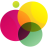

In [3]:
from IPython.core.display import Image 
Image('favicon.png') 

In [4]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np, json, copy
%matplotlib inline
plt.style.use('ggplot')
#plt.style.use('seaborn-darkgrid')
#import mpld3
#mpld3.enable_notebook()

In [5]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

## Country and region name converters

In [7]:
#country name converters

#EIA->pop
clist1={'North America':'Northern America',
'United States':'United States of America',
'Central & South America':'Latin America and the Caribbean',
'Bahamas, The':'Bahamas',
'Saint Vincent/Grenadines':'Saint Vincent and the Grenadines',
'Venezuela':'Venezuela (Bolivarian Republic of)',
'Macedonia':'The former Yugoslav Republic of Macedonia',
'Moldova':'Republic of Moldova',
'Russia':'Russian Federation',
'Iran':'Iran (Islamic Republic of)',
'Palestinian Territories':'State of Palestine',
'Syria':'Syrian Arab Republic',
'Yemen':'Yemen ',
'Congo (Brazzaville)':'Congo',
'Congo (Kinshasa)':'Democratic Republic of the Congo',
'Cote dIvoire (IvoryCoast)':"C\xc3\xb4te d'Ivoire",
'Gambia, The':'Gambia',
'Libya':'Libyan Arab Jamahiriya',
'Reunion':'R\xc3\xa9union',
'Somalia':'Somalia ',
'Sudan and South Sudan':'Sudan',
'Tanzania':'United Republic of Tanzania',
'Brunei':'Brunei Darussalam',
'Burma (Myanmar)':'Myanmar',
'Hong Kong':'China, Hong Kong Special Administrative Region',
'Korea, North':"Democratic People's Republic of Korea",
'Korea, South':'Republic of Korea',
'Laos':"Lao People's Democratic Republic",
'Macau':'China, Macao Special Administrative Region',
'Timor-Leste (East Timor)':'Timor-Leste',
'Virgin Islands,  U.S.':'United States Virgin Islands',
'Vietnam':'Viet Nam'}

#BP->pop
clist2={u'                 European Union #':u'Europe',
u'Rep. of Congo (Brazzaville)':u'Congo (Brazzaville)',
'Republic of Ireland':'Ireland',
'China Hong Kong SAR':'China, Hong Kong Special Administrative Region',
u'Total Africa':u'Africa',
u'Total North America':u'Northern America',
u'Total S. & Cent. America':'Latin America and the Caribbean',
u'Total World':u'World',
u'Total World ':u'World',
'South Korea':'Republic of Korea',
u'Trinidad & Tobago':u'Trinidad and Tobago',
u'US':u'United States of America'}

#WD->pop
clist3={u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Congo, Rep.':u'Congo (Brazzaville)',
u'Caribbean small states':'Carribean',
u'East Asia & Pacific (all income levels)':'Eastern Asia',
u'Egypt, Arab Rep.':'Egypt',
u'European Union':u'Europe',
u'Hong Kong SAR, China':u'China, Hong Kong Special Administrative Region',
u'Iran, Islamic Rep.':u'Iran (Islamic Republic of)',
u'Kyrgyz Republic':u'Kyrgyzstan',
u'Korea, Rep.':u'Republic of Korea',
u'Latin America & Caribbean (all income levels)':'Latin America and the Caribbean',
u'Macedonia, FYR':u'The former Yugoslav Republic of Macedonia',
u'Korea, Dem. Rep.':u"Democratic People's Republic of Korea",
u'South Asia':u'Southern Asia',
u'Sub-Saharan Africa (all income levels)':u'Sub-Saharan Africa',
u'Slovak Republic':u'Slovakia',
u'Venezuela, RB':u'Venezuela (Bolivarian Republic of)',
u'Yemen, Rep.':u'Yemen ',
u'Congo, Dem. Rep.':u'Democratic Republic of the Congo'}

#COMTRADE->pop
clist4={u"Bosnia Herzegovina":"Bosnia and Herzegovina",
u'Central African Rep.':u'Central African Republic',
u'China, Hong Kong SAR':u'China, Hong Kong Special Administrative Region',
u'China, Macao SAR':u'China, Macao Special Administrative Region',
u'Czech Rep.':u'Czech Republic',
u"Dem. People's Rep. of Korea":"Democratic People's Republic of Korea",
u'Dem. Rep. of the Congo':"Democratic Republic of the Congo",
u'Dominican Rep.':u'Dominican Republic',
u'Fmr Arab Rep. of Yemen':u'Yemen ',
u'Fmr Ethiopia':u'Ethiopia',
u'Fmr Fed. Rep. of Germany':u'Germany',
u'Fmr Panama, excl.Canal Zone':u'Panama',
u'Fmr Rep. of Vietnam':u'Viet Nam',
u"Lao People's Dem. Rep.":u"Lao People's Democratic Republic",
u'Occ. Palestinian Terr.':u'State of Palestine',
u'Rep. of Korea':u'Republic of Korea',
u'Rep. of Moldova':u'Republic of Moldova',
u'Serbia and Montenegro':u'Serbia',
u'US Virgin Isds':u'United States Virgin Islands',
u'Solomon Isds':u'Solomon Islands',
u'United Rep. of Tanzania':u'United Republic of Tanzania',
u'TFYR of Macedonia':u'The former Yugoslav Republic of Macedonia',
u'USA':u'United States of America',
u'USA (before 1981)':u'United States of America',
}

#Jacobson->pop
clist5={u"Korea, Democratic People's Republic of":"Democratic People's Republic of Korea",
u'All countries':u'World',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Iran, Islamic Republic of':u'Iran (Islamic Republic of)',
u'Macedonia, Former Yugoslav Republic of':u'The former Yugoslav Republic of Macedonia',
u'Congo, Democratic Republic of':u"Democratic Republic of the Congo",
u'Korea, Republic of':u'Republic of Korea',
u'Tanzania, United Republic of':u'United Republic of Tanzania',
u'Moldova, Republic of':u'Republic of Moldova',
u'Hong Kong, China':u'China, Hong Kong Special Administrative Region'
}

#NREL solar->pop
clist6={u"Antigua & Barbuda":u'Antigua and Barbuda',
u"Bosnia & Herzegovina":u"Bosnia and Herzegovina",
u"Brunei":u'Brunei Darussalam',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u"Iran":u'Iran (Islamic Republic of)',
u"Laos":u"Lao People's Democratic Republic",
u"Libya":'Libyan Arab Jamahiriya',
u"Moldova":u'Republic of Moldova',
u"North Korea":"Democratic People's Republic of Korea",
u"Reunion":'R\xc3\xa9union',
u'Sao Tome & Principe':u'Sao Tome and Principe',
u'Solomon Is.':u'Solomon Islands',
u'St. Lucia':u'Saint Lucia',
u'St. Vincent & the Grenadines':u'Saint Vincent and the Grenadines',
u'The Bahamas':u'Bahamas',
u'The Gambia':u'Gambia',
u'Virgin Is.':u'United States Virgin Islands',
u'West Bank':u'State of Palestine'
}

#NREL wind->pop
clist7={u"Antigua & Barbuda":u'Antigua and Barbuda',
u"Bosnia & Herzegovina":u"Bosnia and Herzegovina",
u'Occupied Palestinian Territory':u'State of Palestine',
u'China Macao SAR':u'China, Macao Special Administrative Region',
#"C\xc3\xb4te d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'East Timor':u'Timor-Leste',
u'TFYR Macedonia':u'The former Yugoslav Republic of Macedonia',
u'IAM-country Total':u'World'
}

#country entroids->pop
clist8={u'Burma':'Myanmar',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Republic of the Congo':u'Congo (Brazzaville)',
u'Reunion':'R\xc3\xa9union'
}

def cnc(country):
    if country in clist1: return clist1[country]
    elif country in clist2: return clist2[country]
    elif country in clist3: return clist3[country]
    elif country in clist4: return clist4[country]
    elif country in clist5: return clist5[country]
    elif country in clist6: return clist6[country]
    elif country in clist7: return clist7[country]
    elif country in clist8: return clist8[country]
    else: return country

# Population

Consult the notebook entitled *pop.ipynb* for the details of mining the data from the UN statistics division online database.   
Due to being the reference database for country names cell, the cell below needs to be run first, before any other databases.

In [8]:
#pop_path='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/
pop_path='E:/Dropbox/Public/datarepo/Set/db/'

In [9]:
#population data
pop=pd.read_csv(pop_path+'pop.csv').set_index(['Country','Year']).unstack(level=1)
pop.head()

Value                                                    \
Year           1950.0    1951.0    1952.0    1953.0    1954.0    1955.0   
Country                                                                   
Afghanistan    7451.0    7547.0    7651.0    7763.0    7882.0    8010.0   
Africa       228827.0  233364.0  238148.0  243180.0  248460.0  253988.0   
Albania        1214.0    1243.0    1276.0    1311.0    1350.0    1390.0   
Algeria        8872.0    9059.0    9253.0    9459.0    9680.0    9917.0   
Angola         4148.0    4220.0    4297.0    4378.0    4460.0    4543.0   

                                                       ...                 \
Year           1956.0    1957.0    1958.0    1959.0    ...         2091.0   
Country                                                ...                  
Afghanistan    8146.0    8290.0    8443.0    8604.0    ...        61322.0   
Africa       259762.0  265780.0  272039.0  278537.0    ...      3933881.0   
Albania        1433.0    1477.0    1523.0    1570.0    ...         2329.0   
Algeria       10170.0   10436.0   10713.0   10995.0    ...        55613.0   
Angola         4626.0    4709.0    4793.0    4878.0    ...        91993.0   

                                                                               \
Year            2092.0     2093.0     2094.0     2095.0     2096.0     2097.0   
Country                                                                         
Afghanistan    61112.0    60897.0    60676.0    60449.0    60218.0    59982.0   
Africa       3963991.0  3993557.0  4022570.0  4051019.0  4078898.0  4106198.0   
Albania         2314.0     2299.0     2285.0     2272.0     2260.0     2248.0   
Algeria        55561.0    55501.0    55433.0    55357.0    55275.0    55186.0   
Angola         92654.0    93297.0    93924.0    94534.0    95127.0    95704.0   

                                              
Year            2098.0     2099.0     2100.0  
Country                                       
Afghanistan    59741.0    59497.0    59249.0  
Africa       4132914.0  4159041.0  4184577.0  
Albania         2237.0     2226.0     2217.0  
Algeria        55091.0    54992.0    54887.0  
Angola         96264.0    96809.0    97337.0  

[5 rows x 151 columns]

# Define database parsers and units

In [10]:
#initialize data and constants
data={}
countries={i for i in pop.index}
years={int(i[1]) for i in pop.columns}
dbs={'bp','eia'}
datatypes={'prod','cons','emi','res'}
allfuels=['oil','coal','gas','nuclear','biofuels','hydro','geo_other','solar','wind']
fossils=['oil','coal','gas']+['nrg','nrg_sum']
transp=1 #transparency
#colorlist=np.array([[166,86,40,transp*255],[153,153,153,transp*255],[152,78,163,transp*255],
#                    [228,26,28,transp*255],[247,129,191,transp*255],[55,126,184,transp*255],
#                    [82,56,65,transp*255],[255,255,51,transp*255],[77,175,74,transp*255]])/255.0
colorlist=np.array([[131,13,9,transp*255],[85,20,52,transp*255],[217,20,14,transp*255],
                    [213,9,98,transp*255],[64,185,85,transp*255],[202,200,46,transp*255],
                    [106,23,9,transp*255],[251,212,31,transp*255],[112,133,16,transp*255]])/255.0
gcolors={allfuels[i]:colorlist[i] for i in range(len(allfuels))}

def reset(what='all',datatype='all'):
    global data
    if what=='all':
        #reset all values of database
        fuels=allfuels+['nrg','nrg_sum']
        data={i:{int(k[1]):{'energy':{j:{k:{l:np.NaN for l in dbs} for k in datatypes}\
                              for j in fuels},'population':long(pop.loc[i][k])*1000,\
                                              'consumer_efficiency':0.5,\
                                              'cumulative_emissions':0}\
                              for k in pop.columns}\
                              #we use population as the default database for country names
                              for i in pop.index} 
    else:
        countries=data.keys()
        for i in countries:
            for j in years:
                if datatype=='all':
                    data[i][j]['energy'][what]={k:{l:np.NaN for l in dbs} for k in datatypes}
                else:
                    data[i][j]['energy'][what][datatype]={l:np.NaN for l in dbs}

reset()

kbpd_to_TWh=365.25*0.001628200 #unit conversion from thousand barrels of oil per day to TWh per year
Gboe_to_TWh=1628.2 #unit conversion from thousand million barrels of oil to TWh
EJ_to_TWh=277.77 #unit conversion from exa Joule to TWh
bcf_to_TWh=0.2931 #unit conversion from billion cubic feet of natural gas to TWh
tcf_to_TWh=bcf_to_TWh*1000.0 #unit conversion from trillion cubic feet of natural gas to TWh
qbtu_to_TWh=293.297222 #unit conversion from quadrillion British thermal units to TWh
mtoe_to_TWh=11.63 #unit conversion million metric tons of oil equivalent to TWh
kgge_to_gm3=1.49 #unit conversion from kilogram of natural gas to cubic meter, based on CH4
mtlnge_to_TWh=14.45 #unit conversion million metric tons of gas (LNG) equivalent to TWh
cm_to_cf=35.3 #unit conversion from million cubic meters to million cubic feet
tcm_to_TWh=tcf_to_TWh*cm_to_cf #unit conversion from trillion cubic meters of natural gas to TWh
kgge_to_TWh=kgge_to_gm3*tcf_to_TWh*cm_to_cf*1e-18 #unit conversion from kilogram of natural gas to TWh
#mtge_to_TWh=kgge_to_gm3*tcf_to_TWh*cm_to_cf*1e-9 #unit conversion from kilogram of natural gas to TWh
mtge_to_GJ=53.6
mtge_to_TWh=mtge_to_GJ*1e-9*EJ_to_TWh
t_to_st=1.10231 #unit conversion from metric ton to short ton
tcoe_to_toe=0.7 #unit conversion from metric tons of coal equivalent to metric tons of oil equivalent
mtcoe_to_TWh=tcoe_to_toe*mtoe_to_TWh #unit conversion million metric tons of coal equivalent to TWh
#mtcoe_to_TWh=8.141
mstcoe_to_TWh=mtcoe_to_TWh*t_to_st #unit conversion million metric short tons of coal equivalent to TWh
c_to_co2=44.0/12 #unit conversion from C to CO2 mass

carbon_budget=840*c_to_co2 #840 GtC as per http://www.ipcc.ch/report/ar5/wg1/

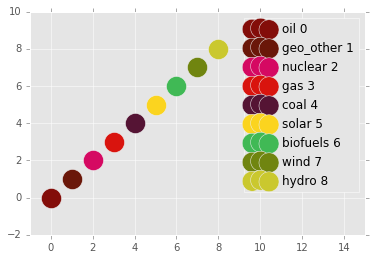

In [8]:
#colortester
for i,d in enumerate(gcolors):
    plt.scatter(i,i,400,c=gcolors[d],label=d+' '+str(i))
    #print np.array(gcolors[d])*255,d
plt.xlim(-1,15)
plt.legend()

In [57]:
path = 2 #set database path
#online path = 0
#backup path = 1
#local path  = 2

## EIA

Due to being the reference database for country names cell, the cell below needs to be run first, before any other energy databases.

In [296]:
#EIA
def eia_parse(url,fuel,datatype,unitconverter,end,additive=False):
    eia=pd.read_excel(url)
    eia=eia.drop(eia.index[:1]).T.set_index([1]).T
    eia.columns=['Country','Drop']+range(end+1-len(eia.columns)+2,end+1)
    eia=eia.drop('Drop',axis=1).drop(eia.index[:1]).set_index('Country')
    
    #save data
    global data
    for country in eia.index:
        if cnc(country) in data:
            for year in set(eia.columns):
                if eia.loc[country][year]=='--': number = np.NaN
                else: number=eia.loc[country][year]
                try: 
                    if additive: data[cnc(country)][year]['energy'][fuel][datatype]['eia']+=number*unitconverter
                    else: data[cnc(country)][year]['energy'][fuel][datatype]['eia']=number*unitconverter
                except: pass
            if country+' (Offshore)' in eia.index:
                for year in set(eia.columns):
                    if eia.loc[country+' (Offshore)'][year]=='--': number = np.NaN
                    else: number=eia.loc[country+' (Offshore)'][year]
                    try: data[cnc(country)][year]['energy'][fuel][datatype]['eia']+=number*unitconverter
                    except: pass

## BP

In [297]:
#BP
def bp_parse(sheet,fuel,datatype,unitconverter,end,additive=False):
    if path==0: url='http://www.bp.com/content/dam/bp/excel/energy-economics/statistical-review-2015/bp-statistical-review-of-world-energy-2015-workbook.xlsx'
    elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/bp-statistical-review-of-world-energy-2015-workbook.xlsx'
    else: url='E:/Dropbox/Public/datarepo/Set/db/bp-statistical-review-of-world-energy-2015-workbook.xlsx'
    bp=pd.read_excel(url,sheetname=sheet)
    bp=bp.drop(bp.index[:1]).T.set_index([1]).T
    bp.columns=['Country']+range(end+1-len(bp.columns)+3,end+1)+['Drop1','Drop2']
    bp=bp.drop('Drop1',axis=1).drop('Drop2',axis=1).drop(bp.index[:1]).set_index('Country').dropna(axis=0, how='all')
    
    #save data
    global data
    for country in bp.index:
        if cnc(country) in data:
            for year in set(bp.columns):
                if bp.loc[country][year]==u'n/a': number = np.NaN
                else: number=bp.loc[country][year]
                try: 
                    if additive: data[cnc(country)][year]['energy'][fuel][datatype]['bp']+=number*unitconverter
                    else: data[cnc(country)][year]['energy'][fuel][datatype]['bp']=number*unitconverter
                except: pass

## AVG (Average)

In [298]:
#AVG
def avg_parse(fuel,datatype):
    for country in data:
        for year in data[country]:
            if not np.isnan(data[country][year]['energy'][fuel][datatype].values()).any():
                data[country][year]['energy'][fuel][datatype]['avg']=np.mean(data[country][year]['energy'][fuel][datatype].values())
            else: data[country][year]['energy'][fuel][datatype]['avg']=np.NaN

#NAVG - average ignoring nans - just take the average of whatever data is available
def navg_parse(fuel,datatype):
    for country in data:
        for year in data[country]:
            if not np.isnan(data[country][year]['energy'][fuel][datatype].values()).all():
                data[country][year]['energy'][fuel][datatype]['navg']=np.nanmean(data[country][year]['energy'][fuel][datatype].values())
            else: data[country][year]['energy'][fuel][datatype]['navg']=np.NaN

## Global

In [299]:
def parse(url,sheet,fuel,datatype,units,end,additive=False,onlyaverage=0): #onlyaverage 0=all, 1=only data, 2=only average
    if not additive: 
        if onlyaverage!=2:
            reset(fuel,datatype)
    if onlyaverage!=2:
        if url!='none':
            eia_parse(url,fuel,datatype,units['eia'],end['eia'],additive)
        if sheet!='none':
            bp_parse(sheet,fuel,datatype,units['bp'],end['bp'],additive)
    if onlyaverage!=1:
        avg_parse(fuel,datatype)
        navg_parse(fuel,datatype)

# Define plotters and getters

In [61]:
def subplotter(country,fuel,db,datatype,ax):
    try:
        ax.plot(subgetter(country,fuel,db,datatype)['x'],subgetter(country,fuel,db,datatype)['y'],label=db+' '+datatype,linewidth=2)
    except: print 'ERROR plotting', country, fuel, db, datatype

def fracplotter(country,fuel,db,top,down,ax):
    try:
        ax.plot(fracgetter(country,fuel,db,top,down)['x'],\
            fracgetter(country,fuel,db,top,down)['y'],label=db+' '+top+'/'+down,linewidth=2,linestyle='--')
    except: print 'ERROR plotting', country, fuel, db, top+'/'+down
        
def plotter(country,fuel,db='avg',limits=[1965,2015]):
    fig, ax = plt.subplots(1,3,subplot_kw=dict(axisbg='#EEEEEE'),figsize=(17,4))
    for i in range(3): ax[i].grid(color='white', linestyle='solid')
    
    if fuel=='population': 
        subplotter(country,fuel,'un','population',ax[0])
        ax[0].set_ylabel('million',labelpad=14)
        ax[0].set_xlim(limits)
    elif fuel=='cumulative_emissions': 
        subplotter(country,fuel,'cumulative','emissions',ax[0])
        ax[0].plot(limits,np.ones(len(limits))*carbon_budget,'r--',label='carbon budget')
        ax[0].set_ylabel('GtCO2',labelpad=14)
        ax[0].set_xlim(limits)
    else: 
        ax[0].set_ylabel('TWh',labelpad=-60)
        if fuel in fossils:
            ax[1].set_ylabel('TWh',labelpad=-70)
            ax[2].set_ylabel('MtCO2',labelpad=-60)
            ax1=ax[1].twinx()
            ax2=ax[2].twinx()
        for i in range(3): ax[i].set_xlim(limits)
        if db=='all': db=dbs | {'avg'}
        if type(db)==str: db={db}
        for i in db:
            subplotter(country,fuel,i,'cons',ax[0])
            subplotter(country,fuel,i,'prod',ax[0])
            if fuel in fossils:
                subplotter(country,fuel,i,'res',ax[1])
                subplotter(country,fuel,i,'emi',ax[2])
                #plot extraction ratio
                fracplotter(country,fuel,i,'prod','res',ax1)
                #plot carbon intensity
                fracplotter(country,fuel,i,'emi','cons',ax2)
                
    for i in range(3): ax[i].legend(loc=2,framealpha=0.8)
    ax[0].set_title(fuel)
    if fuel in fossils:
        ax1.legend(loc=4,framealpha=0.8)
        ax2.legend(loc=4,framealpha=0.8)
        ax1.set_ylabel('fraction',labelpad=-50)
        ax2.set_ylabel('kgCO2/kWh primary',labelpad=-45)
    plt.suptitle(country,fontsize=14,color='green')
    plt.show()
    
def subgetter(country,fuel,db,datatype):
    try:
        if fuel=='population':
            x=np.sort(list(years))
            y=[data[country][i]['population']/1000000.0 for i in x]
        elif fuel=='cumulative_emissions':
            x=np.sort(list(years))
            y=[data[country][i]['cumulative_emissions']/1000.0 for i in x]
        else:
            x=[i for i in np.sort(list(years)) if not np.isnan(data[country][i]['energy'][fuel][datatype][db])]
            y=[data[country][i]['energy'][fuel][datatype][db] for i in x]
        return {'x':x,'y':y}
    except: print 'ERROR getting', country, fuel, db, datatype

def fracgetter(country,fuel,db,top,down):
    try:
        a=subgetter(country,fuel,db,top)['x']
        b=subgetter(country,fuel,db,down)['x']
        c=np.intersect1d(a,b)
        d=np.searchsorted(a,c)
        e=np.searchsorted(b,c)
        x=a[d[0]:d[::-1][0]+1]
        y=np.array(subgetter(country,fuel,db,top)['y'][d[0]:d[::-1][0]+1])/\
          np.array(subgetter(country,fuel,db,down)['y'][e[0]:e[::-1][0]+1])
        return {'x':x,'y':y}
    except: print 'ERROR getting', country, fuel, db, top+'/'+down
        
def getter(country,fuel,db='avg'):
    if fuel=='population': 
        return subgetter(country,fuel,'un','population')
    elif fuel=='cumulative_emissions': 
        return subgetter(country,fuel,'cumulative','emissions')
    else: 
        if db=='all': db=dbs | {'avg'}
        if type(db)==str: db={db}
        aux={}
        for i in db:
            aux[i]={}
            for datatype in {'cons','prod','emi','res'}:
                aux[i][datatype]=subgetter(country,fuel,i,datatype)
        return aux

# Save algorithm
Saves the data into json for interactive visualization in d3plus.

In [60]:
import zipfile, json

In [302]:
testcountries=['Hungary','Greece','United States of America','United Arab Emirates','World','Germany','China']

In [303]:
def save(allcountries=False,verbose=False):
    try:
        import zlib
        compression = zipfile.ZIP_DEFLATED
    except:
        compression = zipfile.ZIP_STORED
    popsave={}
    countries=[]
    if allcountries:c=data.keys()
    else: c=testcountries
    for country in c:
        popdummy={}
        tosave=[]
        for year in data[country]:
            popdummy[year]=data[country][year]['population']
            #for fuel in data[country][year]['energy']:
            for fuel in allfuels:
                if verbose:
                    tosave.append({"t":year,"u":fuel,"g":"f",
                               "e":0 if np.isnan(data[country][year]['energy'][fuel]['prod']['eia']) else \
                               data[country][year]['energy'][fuel]['prod']['eia'],
                               "b":0 if np.isnan(data[country][year]['energy'][fuel]['prod']['bp']) else \
                               data[country][year]['energy'][fuel]['prod']['bp'],
                               "a":0 if (('avg' in data[country][year]['energy'][fuel]['prod']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['prod']['avg']))) else \
                               data[country][year]['energy'][fuel]['prod']['avg'] if \
                                   'avg' in data[country][year]['energy'][fuel]['prod'] else 0,
                               "s":0 if (('navg' in data[country][year]['energy'][fuel]['prod']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['prod']['navg']))) else \
                               data[country][year]['energy'][fuel]['prod']['navg'] if \
                                   'navg' in data[country][year]['energy'][fuel]['prod'] else 0,
                               "s2":0 if (('navg2' in data[country][year]['energy'][fuel]['prod']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['prod']['navg2']))) else \
                               data[country][year]['energy'][fuel]['prod']['navg2'] if \
                                   'navg2' in data[country][year]['energy'][fuel]['prod'] else 0,
                               "s3":0 if (('navg3' in data[country][year]['energy'][fuel]['prod']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['prod']['navg3']))) else \
                               data[country][year]['energy'][fuel]['prod']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['prod'] else 0
                               })
                    tosave.append({"t":year,"u":fuel,"g":"m",
                               "e":0 if np.isnan(data[country][year]['energy'][fuel]['cons']['eia']) else \
                               data[country][year]['energy'][fuel]['cons']['eia'],
                               "b":0 if np.isnan(data[country][year]['energy'][fuel]['cons']['bp']) else \
                               data[country][year]['energy'][fuel]['cons']['bp'],
                               "a":0 if (('avg' in data[country][year]['energy'][fuel]['cons']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['cons']['avg']))) else \
                               data[country][year]['energy'][fuel]['cons']['avg'] if \
                                   'avg' in data[country][year]['energy'][fuel]['cons'] else 0,
                               "s":0 if (('navg' in data[country][year]['energy'][fuel]['cons']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['cons']['navg']))) else \
                               data[country][year]['energy'][fuel]['cons']['navg'] if \
                                   'navg' in data[country][year]['energy'][fuel]['cons'] else 0,
                               "s2":0 if (('navg2' in data[country][year]['energy'][fuel]['cons']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['cons']['navg2']))) else \
                               data[country][year]['energy'][fuel]['cons']['navg2'] if \
                                   'navg2' in data[country][year]['energy'][fuel]['cons'] else 0,
                               "s3":0 if (('navg3' in data[country][year]['energy'][fuel]['cons']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['cons']['navg3']))) else \
                               data[country][year]['energy'][fuel]['cons']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['cons'] else 0
                              })
                else:
                    tosave.append({"t":year,"u":fuel,"g":"f",
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['prod']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['prod']['navg3']))) else \
                               data[country][year]['energy'][fuel]['prod']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['prod'] else 0,3)
                               })
                    tosave.append({"t":year,"u":fuel,"g":"m",
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['cons']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['cons']['navg3']))) else \
                               data[country][year]['energy'][fuel]['cons']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['cons'] else 0,3)
                              })
                    

        popsave[country]=popdummy
        file('E:/Dropbox/Public/datarepo/Set/json/pop.json','w').write(json.dumps(popsave)) 

        countries.append(country)
        file('E:/Dropbox/Public/datarepo/Set/json/data.json','w').write(json.dumps(tosave)) 
        zf = zipfile.ZipFile('E:/Dropbox/Public/datarepo/Set/json/'+str(country.replace('/','&&'))+'.zip', mode='w')
        zf.write('E:/Dropbox/Public/datarepo/Set/json/data.json','data.json',compress_type=compression)
        zf.close()
    file('E:/Dropbox/Public/datarepo/Set/json/countries.json','w').write(json.dumps(countries)) 

# Parse primary energy production and consumption data

Primary energy is energy extracted from the primary source. That could be the amount of energy of oil extracted from the ground or the amount of potential energy of the water. Combustible energy sources (fossils+biofuels) are all primary energy sources, as well as renewables and nuclear electricity.

The typical energy stages that we consider here are:

| Primary  | Secondary  | Tertiary  | Quaternary  |
|---|---|---|---|
| Energy from primary (direct) sources: Renewable & Nuclear, Fossil Fuels & Biofuels  | Electricity | Intermediate energy between two electricity stages: Storage and Power-to-liquid | Regenerated Electricity  |

It is assumed that energy can only stored in primary form (e.g. oil or water potential, etc.) or tertiary (batteries, compressed air (CAES), liquids). Therefore at the primary and tertiary energy stage, we will report both production and consumption data, but at other stages, we only report consumption values.

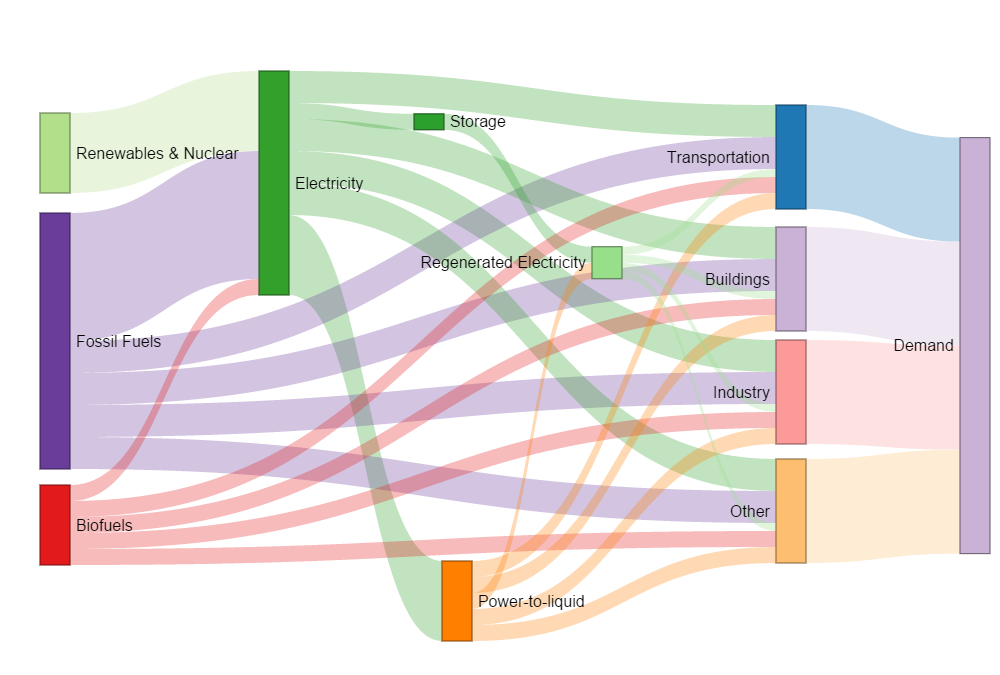

In [304]:
Image('sankey.png') 

# Fossils

## oil

In [305]:
#parse data

fuel='oil'
units={'bp':kbpd_to_TWh,'eia':kbpd_to_TWh}
end={'bp':2014,'eia':2014}

#oil prod
if path==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=53&pdid=53,55,57,58,59,56,54,62,63,64,65,66,67,68&aid=1&cid=regions&syid=1980&eyid=2014&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Total_Oil_Supply_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Total_Oil_Supply_(Thousand_Barrels_Per_Day).xls'
sheet=u'Oil Production – Barrels'
parse(url,sheet,fuel,'prod',units,end)

#oil cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=5&pdid=5,62,63,64,65,66,67,68&aid=2&cid=regions&syid=1980&eyid=2014&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Total_Petroleum_Consumption_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Total_Petroleum_Consumption_(Thousand_Barrels_Per_Day).xls'
sheet=u'Oil Consumption – Barrels'
parse(url,sheet,fuel,'cons',units,end)

#oil res
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=57&pdid=57&aid=6&cid=regions&syid=1980&eyid=2015&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BB&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Crude_Oil_Proved_Reserves_(Billion_Barrels).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Crude_Oil_Proved_Reserves_(Billion_Barrels).xls'
units={'bp':Gboe_to_TWh,'eia':Gboe_to_TWh} #redefine units
end={'bp':2014,'eia':2015}
sheet=u'Oil - Proved reserves history'
parse(url,sheet,fuel,'res',units,end)

#oil emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=5&pdid=5&aid=8&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/CO2_Emissions_from_the_Consumption_of_Petroleum_(Million_Metric_Tons).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/CO2_Emissions_from_the_Consumption_of_Petroleum_(Million_Metric_Tons).xls'
units={'bp':3.07*kbpd_to_TWh/mtoe_to_TWh,'eia':1} #redefine units
end={'bp':2014,'eia':2013}
sheet=u'Oil Consumption – Barrels'
parse(url,sheet,fuel,'emi',units,end)

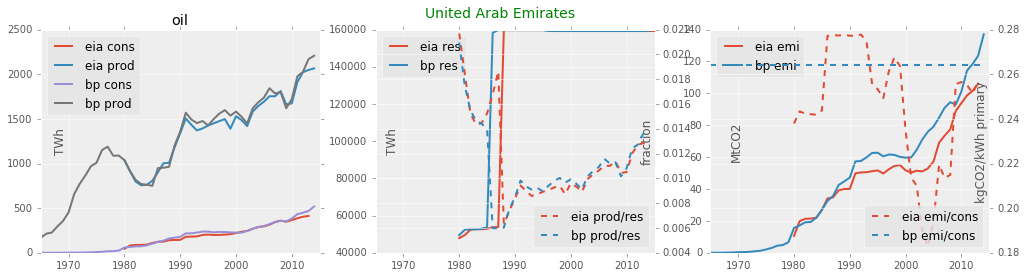

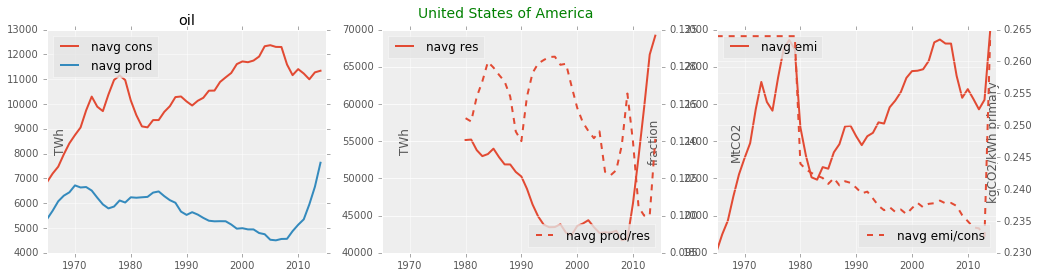

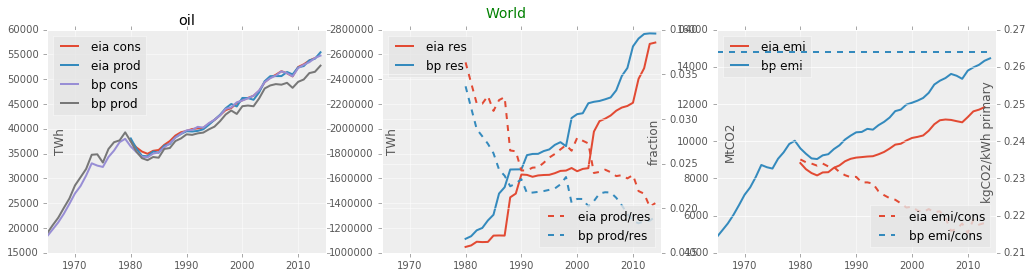

In [306]:
plotter('United Arab Emirates',fuel,dbs) #change 'avg' to {'bp'}, 'eia', 'all' or any set such as {'bp','avg'}
plotter('United States of America',fuel,'navg')
plotter('World',fuel,dbs)
#dbs={'bp','eia'}
#avg is average where only both eia and bp data is available, null otherwise
#navg is NaN-average which takes a value of only one dataset where only dataset is avialble, avg elsewhere

## gas

In [307]:
fuel='gas'
units={'bp':bcf_to_TWh*365.25,'eia':bcf_to_TWh}
end={'bp':2014,'eia':2014}

#gas prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=26&pdid=3,43,48,24,26&aid=1&cid=regions&syid=1980&eyid=2014&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BCF&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Dry_Natural_Gas_Production_(Billion_Cubic_Feet).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Dry_Natural_Gas_Production_(Billion_Cubic_Feet).xls'
sheet=u'Gas Production – Bcf'
parse(url,sheet,fuel,'prod',units,end)

#gas cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=26&pdid=26&aid=2&cid=regions&syid=1980&eyid=2014&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BCF&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Dry_Natural_Gas_Consumption_(Billion_Cubic_Feet).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Dry_Natural_Gas_Consumption_(Billion_Cubic_Feet).xls'
sheet=u'Gas Consumption – Bcf'
parse(url,sheet,fuel,'cons',units,end)

#gas res
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=3&pdid=3&aid=6&cid=regions&syid=1980&eyid=2015&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TCF&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Proved_Reserves_of_Natural_Gas_(Trillion_Cubic_Feet).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Proved_Reserves_of_Natural_Gas_(Trillion_Cubic_Feet).xls'
units={'bp':tcm_to_TWh,'eia':tcf_to_TWh} #redefine units
end={'bp':2014,'eia':2015}
sheet=u'Gas - Proved reserves history '
parse(url,sheet,fuel,'res',units,end)

#gas emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=3&pdid=3,51,52&aid=8&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/C02_Emissions_from_the_Consumption_and_Flaring_of_Natural_Gas_(Million_Metric_Tons).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/C02_Emissions_from_the_Consumption_and_Flaring_of_Natural_Gas_(Million_Metric_Tons).xls'
units={'bp':2.35*bcf_to_TWh*365.25/mtoe_to_TWh,'eia':1} #redefine units
end={'bp':2014,'eia':2013}
sheet=u'Gas Consumption – Bcf'
parse(url,sheet,fuel,'emi',units,end)

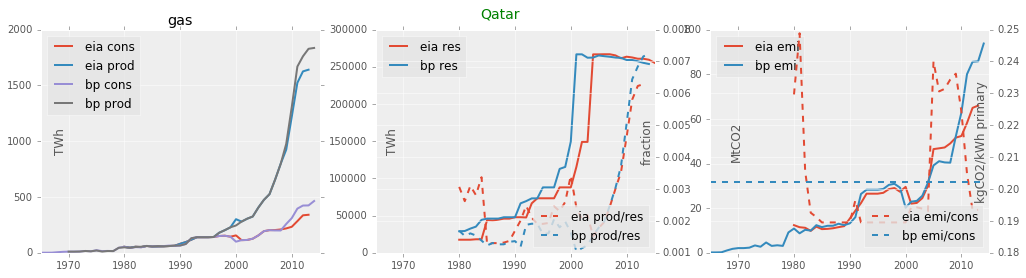

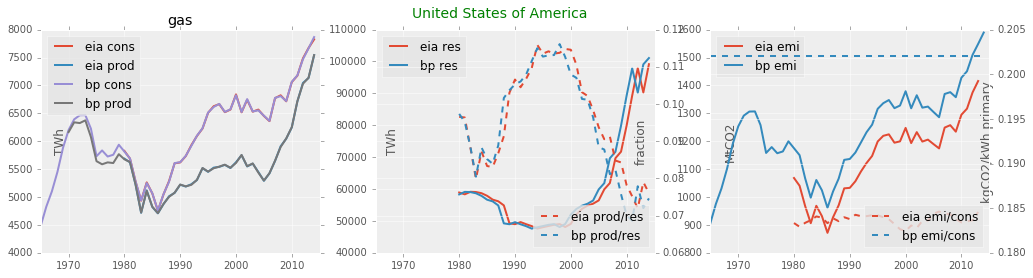

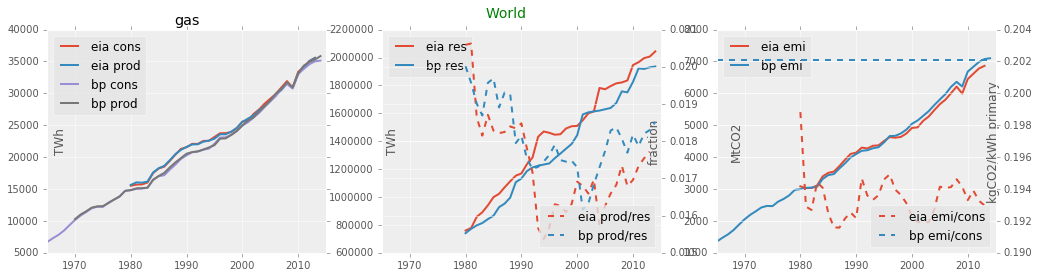

In [308]:
plotter('Qatar','gas',dbs)
plotter('United States of America','gas',dbs)
plotter('World','gas',dbs)

## coal

In [309]:
fuel='coal'
units={'bp':mtoe_to_TWh,'eia':qbtu_to_TWh}
end={'bp':2014,'eia':2012}

#coal prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=7&pdid=7,9,11,12,14,17,18,21&aid=1&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Total_Primary_Coal_Production_(Quadrillion_Btu).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Total_Primary_Coal_Production_(Quadrillion_Btu).xls'
sheet=u' Coal Production - Mtoe'
parse(url,sheet,fuel,'prod',units,end)

#coal cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=1&pdid=1&aid=2&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Total_Coal_Consumption_(Quadrillion_Btu).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Total_Coal_Consumption_(Quadrillion_Btu).xls'
sheet=u'Coal Consumption -  Mtoe'
parse(url,sheet,fuel,'cons',units,end)

#coal res
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=7&pdid=7,9,14&aid=6&cid=regions&syid=2011&eyid=2011&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MST&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Total_Recoverable_Coal_(Million_Short_Tons).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Total_Recoverable_Coal_(Million_Short_Tons).xls'
units={'bp':mtcoe_to_TWh,'eia':mstcoe_to_TWh} #redefine units
end={'bp':2014,'eia':2011}
sheet=u'Coal - Reserves'
parse(url,sheet,fuel,'res',units,end,False,1) #don't calculte averages yet, fix db first
#fill bp data for 2011-2013
for i in data.keys():
    for j in range(2011,2014):
        try:
            data[i][j]['energy'][fuel]['res']['bp']=np.NaN
        except: pass
parse(url,sheet,fuel,'res',units,end,False,2) #recalculate averages - last parameter is only average

#coal emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=1&pdid=1&aid=8&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/CO2_Emissions_from_the_Consumption_of_Coal_(Million_Metric_Tons).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/CO2_Emissions_from_the_Consumption_of_Coal_(Million_Metric_Tons).xls'
units={'bp':3.96*1,'eia':1} #redefine units
end={'bp':2014,'eia':2012}
sheet=u'Coal Consumption -  Mtoe'
#bp does not report direct emissions values, just consumption + carbon content
parse(url,sheet,fuel,'emi',units,end)

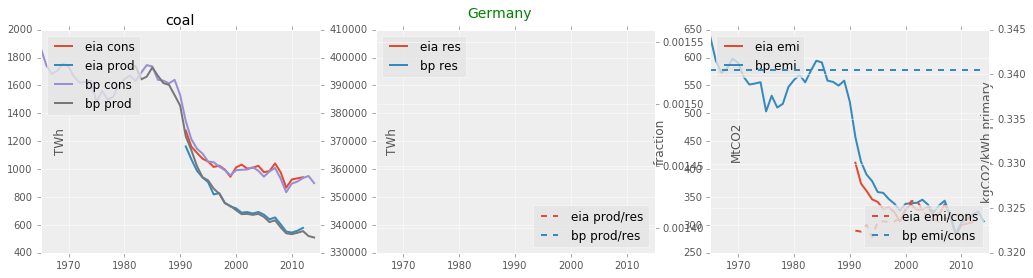

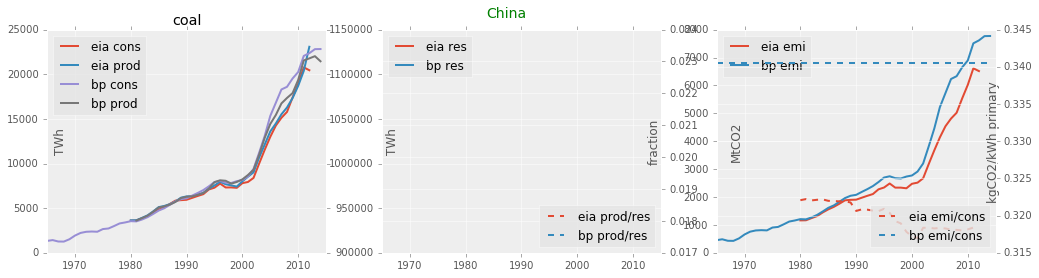

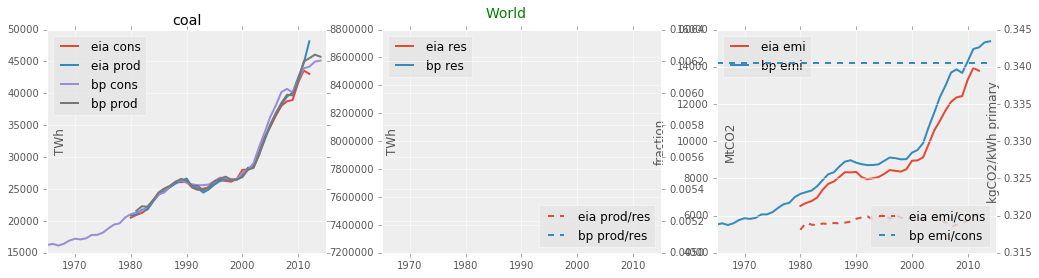

In [310]:
plotter('Germany','coal',dbs)
plotter('China','coal',dbs)
plotter('World','coal',dbs)

# Biofuels

BP only gives production values.

In [311]:
fuel='biofuels'
units={'bp':mtoe_to_TWh/1000,'eia':kbpd_to_TWh}
end={'bp':2018,'eia':2012}

#biofuels prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=79&pid=79&pdid=79,80,81&aid=1&cid=regions&syid=2000&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Total_Biofuels_Production_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Total_Biofuels_Production_(Thousand_Barrels_Per_Day).xls'
sheet=u'Biofuels Production - Ktoe'
parse(url,sheet,fuel,'prod',units,end)

#biofuels cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=79&pid=79&pdid=79,80,81&aid=2&cid=regions&syid=2000&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Total_Biofuels_Consumption_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Total_Biofuels_Consumption_(Thousand_Barrels_Per_Day).xls'
sheet='none'
parse(url,sheet,fuel,'cons',units,end)

#fill data after 2014
for i in data.keys():
    for j in range(2015,2019):
        try:
            data[i][j]['energy'][fuel]={k:{l:np.NaN for l in (dbs|{'avg','navg'})} for k in datatypes}
        except: pass

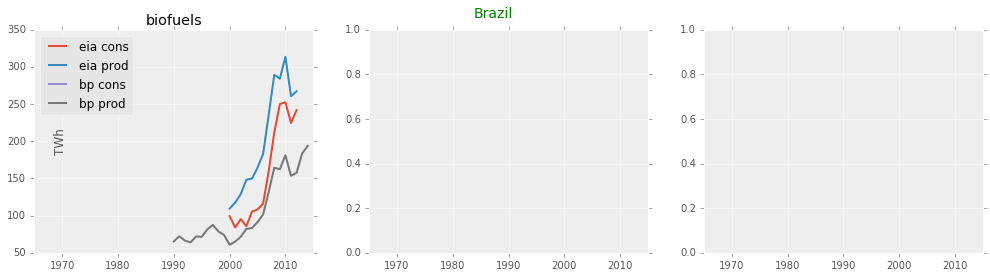

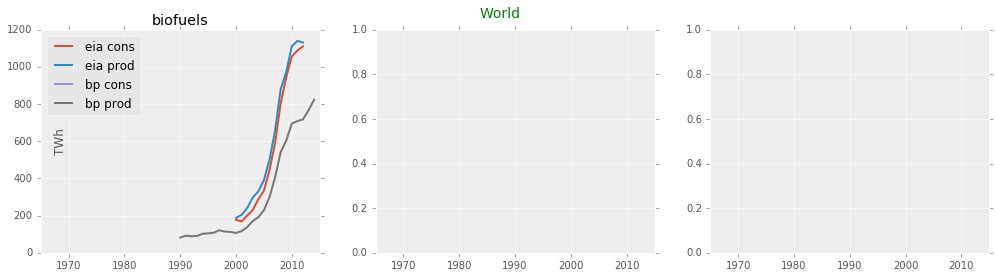

In [312]:
plotter('Brazil','biofuels',dbs)
plotter('World','biofuels',dbs)

# Electricity

Currently electricity production = consumption + losses - imports + exports + (storage = 0)  
Since there is no substantial long-term storage and the losses are quasi-constant around 7%, one call to the database is enough. EIA only gives generation values, while BP only gives consumption values. Strangely, BP consumption values are higher than EIA generation values.

## nuclear

In [313]:
fuel='nuclear'
units={'bp':1,'eia':1}
end={'bp':2014,'eia':2013}

#nuclear prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=2&pid=27&pdid=&aid=12&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Nuclear_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Nuclear_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#nuclear cons
url='none'
sheet=u'Nuclear Consumption - TWh'
parse(url,sheet,fuel,'cons',units,end)

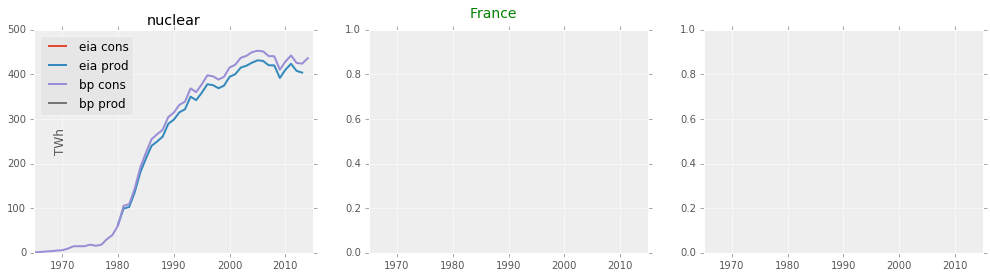

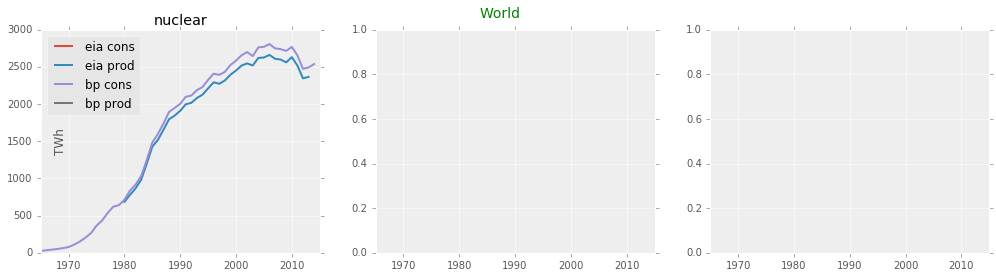

In [314]:
plotter('France','nuclear',dbs)
plotter('World','nuclear',dbs)

## hydro

In [315]:
fuel='hydro'
units={'bp':1,'eia':1}
end={'bp':2014,'eia':2013}

#hydro prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=2&pid=33&pdid=&aid=12&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Hydroelectricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Hydroelectricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#hydro cons
url='none'
sheet=u'Hydro Consumption - TWh'
parse(url,sheet,fuel,'cons',units,end)

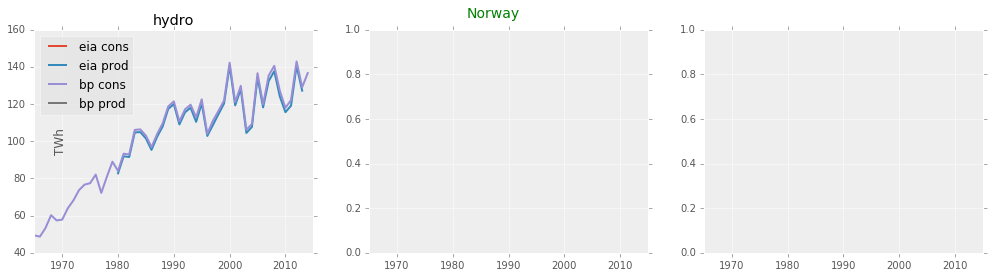

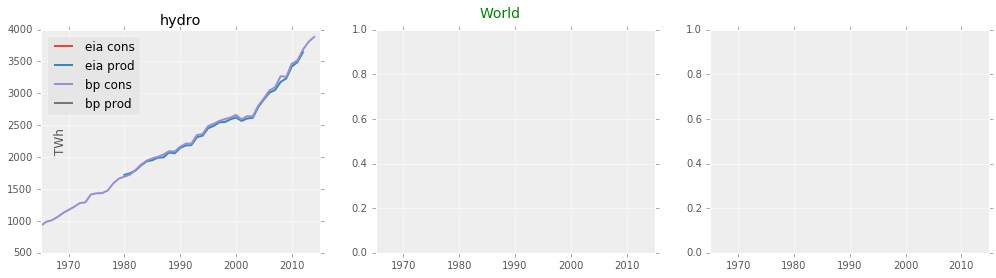

In [316]:
plotter('Norway','hydro',dbs)
plotter('World','hydro',dbs)

## solar

In [317]:
fuel='solar'
units={'bp':1,'eia':1}
end={'bp':2014,'eia':2012}

#solar prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=116&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Solar_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Solar_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#solar cons
url='none'
sheet=u'Solar Consumption - TWh'
parse(url,sheet,fuel,'cons',units,end)

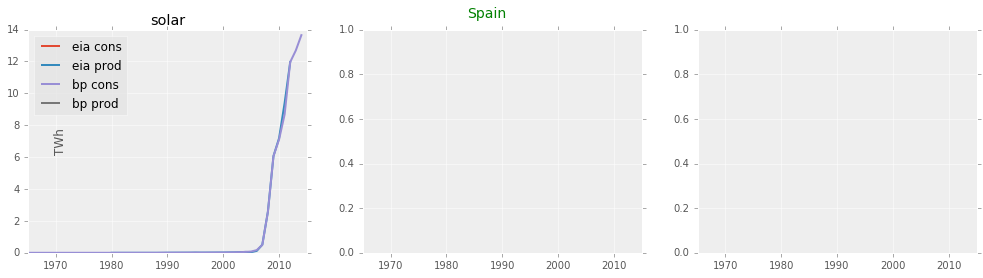

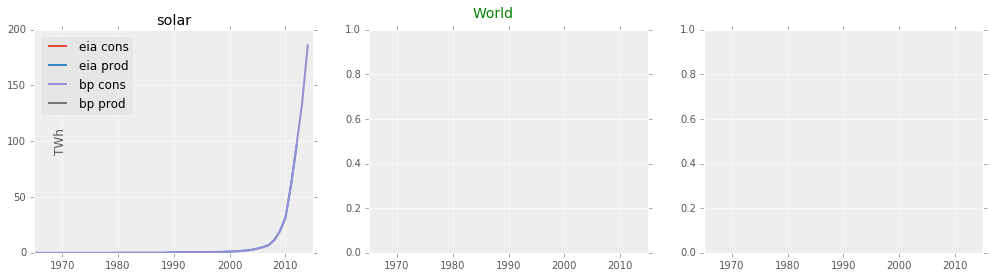

In [318]:
plotter('Spain','solar',dbs)
plotter('World','solar',dbs)

## wind

In [319]:
fuel='wind'
units={'bp':1,'eia':1}
end={'bp':2014,'eia':2012}

#wind prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=37&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Wind_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Wind_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#wind cons
url='none'
sheet=u'Wind Consumption - TWh '
parse(url,sheet,fuel,'cons',units,end)

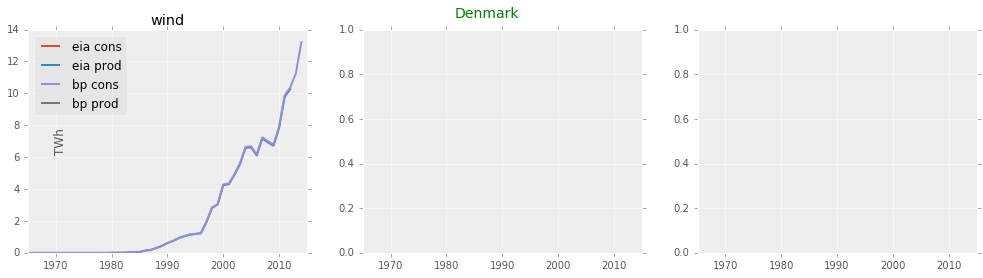

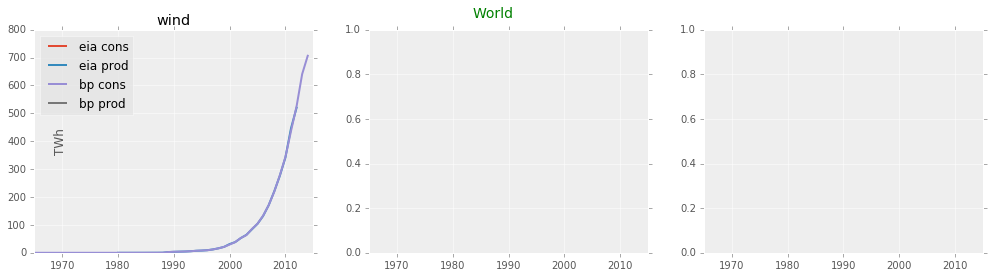

In [320]:
plotter('Denmark','wind',dbs)
plotter('World','wind',dbs)

## geo+other

In [321]:
fuel='geo_other'
units={'bp':1,'eia':1}
end={'bp':2014,'eia':2012}

#geo+other prod
#geothermal
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=35&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Geothermal_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Geothermal_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
eia_parse(url,fuel,'prod',units['eia'],end['eia'])
#biomass+waste
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=38&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Biomass_and_Waste_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Biomass_and_Waste_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
eia_parse(url,fuel,'prod',units['eia'],end['eia'],True) #set last parameter to True to make operation additive
#tidal+wave
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=117&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Tide_and_Wave_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Tide_and_Wave_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
eia_parse(url,fuel,'prod',units['eia'],end['eia'],True) #set last parameter to True to make operation additive

url='none'
sheet='none'
parse(url,sheet,fuel,'prod',units,end,True)

#geo+other cons
url='none'
sheet=u'Geo Biomass Other - TWh'
parse(url,sheet,fuel,'cons',units,end)

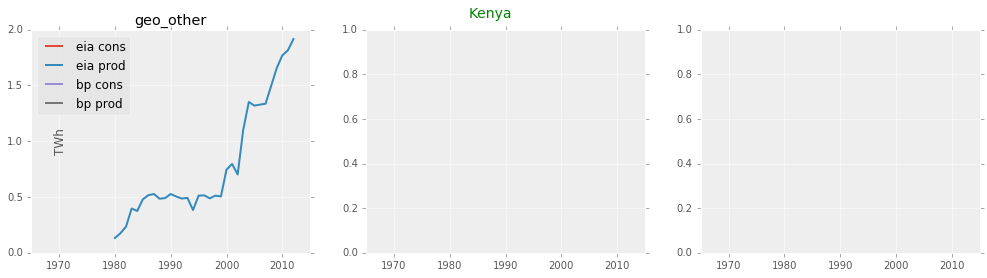

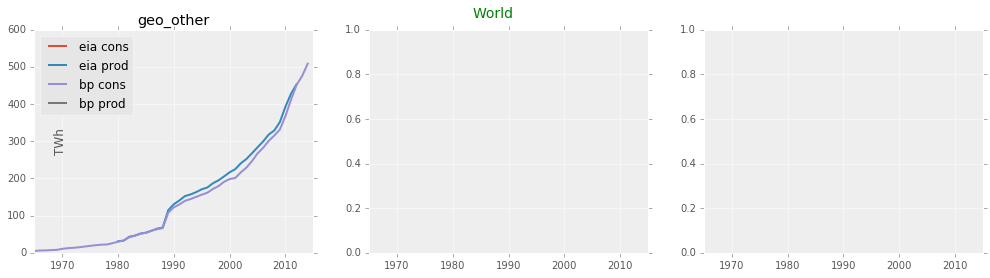

In [322]:
plotter('Kenya','geo_other',dbs)
plotter('World','geo_other',dbs)

# Total primary energy

## Sum

In [323]:
reset('nrg_sum')
for country in data:
    for year in data[country]:
        for k in {'prod','cons','emi','res'}:
            for j in dbs:
                data[country][year]['energy']['nrg_sum'][k][j]=\
                np.nansum([data[country][year]['energy'][i][k][j] for i in data[country][year]['energy'].keys() if (i not in {'nrg','nrg_sum'})])
                if (data[country][year]['energy']['nrg_sum'][k][j]==0): data[country][year]['energy']['nrg_sum'][k][j]=np.NaN

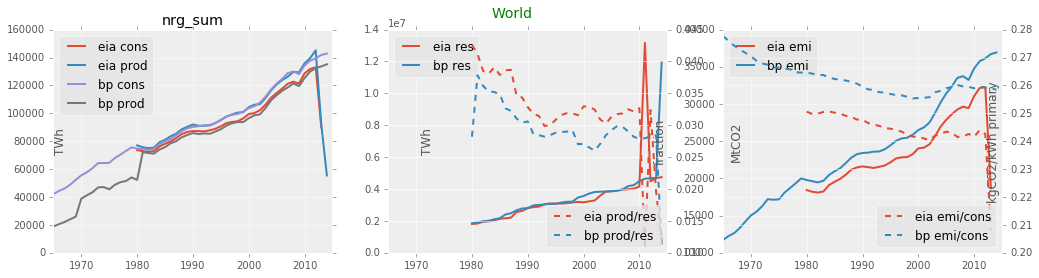

In [324]:
plotter('World','nrg_sum',dbs)

## Direct parse

In [325]:
fuel='nrg'
units={'bp':mtoe_to_TWh,'eia':qbtu_to_TWh}
end={'bp':2014,'eia':2012}

#total prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=44&pid=44&pdid=44&aid=1&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Total_Primary_Energy_Production_(Quadrillion_Btu).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Total_Primary_Energy_Production_(Quadrillion_Btu).xls'
sheet=u'none'
parse(url,sheet,fuel,'prod',units,end)

#total cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=44&pid=44&pdid=44,45,46,47&aid=2&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/Total_Primary_Energy_Consumption_(Quadrillion_Btu).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/Total_Primary_Energy_Consumption_(Quadrillion_Btu).xls'
sheet=u'Primary Energy Consumption '
parse(url,sheet,fuel,'cons',units,end)

#total emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=90&pid=44&pdid=&aid=8&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/_(Million_Metric_Tons).xls'
else: url='E:/Dropbox/Public/datarepo/Set/db/_(Million_Metric_Tons).xls'
units={'bp':1,'eia':1} #redefine units
end={'bp':2014,'eia':2012}
sheet=u'Carbon Dioxide Emissions'
parse(url,sheet,fuel,'emi',units,end)

ERROR getting World nrg eia prod/res
ERROR plotting World nrg eia prod/res
ERROR getting World nrg bp prod/res
ERROR plotting World nrg bp prod/res


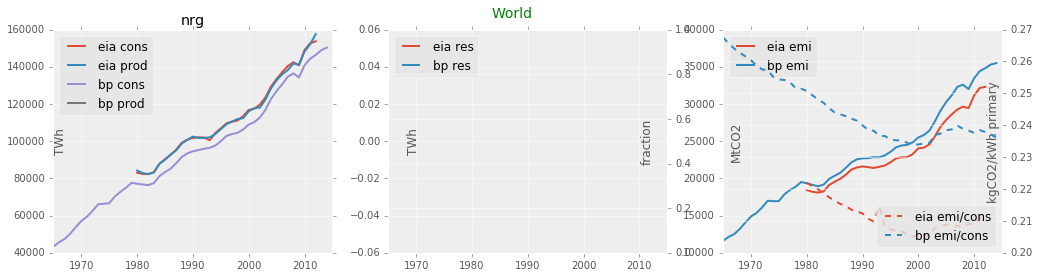

In [326]:
plotter('World','nrg',dbs)

# Save data

In [327]:
#save data
import json
file(pop_path+'savedata.json','w').write(json.dumps(data))

In [265]:
#load data - if already saved
predata=json.loads(file(pop_path+'savedata.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}

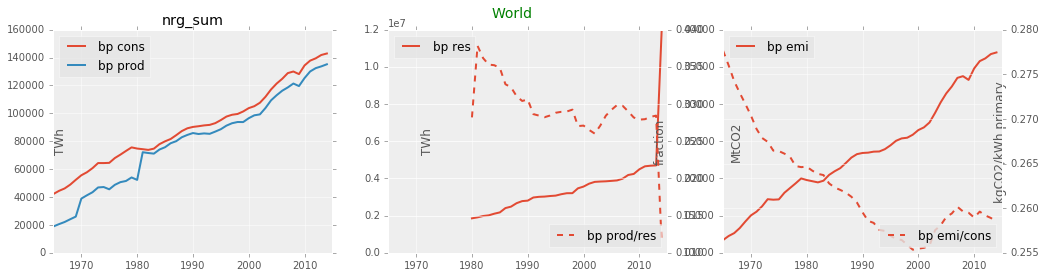

In [328]:
plotter('World','nrg_sum','bp')

In [329]:
from matplotlib.patches import Rectangle
def stackplotter(country,db='navg',datatype='all',fuels='all',limits=[1965,2015]):
    x=np.sort(list(years))
    if datatype!='all':
        fig, ax = plt.subplots(1,1,subplot_kw=dict(axisbg='#EEEEEE'),figsize=(10,6))
        ax.grid(color='white', linestyle='solid')

        if type(fuels)==str: 
            if fuels=='all':fuels=allfuels
            else: fuels=[fuels]
        ind=np.argsort([np.isnan(np.array([data[country][year]['energy'][fuel][datatype][db] for year in x]).T).sum() for fuel in fuels])
        fuels=np.array(fuels)[ind]
        colors=[gcolors[fuel] for fuel in fuels]
        y=np.array([[data[country][year]['energy'][i][datatype][db] for i in fuels] for year in x]).T

        stack_coll=ax.stackplot(x,y,colors=colors)
        proxy_rects = [Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in stack_coll][::-1]

        ax.legend(proxy_rects, fuels[::-1],loc=2,framealpha=0)
        if datatype=='emi': ax.set_ylabel('MtCO2',labelpad=10)
        else: ax.set_ylabel('TWh',labelpad=10)
        ax.set_title(db+' '+datatype)
        ax.set_xlim(limits)
    else:
        fig, ax = plt.subplots(1,2,subplot_kw=dict(axisbg='#EEEEEE'),figsize=(17,5))
        datatype=['prod','cons']
        ymax=0
        for k in range(2): 
            ax[k].grid(color='white', linestyle='solid')
        
            if type(fuels)==str: 
                if fuels=='all':fuels=allfuels
                else: fuels=[fuels]
            ind=np.argsort([np.isnan(np.array([data[country][year]['energy'][fuel][datatype[k]][db] for year in x]).T).sum() for fuel in fuels])
            fuels=np.array(fuels)[ind]
            colors=[gcolors[fuel] for fuel in fuels]
            y=np.array([[data[country][year]['energy'][i][datatype[k]][db] for i in fuels] for year in x]).T
            
            stack_coll=ax[k].stackplot(x,y,colors=colors)
            proxy_rects = np.array([Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in stack_coll][::-1])

            ax[k].legend(proxy_rects, fuels[::-1],loc=2,framealpha=0.7)
            ax[k].set_ylabel('TWh',labelpad=10)
            ax[k].set_title(db+' '+datatype[k])
            ax[k].set_xlim(limits)
            ymax=max(ymax,ax[k].get_ylim()[1])
        for k in range(2): 
            ax[k].set_ylim([0,ymax])
    plt.suptitle(country,fontsize=14,color='green')
    plt.show()

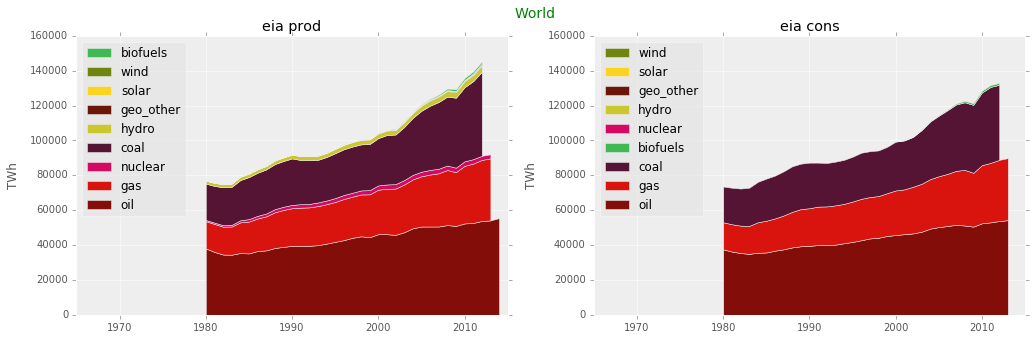

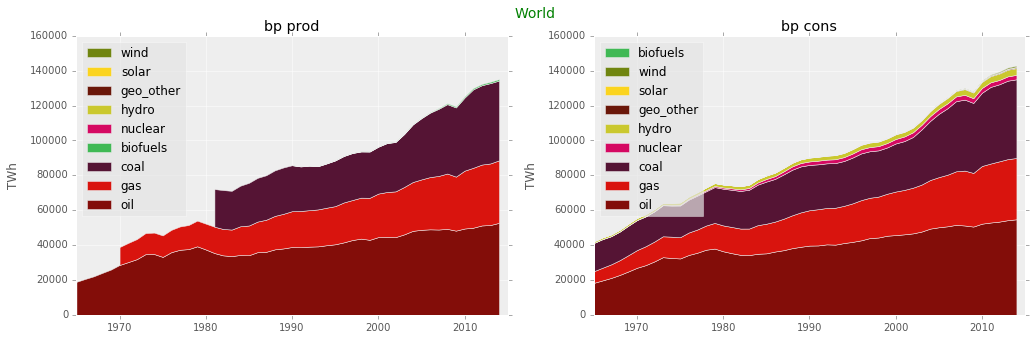

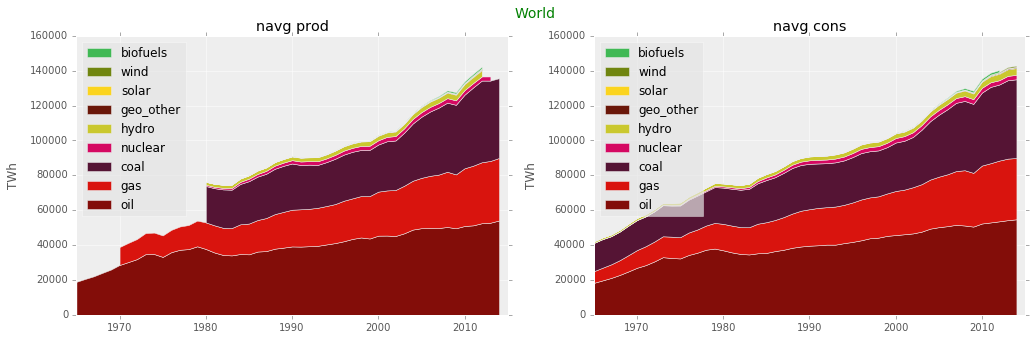

In [330]:
stackplotter('World','eia','all','all')
stackplotter('World','bp','all','all')
stackplotter('World','navg','all','all')

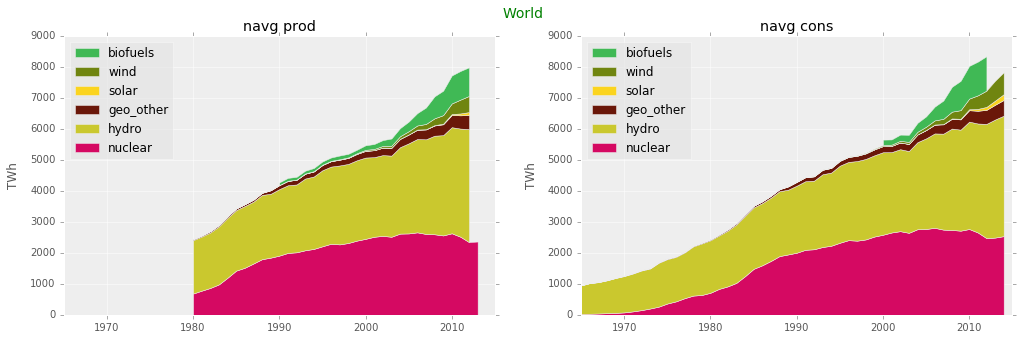

In [331]:
stackplotter('World','navg','all',['hydro','nuclear','geo_other','biofuels','solar','wind'])

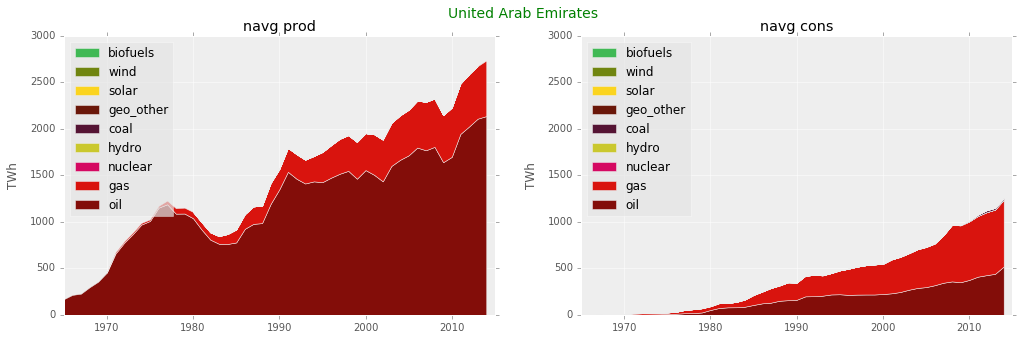

In [332]:
stackplotter('United Arab Emirates','navg','all','all')

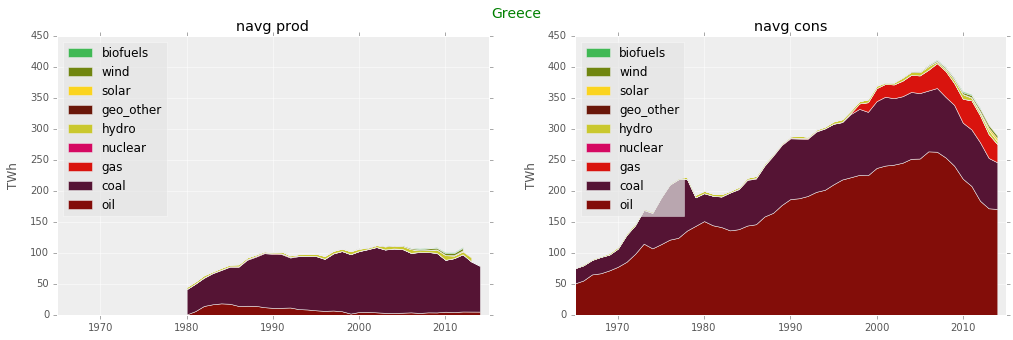

In [333]:
stackplotter('Greece','navg','all','all')

# Extrapolate missing data

## Extrapolate where only consumption or production is missing

In [334]:
#dictionary to take into account interval edges when extrapolating. has to do with how easy to scale a technology
extrapolatedict={'nrg':2,'oil':1,
 'coal':2,
 'gas':1,
 'nuclear':1,
 'biofuels':1,
 'hydro':2,
 'geo_other':1,
 'solar':1,
 'wind':1}

In [155]:
#suppres warnings
import warnings
warnings.simplefilter(action = "ignore")

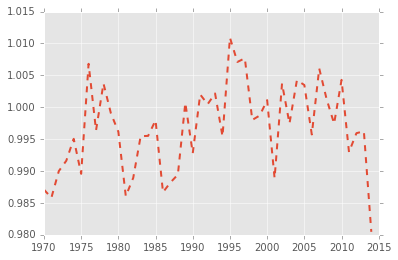

In [336]:
fracplotter('World','gas','navg','cons','prod',plt.subplots(1,1)[1])

In [17]:
def interpolate(d,years,gfit=2,depth=1,polyorder=1,override=False,ends=False):
#d=helper
#years=[2015]
#gfit=1
#depth=extrapolatedict[fuel]
#polyorder=1
#override=True
#ends=True
#if True:
    #depth * length of interpolation substrings will be taken to the left and right
    #for example for {1971:5,1972:6,1973:7,1974:5} interpolating it over 1969-1990
    #for the section 1960-1970 (2 elements) the values from 1972,1973,1974 (3 elements) will be taken with depth 1.5
    #for the section 1974-1990 (15 elements) all values  (4 elements) will be taken to extrapolate
    #override to extend interpolation to edges, i.e. extrapolate
    if (gfit>2): 
        print 'interpolate takes only 1 (polynomial) or 2 (exponential) as 3rd argument [default=2]'
        return
    mydict={}
    if d!={}:
        missing_points=[[]]
        onbeginning=False
        onend=False
        for year in years:
            if year not in d.keys():
                missing_points[-1].append(year)
            else:
                missing_points.append([])
        for m in missing_points:
            if m:
                fit=gfit

                #if only one point, set min extrapolation depth to 2
                if (len(m)==1): depth=max(depth,2)
                
                #check if it is ends of the interval, 
                if ((m[-1]<np.sort(d.keys())[0])|(m[0]>np.sort(d.keys())[-1])): 
                    #if not set to override then extrapolate mean only
                    if not override: 
                        fit=0                    

                if fit==0: #take average
                    y = {k: d[k] for k in set(d.keys()).intersection(range(int(max(min(years),min(m)-int(3))),\
                                                                           int(min(max(years),max(m)+int(3))+1)))}
                    #returned empty, on beginning
                    if y=={}:
                        if m[-1]<np.sort(d.keys())[0]:y={np.sort(d.keys())[0]:d[np.sort(d.keys())[0]]}
                        elif m[0]>np.sort(d.keys())[-1]:y={np.sort(d.keys())[-1]:d[np.sort(d.keys())[-1]]}
                    for i in range(len(m)):
                        mydict[m[i]]=np.mean(y.values())
                elif fit==1:
                    #intersector
                    y = {k: d[k] for k in set(d.keys()).intersection(range(int(max(min(years),\
                                min(m)-int(depth*len(m)))),int(min(max(years),max(m)+int(depth*len(m)))+1)))}
                    #returned empty
                    if y=={}:
                        if m[-1]<np.sort(d.keys())[0]:y={np.sort(d.keys())[0]:d[np.sort(d.keys())[0]]}
                        elif m[0]>np.sort(d.keys())[-1]:y={np.sort(d.keys())[-1]:d[np.sort(d.keys())[-1]]}
                            
                    w = np.polyfit(y.keys(),y.values(),polyorder) # obtaining regression parameters
                    if (polyorder==1):
                        intersector=w[0]*np.array(m)+w[1]
                    else:
                        intersector=w[0]*np.array(m)*np.array(m)+w[1]*np.array(m)+w[2]
                    for i in range(len(m)):
                        mydict[m[i]]=max(0,intersector[i])
                else:
                    #exponential intersector
                    y = {k: d[k] for k in set(d.keys()).intersection(range(int(max(min(years),\
                                min(m)-int(depth*len(m)))),int(min(max(years),max(m)+int(depth*len(m)))+1)))}
                    #returned empty
                    if y=={}:
                        if m[-1]<np.sort(d.keys())[0]:y={np.sort(d.keys())[0]:d[np.sort(d.keys())[0]]}
                        elif m[0]>np.sort(d.keys())[-1]:y={np.sort(d.keys())[-1]:d[np.sort(d.keys())[-1]]}
                    
                    w = np.polyfit(y.keys(),np.log(y.values()),1) # obtaining log regression parameters (exp fitting)
                    intersector=np.exp(w[1])*np.exp(w[0]*np.array(m))
                    for i in range(len(m)):
                        mydict[m[i]]=max(0,intersector[i])
                    
                #record ends adjustment beginning and end
                if ends:
                    if (m[-1]<np.sort(d.keys())[0]):
                        onbeginning=True
                        beginning=m[-1]
                    if (m[0]>np.sort(d.keys())[-1]): 
                        onend=True
                        end=m[0]
        #finish ends adjustment
        if ends:
            if onbeginning:
                #calculate adjustment scaler
                if (mydict[beginning]==0): scaler=0
                elif (beginning+1 in d): scaler=d[beginning+1]*1.0/mydict[beginning]
                else: scaler=d[np.sort(d.keys())[0]]*1.0/mydict[beginning]
                #readjust data
                for year in mydict:
                    if (year<=beginning):
                        mydict[year]*=scaler
            if onend:
                #calculate adjustment scaler
                if (mydict[end]==0): scaler=0
                elif (end-1 in d): scaler=d[end-1]*1.0/mydict[end]
                else: scaler=d[np.sort(d.keys())[-1]]*1.0/mydict[end]
                #readjust data
                for year in mydict:
                    if (year>=end):
                        mydict[year]*=scaler

    #return interpolated points
    return mydict

In [348]:
#update data
#extend data dictionary datatypes with extrapolations as navg2
for country in data:
    for year in data[country]:
        for fuel in data[country][year]['energy']:
            for datatype in data[country][year]['energy'][fuel]:
                if 'navg' in data[country][year]['energy'][fuel][datatype]:
                    data[country][year]['energy'][fuel][datatype]['navg2']=data[country][year]['energy'][fuel][datatype]['navg']
#extrapolate data
#direct extrapolation only valid for World, individual countries have imports and exports, to be addressed later

#for country in {'World'}:
for country in data:
#for country in testcountries:
    for fuel in {'oil','coal','gas','nuclear','biofuels','hydro','geo_other','nrg'}: #no need solar and wind, data essentially 0
        try:
            db='navg2'
            top='prod'
            down='cons'
            mini=min(subgetter(country,fuel,db,top)['x'][0],subgetter(country,fuel,db,down)['x'][0])
            maxi=max(subgetter(country,fuel,db,top)['x'][::-1][0],subgetter(country,fuel,db,down)['x'][::-1][0])
            helper = {fracgetter(country,fuel,db,top,down)['x'][i]:\
                      fracgetter(country,fuel,db,top,down)['y'][i] \
                      for i in range(len(fracgetter(country,fuel,db,top,down)['x']))}
            hi=interpolate(helper,range(mini,maxi),1,extrapolatedict[fuel],1,False,False)
            for year in hi:
                if year not in subgetter(country,fuel,db,top)['x']: 
                    data[country][year]['energy'][fuel][top][db]=hi[year]*data[country][year]['energy'][fuel][down][db]
                else: data[country][year]['energy'][fuel][down][db]=hi[year]*data[country][year]['energy'][fuel][top][db]
        except: pass #print 'ERROR', country, fuel #error recording

ERROR getting Guyana nrg navg2 prod/cons


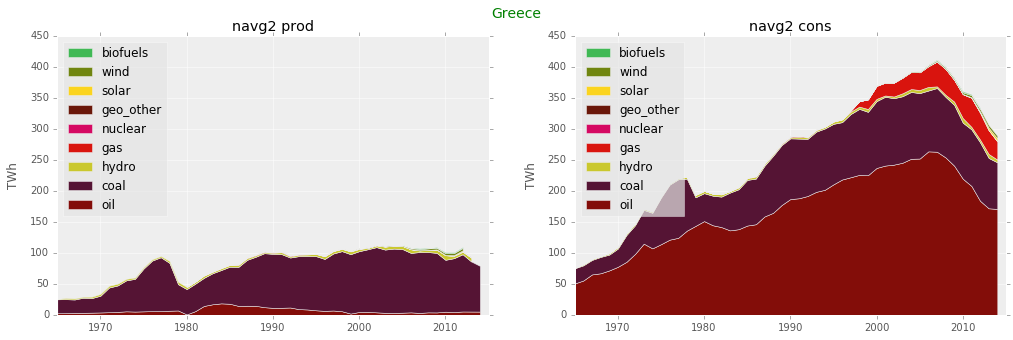

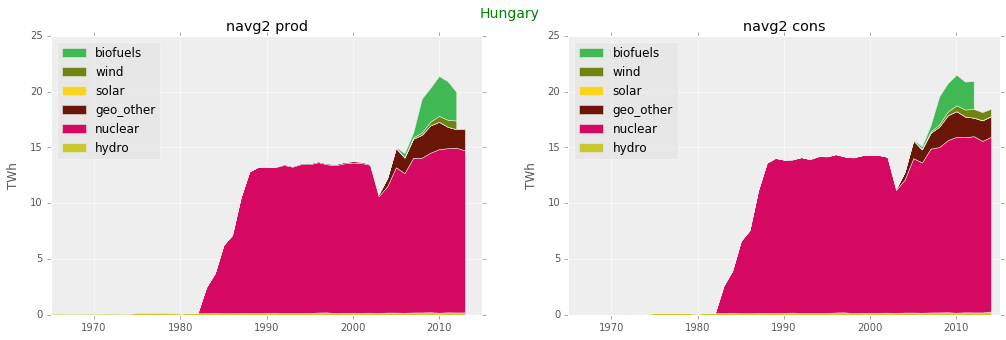

In [349]:
stackplotter('Greece','navg2','all','all')
stackplotter('Hungary','navg2','all',['hydro','nuclear','geo_other','biofuels','solar','wind'])

## Extrapolate all data for the period 1950-2013

In [350]:
def navg3fcn():
    global data    
    #update/reset data
    #extend data dictionary datatypes with extrapolations as navg3
    for country in data:
        for year in data[country]:
            for fuel in data[country][year]['energy']:
                for datatype in data[country][year]['energy'][fuel]:
                    if 'navg2' in data[country][year]['energy'][fuel][datatype]:
                        data[country][year]['energy'][fuel][datatype]['navg3']=data[country][year]['energy'][fuel][datatype]['navg2']
    #extrapolate data
    #direct extrapolation only valid for World, individual countries have imports and exports, to be addressed later
    
    #for country in {'World'}:
    for country in data:
    #for country in testcountries:
        for fuel in allfuels+['nrg']:
            try:
                db='navg3'
                for datatype in {'prod','cons'}:
                    helper = {subgetter(country,fuel,db,datatype)['x'][i]:\
                              subgetter(country,fuel,db,datatype)['y'][i] \
                              for i in range(len(subgetter(country,fuel,db,datatype)['x']))}
                    #start=1950 #was 1950 - we dont include unavailable data anymore
                    start=1995
                    #if fuel in fossils: start=1965 #for fossils we will use Hubbert curves, later
                    hi=interpolate(helper,range(start,2017),2,extrapolatedict[fuel],1,True,True)
                    for year in hi:
                        data[country][year]['energy'][fuel][datatype][db]=hi[year]
            except: pass #print 'ERROR', country, fuel #error recording
navg3fcn()

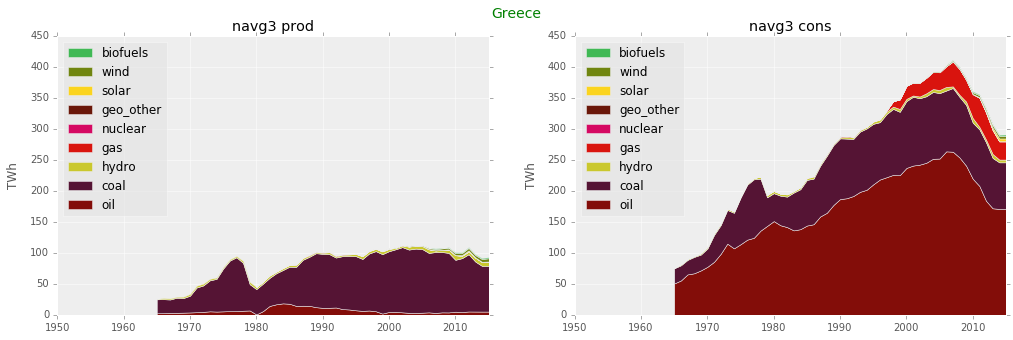

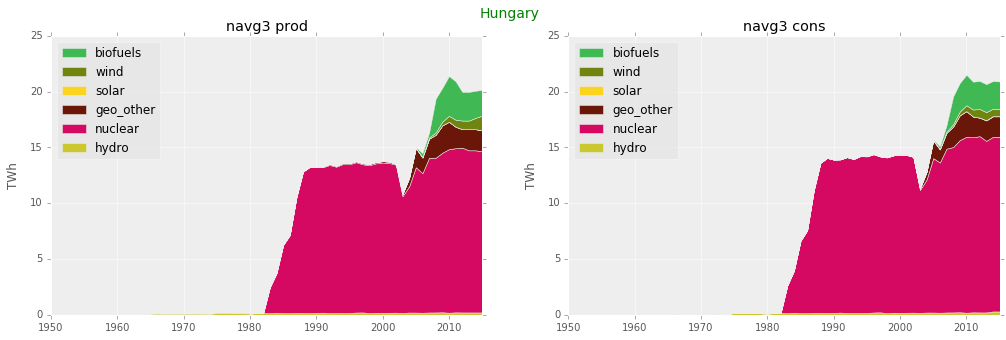

In [352]:
stackplotter('Greece','navg3','all','all',[1950,2015])
stackplotter('Hungary','navg3','all',['hydro','nuclear','geo_other','biofuels','solar','wind'],[1950,2015])

## Re-sum

In [353]:
reset('nrg_sum')
for country in data:
    for year in data[country]:
        for k in {'prod','cons'}:
            for j in ['navg3', 'navg', 'eia', 'navg2', 'bp', 'avg']:
                data[country][year]['energy']['nrg_sum'][k][j]=\
                np.nansum([data[country][year]['energy'][i][k][j] for i in data[country][year]['energy'].keys() if (i not in {'nrg','nrg_sum'})])
                #if (data[country][year]['energy']['nrg_sum'][k][j]==0): data[country][year]['energy']['nrg_sum'][k][j]=np.NaN

## Pop out countries with no data

In [354]:
nodata=[]
for country in data:
    notnull=False
    for year in data[country]:
        for fuel in data[country][year]['energy']:
            for k in {'cons'}:
                for j in ['navg3']:
                    if (~(np.isnan(data[country][year]['energy'][fuel][k][j]))&\
                            (data[country][year]['energy'][fuel][k][j]!=0)):
                        notnull=True
                if notnull: break
            if notnull: break
        if notnull: break
    if not notnull: nodata.append(country)
for p in nodata:
    data.pop(p);

## Save data

In [361]:
#save data
#file(pop_path+'savedata2.json','w').write(json.dumps(data))
save(True)
#save()

In [355]:
#save data
file(pop_path+'savedata2.json','w').write(json.dumps(data))

In [13]:
#load data - if already saved
predata=json.loads(file(pop_path+'savedata2.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}

## Forecast demand

C:\Anaconda\envs\py27\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


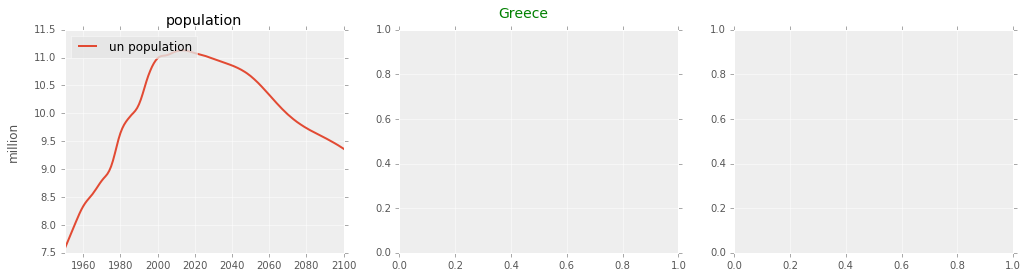

In [62]:
plotter('Greece','population',limits=[1950,2100])

In [15]:
def keyplotter(d,c="royalBlue",o=1,lw=1):
    
    x=[]
    y=[]
    for key in sorted(d.keys()):
        x.append(key)
        y.append(d[key])
    plt.plot(x,y,color=c,alpha=o,lw=lw)

In [31]:
#half of the average of the last avaiable 5-year period by 2100 if higher than 5000
#one third if higher than 15000
#1.5 times if 1500-3000
#double if between 1000-1500
#triple if below 1000
percapita={}
gpercapita={}
glistpercapita=[]
plistpercapita=[]
for country in data:
    maxyear=2100
    if country not in percapita:percapita[country]={}
    for year in range(1995,2020):
        percapita[country][year]=data[country][year]['energy']['nrg_sum']['cons']['navg3']*1000000000000.0/8760/\
        data[country][year]['population']
        if (percapita[country][year]==0): 
            percapita[country][year]=np.NaN
            if year<maxyear: maxyear=year
    avgpercapita=np.nanmean(np.array([percapita[country][i] for i in range(maxyear-6,maxyear-1)]))
    gpercapita[country]=avgpercapita
    glistpercapita.append(avgpercapita)
    plistpercapita.append(data[country][2015]['population'])

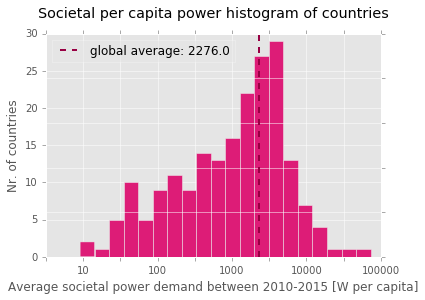

In [32]:
fig, ax = plt.subplots()
a=plt.hist(np.log10(glistpercapita),20,color='#dd1c77')
plt.ylabel('Nr. of countries')
plt.xlabel('Average societal power demand between 2010-2015 [W per capita]')
ax3=plt.twinx()
ax3.set_yticklabels([])
#plt.plot(a[1][:-1],np.cumsum(a[0]),color='black')
#ax.set_xticklabels(["",10,"",100,"",1000,"",10000,"",100000])
#plt.axvline(np.log10(np.mean(glistpercapita)),linewidth=2,label='linear mean: '+str(np.round(np.mean(glistpercapita))))
#plt.axvline(np.mean(np.log10(glistpercapita)),linewidth=2,linestyle='--',label='exp mean: '+str(np.round(10**np.mean(np.log10(glistpercapita)))))
x=np.log10(np.average(glistpercapita,weights=plistpercapita))
plt.axvline(x,linestyle='-',label='global average: '+str(np.round(10**x)),lw=2,color='#980043',ls='--')
x=np.average(np.log10(glistpercapita),weights=plistpercapita)
#plt.axvline(x,linestyle='--',label='pop wgt exp: '+str(np.round(10**x)))
#plt.plot([1],[0],color='k',label='histogram cdf')
plt.legend(framealpha=0.5,loc=2)
def demand_scaler(x): #epsilon peak
    xx=5**x
    lamda=0.01
    mu=-30
    return (8-7.2/(1+np.exp(-lamda*(xx-mu))))**2
x=np.log10(np.arange(10,100000))
#ax2=ax.twinx()
#ax2.plot(x,[demand_scaler(i) for i in x],'g',linewidth=2,label='adjuster')
#ax2.set_ylabel('power demand multipler by 2100',color='g')
#ax2.set_yscale('log')
#ax2.set_yticklabels(["",0.1,1,10,100])
ax.set_xticklabels(["",10,"",100,"",1000,"",10000,"",100000])
#plt.legend(framealpha=0.5,loc=1)
plt.title('Societal per capita power histogram of countries',y=1.05)
plt.show()

In [25]:
#societal behavior is impossible to be changed in 5 years, to demand 
#starts to slowly deviate from BAU (whih is almost linear for most Western countries) from 2015

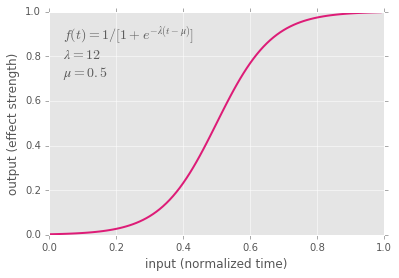

In [101]:
def scurve(x):
    lamda=12
    mu=0.5
    return 1/(1+np.exp(-lamda*(x-mu)))
x=np.arange(100)/100.0
plt.plot(x,[scurve(i) for i in x],c='#dd1c77',lw=2)
plt.xlabel('input (normalized time)')
plt.ylabel('output (effect strength)')
plt.text(0.04, 0.95, u'$f(t)=1/[1+e^{-λ(t-μ)}]$\n$λ=12$\n$μ=0.5$',
    horizontalalignment='left',
    verticalalignment='top',size=14,alpha=0.6) 

In [35]:
demand={}
for country in data:
    if country not in demand: demand[country]={}
    x=gpercapita[country]*demand_scaler(np.log10(gpercapita[country]))
    for year in range(2015,2101):
        percapita[country][year]=x+(gpercapita[country]-x)*(1-scurve((year-2015)*1.0/(2100-2015)))
        demand[country][year]=percapita[country][year]*data[country][year]['population']

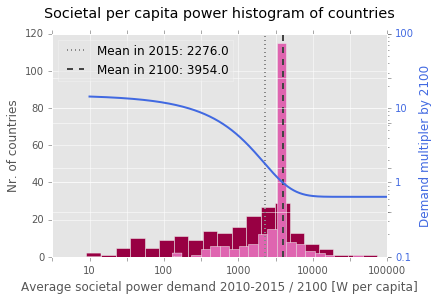

In [57]:
fig, ax = plt.subplots()
a=plt.hist(np.log10(glistpercapita),20,color='#980043')
plt.ylabel('Nr. of countries')
plt.xlabel('Average societal power demand 2010-2015 / 2100 [W per capita]')
ax3=plt.twinx()
ax3.set_yticklabels([])
#plt.plot(a[1][:-1],np.cumsum(a[0]),color='black')
#ax.set_xticklabels(["",10,"",100,"",1000,"",10000,"",100000])
#plt.axvline(np.log10(np.mean(glistpercapita)),linewidth=2,label='linear mean: '+str(np.round(np.mean(glistpercapita))))
#plt.axvline(np.mean(np.log10(glistpercapita)),linewidth=2,linestyle='--',label='exp mean: '+str(np.round(10**np.mean(np.log10(glistpercapita)))))
x=np.log10(np.average(glistpercapita,weights=plistpercapita))
plt.axvline(x,linestyle='-',label='Mean in 2015: '+str(np.round(10**x)),lw=2,color='r',ls=':',c="#888888")
x=np.average(np.log10(glistpercapita),weights=plistpercapita)
#plt.axvline(x,linestyle='--',label='pop wgt exp: '+str(np.round(10**x)))
#plt.plot([1],[0],color='k',label='histogram cdf')
new=[np.log10(percapita[c][2100]) for c in percapita]
x=np.average(new,weights=plistpercapita)
plt.axvline(x,linestyle='-',label='Mean in 2100: '+str(np.round(10**x)),lw=2,ls='--',c="#444444")
ax.hist(new,20,color='#df65b0')
def demand_scaler(x): #epsilon peak
    xx=5**x
    lamda=0.01
    mu=-30
    return (8-7.2/(1+np.exp(-lamda*(xx-mu))))**2
x=np.log10(np.arange(10,100000))
plt.legend(framealpha=0.5,loc=2)
ax.set_ylim(0,120)
ax2=ax.twinx()
ax2.plot(x,[demand_scaler(i) for i in x],'royalBlue',linewidth=2,label='adjuster')
ax2.set_ylabel('Demand multipler by 2100',color='royalBlue')
ax2.set_yscale('log')
ax2.set_yticklabels(["",0.1,1,10,100],color='royalBlue')
ax.set_xticklabels(["",10,"",100,"",1000,"",10000,"",100000])

#plt.legend(framealpha=0.5,loc=1)
plt.title('Societal per capita power histogram of countries',y=1.05)

plt.show()

(2000, 2100)

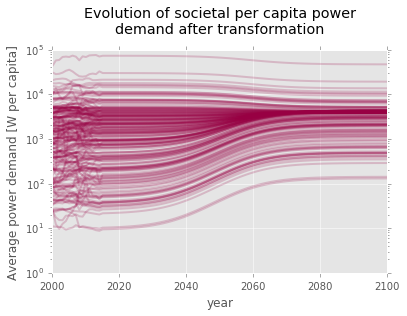

In [75]:
for c in data.keys():
    keyplotter(percapita[c],'#980043',0.2,2)
plt.yscale('log')
plt.title('Evolution of societal per capita power\ndemand after transformation',y=1.05)
plt.ylabel('Average power demand [W per capita]')
plt.xlabel('year')
plt.xlim(2000,2100)

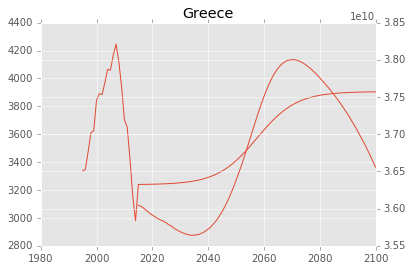

In [197]:
keyplotter(percapita['Greece'])
plt.twinx()
keyplotter(demand['Greece'])
plt.title('Greece')

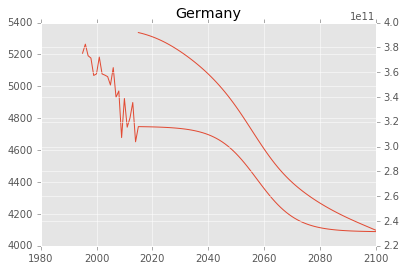

In [145]:
keyplotter(percapita['Germany'])
plt.twinx()
keyplotter(demand['Germany'])
plt.title('Germany')

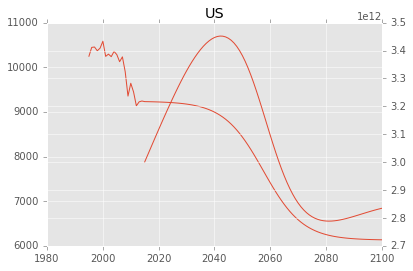

In [206]:
keyplotter(percapita['United States of America'])
plt.twinx()
keyplotter(demand['United States of America'])
plt.title('US')

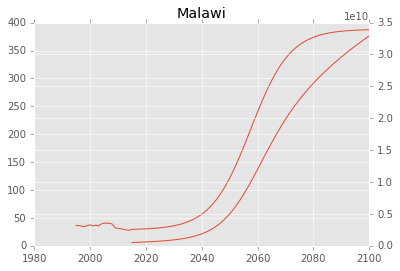

In [142]:
keyplotter(percapita['Malawi'])
plt.twinx()
keyplotter(demand['Malawi'])
plt.title('Malawi')

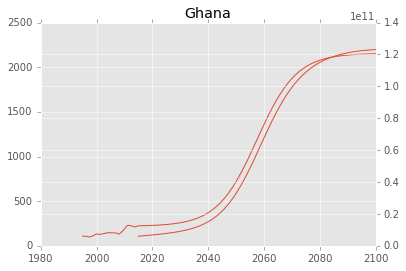

In [143]:
keyplotter(percapita['Ghana'])
plt.twinx()
keyplotter(demand['Ghana'])
plt.title('Ghana')

## Trade history

### prepare

In [22]:
print 22/(4231.0/165)
print 22/(4231.0/204)
print 204.0/165

0.857953202553
1.06074214134
1.23636363636


In [28]:
(3954*(1-0.305))/2000.0

1.3740150000000002

In [30]:
0.85/1.37

0.6204379562043795

In [26]:
2000*1.305

2610.0

In [135]:
cc=pd.read_excel(pop_path+'Country Code and Name ISO2 ISO3.xls')
#http://unstats.un.org/unsd/tradekb/Attachment321.aspx?AttachmentType=1

In [136]:
ccs=cc['Country Code'].values

In [186]:
trade_avail=pd.read_excel(pop_path+'/trade/trade_avail.xlsx',sheetname='Sheet1')
for i in range(2,14):
    trade_avail=pd.concat([trade_avail,pd.read_excel(pop_path+'/trade/trade_avail.xlsx',sheetname='Sheet'+str(i))])

In [378]:
mtrade_avail=trade_avail[['Code','SITC.1']].dropna().set_index('Code')

In [379]:
trade={}
for i in mtrade_avail.T.iteritems():
    c=int(i[0])
    if c not in trade: trade[c]={}
    for k in i[1][0].split(','):
        z = k.strip()
        if z != 'ALL':
            trade[c][int(z)]={"oil":{},"gas":{},"coal":{},"electricity":{},"total":{}}

In [380]:
#save data
file(pop_path+'trade/trade_base.json','w').write(json.dumps(trade))

### parse data

In [381]:
#px=HS\ database
#ps=ALL\ time
#r=826\ reporter
#p=0\ partner
#rg=all\ trade regime
#cc=ALL\ classification code

#products:
#2701  coal, briquettes, ovoids etc, mfr from coal
#2702  lignite, agglomerated or not, excluding jet
#2703  peat (including peat litter), incl agglomrtd
#2704  coke etc of coal, lignite or peat, retort carbon
#2705  coal gas, water gas, prdcr gas etc, ex pet gs & othgs
#2706  mineral tars, including reconstituted tars
#2707  oils etc from high temp coal tar, sim aromatic etc
#2708  pitch & pitch coke from coal tar or other min tars
#2709  crude oil from petroleum and bituminous minerals
#2710  oil (not crude) from petrol & bitum mineral etc,
#2711  petroleum gases & other gaseous hydrocarbons
#2712  petroleum jelly, mineral waxes & similar products
#2713  petroleum coke, petroleum bitumen & other residues
#2714  bitumen & asphalt, natural, shale & tar sands etc.
#2715  bit mixture from nat asph, nat bit, pet bit, min tar or pt
#2716  electrical energy

#SITC1
#32 coal
#33 oil
#34 gas
#35 electricity

import time
def comtrade(year,c):
    url='http://comtrade.un.org/api/get?max=50000'+\
               '&type=C&freq=A'+\
               '&px=S1'+\
               '&ps='+str(year)+\
                '&r='+str(c)+\
                '&p=ALL'+\
                '&rg=all'+\
                '&cc=32,33,34,35,TOTAL'+\
                '&fmt=csv'

    df=pd.read_csv(url)
    df.to_csv(pop_path+'/trade/'+str(year)+'_'+str(c)+'.csv')

The cell below needs to be run iteratively, because query to the UN COMTRADE is limited to 100/hr. So after a looong while (288 countries * ~50 years -> ~14000 queries, we get all the data saved on the disk.

In [1562]:
cc.loc[k]

Country Code                      320
Country Name English        Guatemala
Country Fullname English    Guatemala
Country Abbrevation         Guatemala
Cty Comments                      NaN
ISO2-digit Alpha                   GT
ISO3-digit Alpha                  GTM
Start Valid Year                 1962
End Valid Year                   2061
Name: 121, dtype: object

In [ ]:
c=ccs[k]
errors=[472,16,20,660,10,899,58,60,74,80,86,92,
       471,129,136,162,166,184,200,212,835,890,
       837,583,530,532,175,500,585,459,461,658,
       659,666,711,796,798,876,582,592,717,810,
       890,836,260,838,
        
       233,231,97,697,492,234,238,242,246,886,
       278,866,720,
       232,226,222,818,218,221,408,262,214,588,
       
       328,332,334,336,340,348,352,699,356,360,
       364,368,
       304,308,312,320,324,624,316,300,292,288]
#837 bunkers == storage
if c not in errors:
    for year in sorted(trade[c].keys())[yearcounter:]:
        comtrade(year,c)
        time.sleep(1.5) # delays for 5 seconds
        print "success",k,c,year
        yearcounter+=1
else: print "error",k,c
k+=1
yearcounter=0

success 138 381 1962
success 138 381 1963
success 138 381 1964
success 138 381 1965
success 138 381 1966
success 138 381 1967
success 138 381 1968
success 138 381 1969
success 138 381 1970


## Country neighbor list

In [137]:
neighbors=pd.read_csv(pop_path+'contry-geotime.csv')
#https://raw.githubusercontent.com/ppKrauss/country-geotime/master/data/contry-geotime.csv

In [138]:
#country name converter from iso to comtrade and back
iso2c={}
isoc2={}
for i in cc.T.iteritems():
    iso2c[i[1][0]]=i[1][1]
    isoc2[i[1][1]]=i[1][0]

In [139]:
#country name converter from pop to iso
pop2iso={}
for i in cc.T.iteritems():
    pop2iso[cnc(i[1][1])]=int(i[1][0])

In [140]:
#country name converter from alpha 2 to iso
c2iso={}
for i in neighbors.T.iteritems():
    c2iso[str(i[1][0])]=i[1][1]
c2iso['NA']=c2iso['nan'] #adjust for namibia
c2iso.pop('nan');

In [141]:
#create country neighbor adjacency list based on iso country number codes
c2neighbors={}
for i in neighbors.T.iteritems():
    z=str(i[1][4]).split(' ')
    if (str(i[1][1])!='nan'): c2neighbors[int(i[1][1])]=[c2iso[k] for k in z if k!='nan']

## Jacobson - end-use electricity

In [142]:
jcb=pd.read_excel(pop_path+'jacobson_mini.xlsx',skiprows=4)
#http://web.stanford.edu/group/efmh/jacobson/Articles/I/AllCountries.xlsx

In [143]:
jcbdict={}
for i in jcb.T.iteritems():
    #i[1][0] country name in every odd line
    #[1][9] country percentage reduction in every even line
    if (i[0]%2==0):
        country=i[1][0]
    if (i[0]%2==1):
        try: jcbdict[pop2iso[cnc(country)]]=float(int(i[1][9]*10)/10.0)
        except: print 'No population data for',country,', skipped'

No population data for Chinese Taipei , skipped
No population data for Cote d'Ivoire , skipped
No population data for Kosovo , skipped
No population data for Netherlands Antilles , skipped


In [144]:
jcb.columns

Index([                        u'Unnamed: 0',
                               u'Unnamed: 1',
                               u'Unnamed: 2',
                          u'Residential (%)',
                           u'Commercial (%)',
                           u'Industrial (%)',
                       u'Transportation (%)',
       u'Agriculture/ forestry/ fishing (%)',
                                u'Other (%)',
                    u'Due to fuel switching',
              u'Due to efficiency  measures',
                                   u'Total '],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0D3198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000115E0160>]], dtype=object)

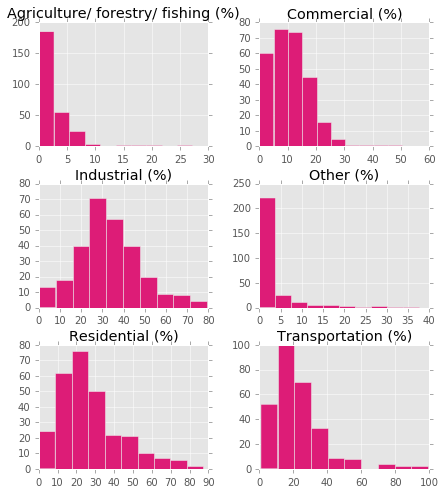

In [146]:
jcb.drop(['Unnamed: 2','Unnamed: 1','Due to fuel switching',u'Due to efficiency  measures',u'Total '],axis=1).hist(figsize=[7,8],color='#dd1c77')

In [148]:
jcb.loc[279]

Unnamed: 0                                NaN
Unnamed: 1                                WWS
Unnamed: 2                              11971
Residential (%)                       25.5218
Commercial (%)                        12.4771
Industrial (%)                         40.834
Transportation (%)                     15.822
Agriculture/ forestry/ fishing (%)    2.91297
Other (%)                             2.43211
Due to fuel switching                -31.3932
Due to efficiency  measures              -6.9
Total                                -38.2932
Name: 279, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003493CF28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003506E898>]], dtype=object)

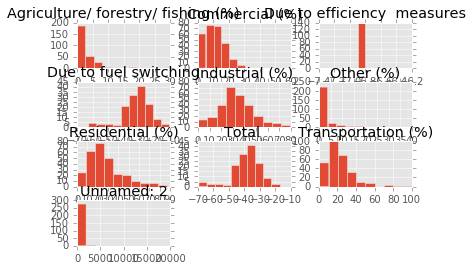

In [28]:
plt.figure(figsize=[10,4])
jcb.hist()

(array([  3.,   3.,   3.,   5.,  21.,  31.,  40.,  21.,   6.,   3.]),
 array([-61.4, -56.3, -51.2, -46.1, -41. , -35.9, -30.8, -25.7, -20.6,
        -15.5, -10.4]),
 <a list of 10 Patch objects>)

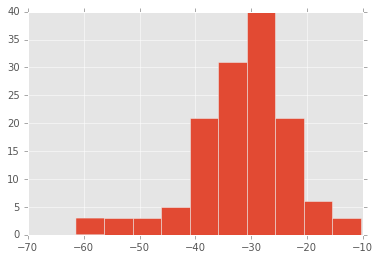

In [24]:
plt.hist(jcbdict.values())


In [207]:
#extend jcb demand predictions for all countries using data from neighbors,
#or world average if neighbors not available
#then update the target percapipta values
jcbdict_ext={}
hpercapita={}
for i in gpercapita.keys(): #pop names
    try:
        if pop2iso[i]==230: iso=231
        elif pop2iso[i]==699: iso=356
        elif pop2iso[i]==251: iso=250
        elif pop2iso[i]==579: iso=578
        elif pop2iso[i]==841: iso=842
        else: iso=pop2iso[i]
        #print i,iso,c2neighbors[iso]
        if iso not in jcbdict:
            h=[]
            for j in c2neighbors[iso]:
                if j in jcbdict: h.append(jcbdict[j])
            if h==[]: jcbdict_ext[iso]=jcbdict[0]
            else: jcbdict_ext[iso]=np.mean(np.array(h))
        else: jcbdict_ext[iso]=jcbdict[iso]
        
        #update percapita
        hpercapita[i]=(100/(100-jcbdict_ext[iso]))
        
    except: 
        # print 'No population data for',i,', skipping'
        hpercapita[i]=(100/(100-jcbdict_ext[0]))

## Re-estimate demand

In [215]:
demand2={}
for country in data:
    if country not in demand2: demand2[country]={}
    x=gpercapita[country]*demand_scaler(np.log10(gpercapita[country]))
    w=x*hpercapita[country]
    for year in range(2015,2101):
        m=w+(gpercapita[country]-w)*(1-scurve((year-2015)*1.0/(2100-2015)))
        demand2[country][year]=m*data[country][year]['population']

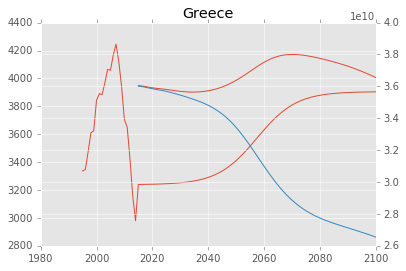

In [216]:
keyplotter(percapita['Greece'])
plt.twinx()
keyplotter(demand['Greece'])
plt.title('Greece')
keyplotter(demand2['Greece'])
plt.title('Greece')

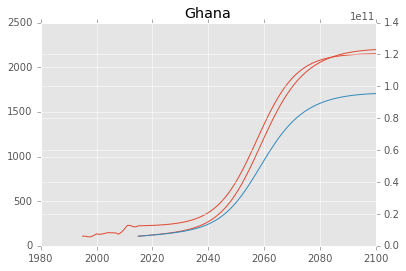

In [217]:
keyplotter(percapita['Ghana'])
plt.twinx()
keyplotter(demand['Ghana'])
plt.title('Ghana')
keyplotter(demand2['Ghana'])
plt.title('Ghana')

In [218]:
#save data
file(pop_path+'demand2.json','w').write(json.dumps(demand2))

## Read, process & convert renewable resource maps

CSP

In [13]:
solar=pd.read_excel(pop_path+'maps/nrelsolar.xlsx',sheetname='DNI')
#http://en.openei.org/doe-opendata/dataset/19316a50-e55d-45e2-b692-efcebfe16c95/resource/3e72f32a-7de1-4e5d-a25a-76928769625f/download/solarresourceenergy.xlsx
solar_res={}
solar_cf={}
for i in solar.T.iteritems():
    country=cnc(i[1][0])
    if i[0]<10: #record capacity factors
        solar_cf[i[1][9]]=i[1][10]
    if country in data:
        if country not in solar_res:solar_res[country]={}
        clas=i[1][1]
        cap=i[1][5]/1000.0 #workbook doest not import commas correctly, fix
        solar_res[country][clas]=cap

C:\Anaconda\envs\py27\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


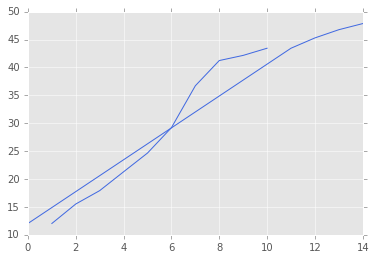

In [18]:
#extrapolate
keyplotter(solar_cf)
helper=interpolate(solar_cf,range(0,15),1,1,2,True,True)
keyplotter(helper)
solar_cf.update(helper)

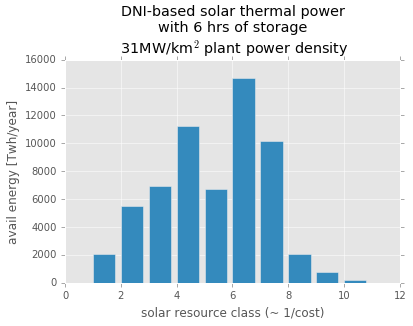

In [20]:
plt.bar(solar_res['United States of America'].keys(),solar_res['United States of America'].values())
plt.ylabel('avail energy [Twh/year]')
plt.title('DNI-based solar thermal power\nwith 6 hrs of storage\n 31MW/km$^2$ plant power density')
plt.xlabel('solar resource class (~ 1/cost)')

PV

In [22]:
solar=pd.read_excel(pop_path+'maps/nrelsolar.xlsx',sheetname='Tilt=Lat')
#http://en.openei.org/doe-opendata/dataset/19316a50-e55d-45e2-b692-efcebfe16c95/resource/3e72f32a-7de1-4e5d-a25a-76928769625f/download/solarresourceenergy.xlsx
solar_res2={}
for i in solar.T.iteritems():
    country=cnc(i[1][0])
    if country in data:
        if country not in solar_res2:solar_res2[country]={}
        clas=i[1][1]
        cap=i[1][6]
        solar_res2[country][clas]=cap

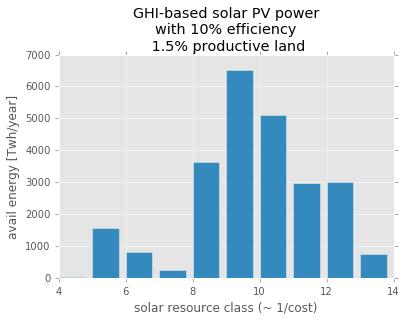

In [23]:
plt.bar(solar_res2['United States of America'].keys(),solar_res2['United States of America'].values())
plt.ylabel('avail energy [Twh/year]')
plt.title('GHI-based solar PV power\nwith 10% efficiency\n 1.5% productive land')
plt.xlabel('solar resource class (~ 1/cost)')

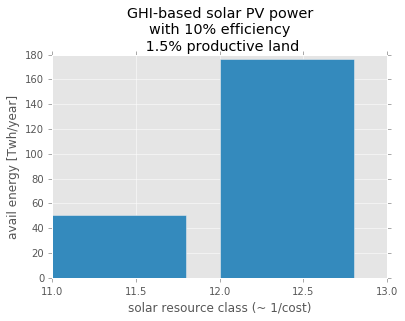

In [24]:
plt.bar(solar_res2['United Arab Emirates'].keys(),solar_res2['United Arab Emirates'].values())
plt.ylabel('avail energy [Twh/year]')
plt.title('GHI-based solar PV power\nwith 10% efficiency\n 1.5% productive land')
plt.xlabel('solar resource class (~ 1/cost)')

convert to capacities

In [25]:
solar_cap={}
for i in solar_res:
    if i not in solar_cap:solar_cap[i]={}
    for j in solar_res[i]:
        solar_cap[i][j]=solar_res[i][j]*solar_cf[j]/8760
solar_cap2={}
for i in solar_res2:
    if i not in solar_cap2:solar_cap2[i]={}
    for j in solar_res2[i]:
        solar_cap2[i][j]=solar_res2[i][j]*solar_cf[j]/8760       

wind

In [31]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Onshore Power',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_cap={}
for i in wind.T.iteritems():
    country=i[1][0]
    if country in data:
        for k in range(1,10):
            if country not in wind_cap:wind_cap[country]={}
            clas=k
            cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
            wind_cap[country][clas]=cap/1000.0 #workbook reported values in GW, we use TW

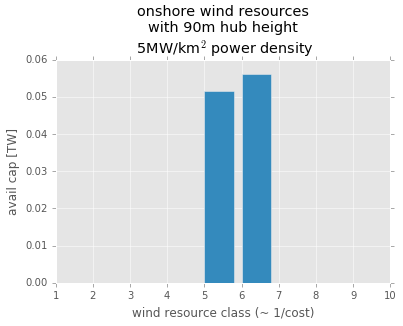

In [32]:
plt.bar(wind_cap['Denmark'].keys(),wind_cap['Denmark'].values())
plt.ylabel('avail cap [TW]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [33]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Onshore Energy',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_res={}
for i in wind.T.iteritems():
    country=i[1][0]
    if country in data:
        for k in range(1,10):
            if country not in wind_res:wind_res[country]={}
            clas=k
            cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
            wind_res[country][clas]=cap*1000.0 #workbook reported values in PWh, we use TWh

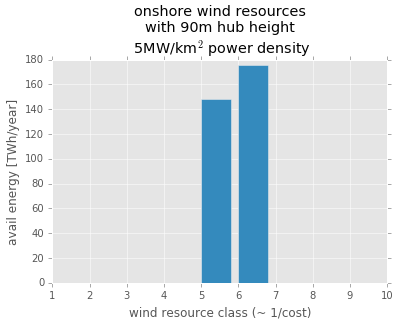

In [34]:
plt.bar(wind_res['Denmark'].keys(),wind_res['Denmark'].values())
plt.ylabel('avail energy [TWh/year]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [47]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Offshore Energy',skiprows=3)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_res2={}
country=''
for i in wind.T.iteritems():
    if str(i[1][0])!='nan':
        country=str(i[1][0])
    water=str(i[1][1])
    if water in {'shallow','transitional'}: #skip deep for now
        if country in data:
            for k in range(2,11):
                if country not in wind_res2:wind_res2[country]={}
                clas=k
                cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
                if clas not in wind_res2[country]:wind_res2[country][clas]=0
                wind_res2[country][clas]+=cap*1000.0

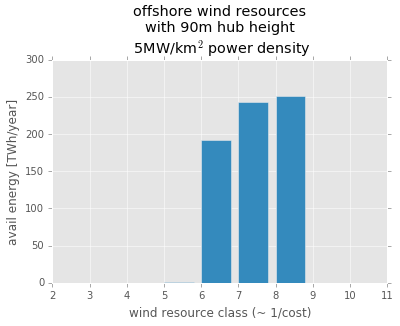

In [48]:
plt.bar(wind_res2['Denmark'].keys(),wind_res2['Denmark'].values())
plt.ylabel('avail energy [TWh/year]')
plt.title('offshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [51]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Offshore Power',skiprows=3)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_cap2={}
country=''
for i in wind.T.iteritems():
    if str(i[1][0])!='nan':
        country=str(i[1][0])
    water=str(i[1][1])
    if water in {'shallow','transitional'}: #skip deep for now
        if country in data:
            for k in range(2,11):
                if country not in wind_cap2:wind_cap2[country]={}
                clas=k
                cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
                if clas not in wind_cap2[country]:wind_cap2[country][clas]=0
                wind_cap2[country][clas]+=cap/1000.0

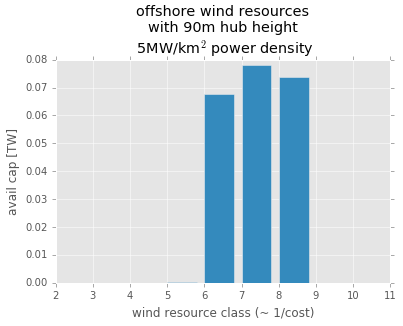

In [53]:
plt.bar(wind_cap2['Denmark'].keys(),wind_cap2['Denmark'].values())
plt.ylabel('avail cap [TW]')
plt.title('offshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

## Save resource data

In [54]:
res={}
for i in solar_res:
    if i not in res: res[i]={"wind":{"cap":{},"res":{}},"pv":{"cap":{},"res":{}},"csp":{"cap":{},"res":{}}}
    res[i]["csp"]["res"]=solar_res[i]
    res[i]["csp"]["cap"]=solar_cap[i]
    res[i]["pv"]["res"]=solar_res2[i]
    res[i]["pv"]["cap"]=solar_cap2[i]
for i in wind_res: #onshore
    if i not in res: res[i]={"wind":{"cap":{},"res":{}},"pv":{"cap":{},"res":{}},"csp":{"cap":{},"res":{}}}    
    res[i]["wind"]["res"]=wind_res[i]
    res[i]["wind"]["cap"]=wind_cap[i]
for i in wind_res2: #offshore
    if i not in res: res[i]={"wind":{"cap":{},"res":{}},"pv":{"cap":{},"res":{}},"csp":{"cap":{},"res":{}}}    
    for j in wind_res2[i]:
        if j not in res[i]["wind"]["res"]:res[i]["wind"]["res"][j]=0
        res[i]["wind"]["res"][j]+=wind_res2[i][j]
    for j in wind_cap2[i]:
        if j not in res[i]["wind"]["cap"]:res[i]["wind"]["cap"][j]=0
        res[i]["wind"]["cap"][j]+=wind_cap2[i][j]

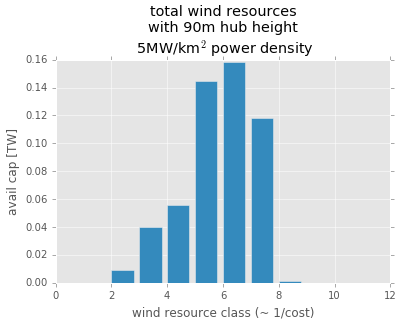

In [55]:
plt.bar(res['Norway']['wind']['cap'].keys(),res['Norway']['wind']['cap'].values())
plt.ylabel('avail cap [TW]')
plt.title('total wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [56]:
#save data
file(pop_path+'maps/res.json','w').write(json.dumps(res))

## Process trade data

Load prices from World Bank (Global Economic Monitor Commodities db)


In [104]:
#reported: coal:mt tonne-!metric tonne, not mega, gas:mmbtu- 1 MMBtu = 10^-9 quad, oil:bbl-barrels
units={'coal':mtcoe_to_TWh*1e-6,'gas':qbtu_to_TWh*1e-9,'oil':Gboe_to_TWh*1e-9}
#exected output: $/Twh

de=pd.read_csv(pop_path+'energy_prices.csv').drop(['Country Code','Series'],axis=1)
k=0
price={'coal':{},'gas':{},'oil':{}}
for i in de.T.iteritems():
    k+=1
    if k<4: commo='coal'
    elif k<5: commo='oil'
    else: commo='gas'
    for y in range(1960,2016):
        j=y-1960+2
        if ((str(i[1][j])!='0')&(str(i[1][j])!='..')&(str(i[1][j])!='nan')&(i[1][j]!=0)):
            if y not in price[commo]:price[commo][y]=[] 
            price[commo][y].append(np.round(float(i[1][j]),2))
    
    
    if k>6: break
for fuel in price:
    for y in price[fuel]:price[fuel][y]=np.mean(price[fuel][y])*1.0/units[fuel]

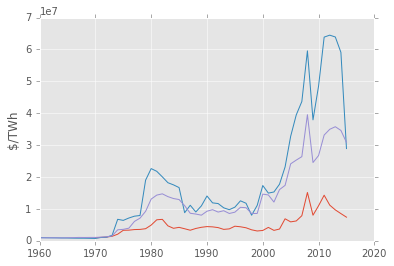

In [105]:
keyplotter(price['coal'])
keyplotter(price['oil'])
keyplotter(price['gas'])
plt.ylabel('$/TWh')

GDP energy intensity

In [106]:
gdp=pd.read_excel(pop_path+'GDP.xls',skiprows=2)
#http://unstats.un.org/unsd/snaama/downloads/Download-GDPcurrent-USD-countries.xls
#imports are in current terms, so we need also current terms here

In [107]:
gdpc={}
for i in gdp.T.iteritems():
    if (i[1][1]=='Total Value Added'):
        country=cnc(i[1][0])
        if country not in gdpc:gdpc[country]={}
        for j in range(1970,2015):
            gdpc[country][j]=i[1][j+2-1970]

In [108]:
data['Hungary'][1997]['energy']['nrg_sum']['cons']['navg3']

271.5590343459599

Electricity price (plus update for the other commodities)

In [124]:
commo2={2701:'coal',2711:'gas',2709:'oil',2716:'electricity'}
commo2multi={2701:mtcoe_to_TWh*1e-9,2711:mtge_to_TWh*1e-9,2709:mtoe_to_TWh*1e-9,2716:1e-6}
elecr=pd.read_csv(pop_path+'elecr1.csv')
for i in range(2,7):
    elecr=pd.concat([elecr,pd.read_csv(pop_path+'elecr'+str(i)+'.csv')])
elecr=elecr.drop(['Classification','Period','Period Desc.','Aggregate Level','Is Leaf Code',\
          'Trade Flow Code','Reporter','Reporter ISO','Partner','Partner ISO','2nd Partner Code',\
          '2nd Partner','2nd Partner ISO','Customs Proc. Code','Customs','Mode of Transport Code',\
          'Mode of Transport','Commodity','Qty Unit Code','Alt Qty Unit Code','Alt Qty',
           'Gross weight (kg)','CIF Trade Value (US$)','FOB Trade Value (US$)','Flag'],axis=1)

In [125]:
elecr.head()

Year Trade Flow  Reporter Code  Partner Code  Commodity Code  \
0  2011     Import              8             0            2701   
1  2011     Export              8             0            2701   
2  2011     Import             12             0            2701   
3  2011     Import             20             0            2701   
4  2011     Import             28             0            2701   

              Qty Unit  Qty  Alt Qty Unit  Netweight (kg)  Trade Value (US$)  
0  Weight in kilograms  NaN    90683379.0      90683379.0           14281636  
1  Weight in kilograms  NaN       38360.0         38360.0              17152  
2  Weight in kilograms  NaN     1954760.0       1954760.0             873661  
3  Weight in kilograms  NaN          57.0            57.0                296  
4  Weight in kilograms  NaN         740.0           740.0               1474

In [126]:
cprice={}
for i in elecr.T.iteritems():
    country=i[1][2]
    if country not in cprice:cprice[country]={'Import':{},'Export':{},'Re-Export':{},'Re-Import':{}}
    fuel=commo2[i[1][4]]
    flow=i[1][1]
    #if flow not in {'Re-Export','Re-Import'}:
    if True:
        if fuel not in cprice[country][flow]:cprice[country][flow][fuel]={}
        time=i[1][0]
        if ((i[1][7]!=0)&(i[1][9]!=0)):
            value=(i[1][9]/i[1][7])*1.0/commo2multi[i[1][4]]
            if (~(np.isnan(value)) and (value!=0)):
                cprice[country][flow][fuel][time]=value

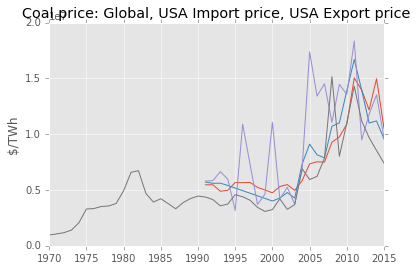

In [127]:
keyplotter(cprice[842]['Import']['coal'])
keyplotter(cprice[842]['Export']['coal'])
keyplotter(cprice[842]['Re-Export']['coal'])
keyplotter(price['coal'])
plt.title('Coal price: Global, USA Import price, USA Export price')
plt.ylabel('$/TWh')
plt.show()

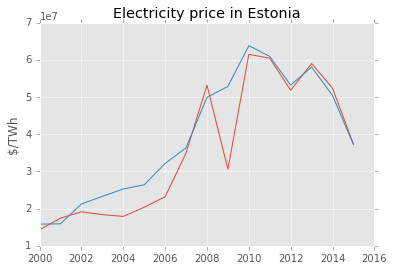

In [128]:
keyplotter(cprice[233]['Import']['electricity'])
keyplotter(cprice[233]['Export']['electricity'])
plt.title('Electricity price in '+iso2c[233])
plt.ylabel('$/TWh')

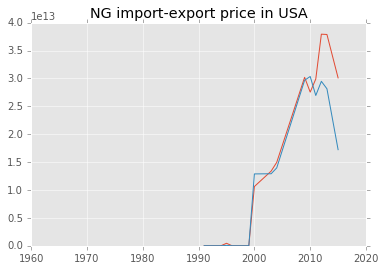

In [129]:
keyplotter(cprice[842]['Import']['gas'])
keyplotter(cprice[842]['Export']['gas'])
keyplotter(price['gas'])
plt.title('NG import-export price in '+iso2c[842])

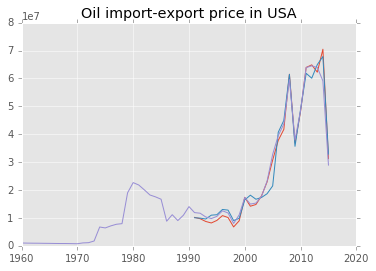

In [130]:
keyplotter(cprice[842]['Import']['oil'])
keyplotter(cprice[842]['Export']['oil'])
keyplotter(price['oil'])
plt.title('Oil import-export price in '+iso2c[842])

## Fill up trade

In [131]:
#extend trade to include both import and export
for c in trade:
    for y in trade[c]:
        for f in trade[c][y]:
            trade[c][y][f]={'Import':{},'Export':{},'Re-Export':{},'Re-Import':{}}
tradealpha={}

In [395]:
commo={'32':'coal','34':'gas','33':'oil','35':'electricity','TOTAL':'total'}
oflow={"Import":"Export","Export":"Import","Re-Import":"Import","Re-Export":"Export"}

In [396]:
#load corresponding csv file

def trader(yy,cc):
#yy=year
#cc=c
#if True:
    
    global trade
    global tradealpha
    
    df=pd.read_csv(pop_path+'/trade/'+str(yy)+'_'+str(cc)+'.csv')\
        .drop(['Unnamed: 0','Classification','Period','Period Desc.','Aggregate Level','Is Leaf Code',\
              'Trade Flow Code','Reporter','Reporter ISO','Partner','Partner ISO','2nd Partner Code',\
              '2nd Partner','2nd Partner ISO','Customs Proc. Code','Customs','Mode of Transport Code',\
              'Mode of Transport','Commodity','Qty Unit Code','Alt Qty Unit Code','Alt Qty Unit','Alt Qty',
               'Gross weight (kg)','CIF Trade Value (US$)','FOB Trade Value (US$)','Flag'],axis=1)
    #the key in the trade part is to convert the reported monetary values to energy values
    for i in df.T.iteritems():
        if not np.isnan(i[1][0]):
            year=int(float(i[1][0]))
            flow=i[1][1]
            reporter=i[1][2]
            partner=i[1][3]
            #only commodities of interest
            if i[1][4] in commo:
                fuel=commo[i[1][4]]
                #don't include aggregate trade data
                if (partner!=0):
                    #Re-Exports and Re-Imports excluded this time
                    #not anymore
                    if flow in oflow:
                        otherflow=oflow[flow]
                        #treat non-energy (total minus energy) good separately, after energy has been processed
                        if (fuel!='total'):
                            #check if we have localized price information
                            found=False
                            if reporter in cprice:
                                #if any price information is there for any trade flow
                                if ((flow in cprice[reporter]) or (otherflow in cprice[reporter])):
                                    #for the particular fuel
                                    if fuel in cprice[reporter][flow]:
                                        #for the particular year
                                        if year in cprice[reporter][flow][fuel]:
                                            p=cprice[reporter][flow][fuel][year]
                                            source='8'
                                            found=True
                                        #if not for this year, check other flow
                                        elif otherflow in cprice[reporter]:
                                            if fuel in cprice[reporter][otherflow]:
                                                if year in cprice[reporter][otherflow][fuel]:
                                                    p=cprice[reporter][otherflow][fuel][year]
                                                    source='7' 
                                                    found=True
                                        if found: 
                                            found=False
                                            pass
                                        #if neither import or export price data, interpolate, but check global data for backup
                                        else:
                                            helper=interpolate(cprice[reporter][flow][fuel],[year],1,2,1)
                                            empty=False
                                            if year in helper:
                                                p=helper[year]
                                            else: empty=True
                                            #check if fuel in global data
                                            if fuel in price:
                                                #for the particular year
                                                if year in price[fuel]:
                                                    p2=price[fuel][year]
                                                #otherwise interpolate
                                                else:
                                                    helper2=interpolate(price[fuel],[year],1,2,1)
                                                    p2=helper2[year]

                                                if empty: 
                                                    p =p2
                                                    source='9'
                                                else:
                                                    #set tolernace from interpolated local price
                                                    tol=3
                                                    #take average of local and global if within tolerance
                                                    if ((p2/p<tol) and (p2/p>(1/tol))):
                                                        p=(p+p2)/2.0
                                                        source='5'
                                                    #only take global otherwise
                                                    else: 
                                                        p=p2
                                                        source='4'
                                            else: source='6'
                                    elif fuel in cprice[reporter][otherflow]:
                                        if year in cprice[reporter][otherflow][fuel]:
                                            p=cprice[reporter][otherflow][fuel][year]
                                            source='3'
                                            found=True

                            #if no local data, just use global average
                            if found: pass
                            elif fuel in price:
                                #for the particular year
                                if year in price[fuel]:
                                    p=price[fuel][year]
                                    source='2'
                                #otherwise interpolate
                                else:
                                    helper=interpolate(price[fuel],[year],1,2,1)
                                    p=helper[year]
                                    source='1'

                            else: pass #print 'no price data',year,reporter,fuel

                            energy=i[1][8]*1.0/p

                            #save numerical trade value
                            trade[reporter][year][fuel][flow][partner]=energy

                            #savecountry equivalency trade value (equating areas such as GDR and Germany)
                            country=cnc(iso2c[cc])
                            if country not in tradealpha: tradealpha[country]={}
                            if year not in tradealpha[country]: tradealpha[country][year]={}
                            if fuel not in tradealpha[country][year]:tradealpha[country][year][fuel]={}
                            if flow not in tradealpha[country][year][fuel]:tradealpha[country][year][fuel][flow]={}
                            if partner not in tradealpha[country][year][fuel][flow]:tradealpha[country][year][fuel][flow][partner]=[]
                            tradealpha[country][year][fuel][flow][partner].append(energy)


In [ ]:
while k<len(ccs):
    c=ccs[k]
    #if cnc(iso2c[c]) in testcountries:
    if True:
        print cnc(iso2c[c]),c,'started',
        if c in trade:
            for year in sorted(trade[c].keys())[yearcounter:]:
                #try:
                    trader(year,c)
                #except: print "error, k:",k,'c:',c,'country:',iso2c[c],'yrcounter:',yearcounter,'yr:',year
            print 'finished'
        else:
            print 'no trade data'
    k+=1
    yearcounter=0    

In [2591]:
k=0
yearcounter=0

In [1003]:
print k,yearcounter

0 0


In [2596]:
#save
file('E:/Dropbox/Public/datarepo/Set/db/trade/trade.json','w').write(json.dumps(trade)) 
file('E:/Dropbox/Public/datarepo/Set/db/trade/tradea.json','w').write(json.dumps(tradealpha)) 

In [135]:
#load
trade=json.loads(file('E:/Dropbox/Public/datarepo/Set/db/trade/trade.json','r').read())
tradealpha=json.loads(file('E:/Dropbox/Public/datarepo/Set/db/trade/tradea.json','r').read())

In [397]:
#load data - if already saved
predata=json.loads(file('E:/Dropbox/Public/datarepo/Set/db/trade/trade.json','r').read())
trade={}
for c in predata:
    trade[int(c)]=predata[c]
predata={}

## New Save function

renormalize trade alpha

In [ ]:
#we appended values of the same country, with diff codes, such as US 841 (pre 1980) and US 842 under the same key in tradealpha
#now we take the averages of these flows - although in theory, there should be no overlap
for country in tradealpha:
    for year in tradealpha[country]:
        for fuel in tradealpha[country][year]:
            for flow in tradealpha[country][year][fuel]:
                for partner in tradealpha[country][year][fuel][flow]:
                    tradealpha[country][year][fuel][flow][partner]=\
                        np.nanmean(tradealpha[country][year][fuel][flow][partner])

In [2598]:
#save
file('E:/Dropbox/Public/datarepo/Set/db/trade/tradeb.json','w').write(json.dumps(tradealpha)) 

In [399]:
#load
predata=json.loads(file('E:/Dropbox/Public/datarepo/Set/db/trade/tradeb.json','r').read())
tradealpha={}
for c in predata:
    if c not in tradealpha:tradealpha[c]={}
    for y in predata[c]:
        tradealpha[c][int(y)]=predata[c][y]
predata={}

In [36]:
#extend iso codes not yet encountered
iso2c[729]="Sudan"
iso2c[531]="Curacao"
iso2c[535]="Bonaire, Sint Eustatius and Saba"
iso2c[728]="South Sudan"
iso2c[534]="Sint Maarten (Dutch part)"
iso2c[652]="Saint Barthélemy"

In [401]:
def save2(verbose=False,test=False):
#if True:
    try:
        import zlib
        compression = zipfile.ZIP_DEFLATED
    except:
        compression = zipfile.ZIP_STORED
    popsave={}
    countries=[]
    isocountries={}
    c=sorted(data.keys())
    if test: c=testcountries
    for country in c:
        if verbose: print country,'started',
        popdummy={}
        tosave=[]
        for year in data[country]:
            popdummy[year]=data[country][year]['population']
            for fuel in data[country][year]['energy']:
            #for fuel in allfuels:
                if fuel not in {'nrg','nrg_sum'}:
                    tosave.append({"t":year,"u":fuel,"g":"f","q1":"pp","q2":999,
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['prod']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['prod']['navg3']))) else \
                               data[country][year]['energy'][fuel]['prod']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['prod'] else 0,3)
                               })
                    tosave.append({"t":year,"u":fuel,"g":"m","q1":"cc","q2":999,
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['cons']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['cons']['navg3']))) else \
                               data[country][year]['energy'][fuel]['cons']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['cons'] else 0,3)
                              })
        
        #no import export flows on global
        if country not in {"World"}:
            flowg={"Import":"f","Export":"m","Re-Export":"m","Re-Import":"f"}
            if country in tradealpha:
                for year in tradealpha[country]:
                    for fuel in tradealpha[country][year]:
                        for flow in tradealpha[country][year][fuel]:
                            for partner in tradealpha[country][year][fuel][flow]:
                                if partner not in isocountries:
                                    isocountries[partner]=cnc(iso2c[int(float(partner))])
                                tosave.append({"t":int(float(year)),"u":fuel,"g":flowg[flow],"q1":flow,"q2":partner,
                                           "s":round(tradealpha[country][year][fuel][flow][partner],3)
                                           })

        
        #save countries
        popsave[country]=popdummy
        file('E:/Dropbox/Public/datarepo/Set/json/pop.json','w').write(json.dumps(popsave)) 
        
        countries.append(country)
        file('E:/Dropbox/Public/datarepo/Set/json/data.json','w').write(json.dumps(tosave)) 
        zf = zipfile.ZipFile('E:/Dropbox/Public/datarepo/Set/json/'+str(country.encode('utf-8').replace('/','&&'))+'.zip', mode='w')
        zf.write('E:/Dropbox/Public/datarepo/Set/json/data.json','data.json',compress_type=compression)
        zf.close()
        if verbose: print 'finished'
        
    #save all countries list
    file('E:/Dropbox/Public/datarepo/Set/json/countries.json','w').write(json.dumps(countries)) 
    
    #save all trade countries dictionary
    file('E:/Dropbox/Public/datarepo/Set/json/isocountries.json','w').write(json.dumps(isocountries))     

In [55]:
save2()

## Transition

In [129]:
#Load remaining fossil production for 2C
mcgek=pd.read_excel(pop_path+'mcgek.xlsx',skiprows=5)

In [130]:
mcgek

Country or region  Billions of barrels  \
0   FSU, the former Soviet Union countries; CSA, C...                  NaN   
1                                              Africa                 23.0   
2                                              Canada                 39.0   
3                                     China and India                  9.0   
4                                                 FSU                 27.0   
5                                                 CSA                 58.0   
6                                              Europe                  5.0   
7                                         Middle East                263.0   
8                                        OECD Pacific                  2.1   
9                                                 ODA                  2.0   
10                           United States of America                  2.8   
11                                             Global                431.0   

       %  Trillions of cubic metres   %.1     Gt   %.2  Billions of barrels.1  \
0    NaN                        NaN   NaN    NaN   NaN                    NaN   
1   0.21                        4.4  0.33   28.0  0.85                   28.0   
2   0.74                        0.3  0.24    5.0  0.75                   40.0   
3   0.25                        2.9  0.63  180.0  0.66                    9.0   
4   0.18                       31.0  0.50  203.0  0.94                   28.0   
5   0.39                        4.8  0.53    8.0  0.51                   63.0   
6   0.20                        0.6  0.11   65.0  0.78                    5.3   
7   0.38                       46.0  0.61    3.4  0.99                  264.0   
8   0.37                        2.2  0.56   83.0  0.93                    2.7   
9   0.09                        2.2  0.24   10.0  0.34                    2.8   
10  0.06                        0.3  0.04  235.0  0.92                    4.6   
11  0.33                       95.0  0.49  819.0  0.82                  449.0   

     %.3  Trillions of cubic metres.1   %.4   Gt.1   %.5  
0    NaN                          NaN   NaN    NaN   NaN  
1   0.26                          4.4  0.34   30.0  0.90  
2   0.75                          0.3  0.24    5.4  0.82  
3   0.25                          2.5  0.53  207.0  0.77  
4   0.19                         36.0  0.59  209.0  0.97  
5   0.42                          5.0  0.56   11.0  0.73  
6   0.21                          0.3  0.06   74.0  0.89  
7   0.38                         47.0  0.61    3.4  0.99  
8   0.46                          2.0  0.51   85.0  0.95  
9   0.12                          2.1  0.22   17.0  0.60  
10  0.09                          0.5  0.06  245.0  0.95  
11  0.35                        100.0  0.52  887.0  0.88

In [131]:
oilprodcurrent={}
x=[]
y=[]
for c in data:
    #no need for aggregate regions
    if c not in {"World","Northern America","Africa",'Latin America and the Caribbean','Europe'}:
        d=data[c][2015]['energy']['oil']['prod']['navg3']
        if d>1000:
            oilprodcurrent[c]=d
            x.append(c)
            y.append(d)

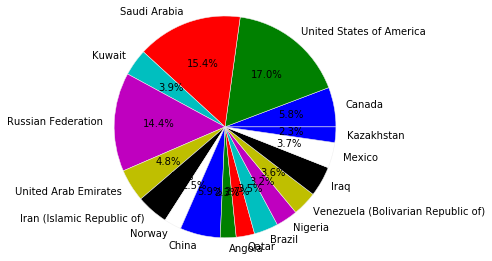

In [405]:
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Process regions distributions

In [15]:
region=pd.read_excel(pop_path+'regions.xlsx').set_index('Country')

In [122]:
#create region sums for each fossil fuel type
regions={}
for i in range(1,11):regions[i]={"oil":{},"coal":{},"gas":{}}
for c in sorted(data.keys()):
    if c not in {"World","Northern America","Africa",'Latin America and the Caribbean','Europe'}:
        for fuel in {"oil","coal","gas"}:
            if subgetter(c,fuel,'navg3','res')['y']!=[]:
                regions[region.loc[c][0]][fuel][c]=subgetter(c,fuel,'navg3','res')['y'][-1]

In [123]:
regions[8]['oil']

{u'Australia': 1942.4426,
 u'Japan': 71.836184,
 u'New Zealand': 109.41503999999999,
 u'Republic of Korea': 0.0}

In [124]:
#sum regions
for r in regions:
    for fuel in regions[r]:
        regions[r][fuel]['sum']=np.sum(regions[r][fuel].values())

In [125]:
#normalize region distributions
for r in regions:
    for fuel in regions[r]:
        for c in regions[r][fuel]:
            if (c!='sum'):
                regions[r][fuel][c]/=regions[r][fuel]['sum']

In [126]:
regions[8]['oil']

{u'Australia': 0.91465284592737983,
 u'Japan': 0.033826054955839062,
 u'New Zealand': 0.051521099116781155,
 u'Republic of Korea': 0.0,
 'sum': 2123.6938239999999}

In [127]:
#adjustments based on 2100 predictions of the global SET model vs. mcgek 2050
#also, we take the 990GtCO2 66% case in contrast to the 1100GtCO2 50%.
ei={"oil":0.242,"gas":0.198,"coal":0.33}
adj={"oil":474/337.0/(ei["oil"]/np.mean(ei.values())),
     "gas":294/201.1/(ei["gas"]/np.mean(ei.values())),
     "coal":624/430.0/(ei["coal"]/np.mean(ei.values()))}

In [132]:
#refill region total from mcgek
units={"oil":Gboe_to_TWh,"gas":tcm_to_TWh,"coal":mtcoe_to_TWh*1000}
for i in mcgek.T.iteritems():
    r=i[0]
    if (0<r<11):
        regions[r]['oil']['sum2']=i[1][1]*units['oil']*(1-i[1][2])/i[1][2]*adj["oil"]
        regions[r]['gas']['sum2']=i[1][3]*units['gas']*(1-i[1][4])/i[1][4]*adj["gas"]
        regions[r]['coal']['sum2']=i[1][5]*units['coal']*(1-i[1][6])/i[1][6]*adj["coal"]

In [133]:
#refill distributions based on new numbers
for r in regions:
    for fuel in regions[r]:
        for c in regions[r][fuel]:
            if (c not in {'sum','sum2'}):
                regions[r][fuel][c]*=regions[r][fuel]['sum2']

In [134]:
regions[8]['oil']

{u'Australia': 7943.7342315774695,
 u'Japan': 293.7783355383051,
 u'New Zealand': 447.45929619614907,
 u'Republic of Korea': 0.0,
 'sum': 2123.6938239999999,
 'sum2': 8684.9718633119228}

In [135]:
#save reserves
reserves={"oil":{},"coal":{},"gas":{}}
for r in regions:
    for fuel in regions[r]:
        for c in regions[r][fuel]:
            if (c not in {'sum','sum2'}):
                if regions[r][fuel][c]>0:
                    reserves[fuel][c]=regions[r][fuel][c]

In [496]:
#see distribution of current producers

## Hubbert curve generator

In [540]:
#reload data - if already saved
predata=json.loads(file(pop_path+'savedata2.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}

In [541]:
def hubbert(country,fuel,full=False,ur=2,tpeak=2020,db='navg3',flow='prod'):
    m=subgetter(country,fuel,db,flow)
    n={}
    for i in range(len(m['x'])):
        n[m['x'][i]]=max(0,m['y'][i])

    #super long-term
    o=interpolate(n,range(2012,tpeak),2,3,1,True,True)
    p=interpolate(o,range(tpeak-3,tpeak+1),1,1,1,False,True)
    o.update(p)

    x=np.arange(tpeak+1,2101)
    #define Hubbert curve
    def hubbert1(x,peak,tpeak,urr):
        return 2*peak/(1+np.cosh((x-tpeak)*4*peak/urr))
    def hubbert2(x,peak,tpeak,urr):
        return 2*peak/(1+np.cosh((x-tpeak)*8*peak/urr))

    if tpeak in o: peak=o[tpeak]
    else: peak=n[tpeak]
    if (ur==1): urr=subgetter(country,fuel,db,'res')['y'][-1]
    else: urr=reserves[fuel][country]
    if full: y=hubbert1(x,peak,tpeak,urr)
    else: y=hubbert2(x,peak,tpeak,urr)

    ret={x[i]:y[i] for i in range(len(x))}
    ret.update(o)
        
    return ret

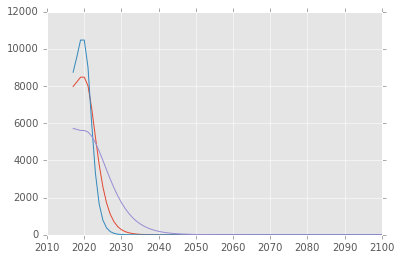

In [542]:
keyplotter(hubbert('United States of America','gas'))
keyplotter(hubbert('United States of America','oil'))
keyplotter(hubbert('United States of America','coal'))

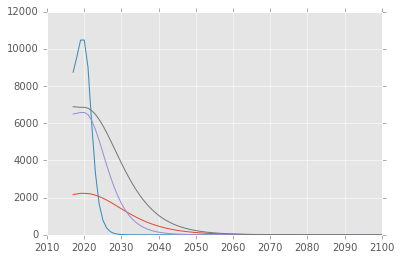

In [543]:
keyplotter(hubbert('United Arab Emirates','oil'))
keyplotter(hubbert('United States of America','oil'))
keyplotter(hubbert('Russian Federation','oil'))
keyplotter(hubbert('Saudi Arabia','oil'))

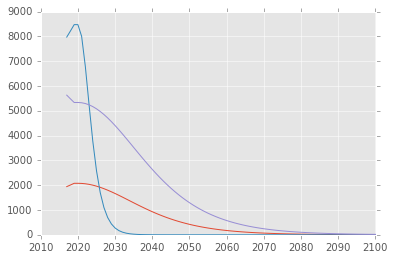

In [544]:
keyplotter(hubbert('Qatar','gas'))
keyplotter(hubbert('United States of America','gas'))
keyplotter(hubbert('Russian Federation','gas'))

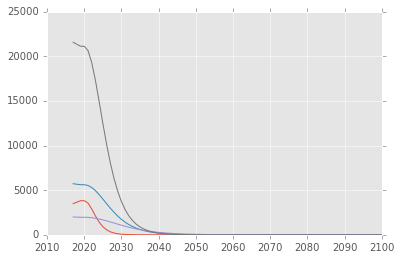

In [545]:
keyplotter(hubbert('Australia','coal'))
keyplotter(hubbert('United States of America','coal'))
keyplotter(hubbert('Russian Federation','coal'))
keyplotter(hubbert('China','coal'))

## update data

assume static fossil trade network, cast forward current partners into the future

production

In [546]:
for c in data.keys():
    for fuel in {'oil','coal','gas'}:
        if c in reserves[fuel]:
            if reserves[fuel][c]>1:
                x=hubbert(c,fuel)
                for i in x:
                    data[c][i]['energy'][fuel]['prod']['navg3']=x[i]

In [547]:
#save data
file(pop_path+'savedata3.json','w').write(json.dumps(data))

In [548]:
#load savedata3
predata=json.loads(file(pop_path+'savedata3.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}

In [549]:
#load
predata=json.loads(file('E:/Dropbox/Public/datarepo/Set/db/trade/tradeb.json','r').read())
tradealpha={}
for c in predata:
    if c not in tradealpha:tradealpha[c]={}
    for y in predata[c]:
        tradealpha[c][int(y)]=predata[c][y]
predata={}

In [550]:
lyear={}
for country in tradealpha:
    keylist=[int(float(i)) for i in tradealpha[country].keys()]
    lyear[country]=int(max(keylist))
lyear['Greece']

2015

trade and consumption

In [551]:
for country in data.keys():
    if country in tradealpha:
        #it is critical to run this only once after presetting the tradealpha, otherwise it will get messed up
        latestyear=lyear[country]
        for fuel in tradealpha[country][latestyear]:
            if fuel not in {'electricity'}:
                for flow in tradealpha[country][latestyear][fuel]:
                    for y in range(latestyear+1,2101):
                        for i in tradealpha[country][latestyear][fuel][flow]:
                            
                            #shrink exports proportionally with production data
                            if (flow in {'Export','Re-Export'}):
                                partner=country
                            #shrink imports proportionally with source production data
                            elif (flow in {'Import','Re-Import'}):
                                partner=cnc(iso2c[int(float(i))])
                            
                            #initialize
                            if y not in tradealpha[country]:
                                tradealpha[country][y]={}
                            if fuel not in tradealpha[country][y]:
                                tradealpha[country][y][fuel]={}
                            if flow not in tradealpha[country][y][fuel]:
                                tradealpha[country][y][fuel][flow]={}
                                
                            #update
                            nope=False
                            if partner in data:
                                if data[partner][latestyear]['energy'][fuel]['prod']['navg3']>0:
                                    scaler=data[partner][y]['energy'][fuel]['prod']['navg3']*1.0/\
                                        data[partner][latestyear]['energy'][fuel]['prod']['navg3']
                                else: scaler=0
                                    
                                if np.isnan(scaler): nope=True
                                elif data[partner][latestyear]['energy'][fuel]['prod']['navg3']>0:
                                    
                                    #process
                                    tradealpha[country][y][fuel][flow][i]=\
                                    tradealpha[country][latestyear][fuel][flow][i]*scaler
                                    
                                else: nope=True
                            else: nope=True 
                            if nope: tradealpha[country][y][fuel][flow][i]=0
            
                #update consumption - to match the remaining balance
                for y in range(latestyear+1,2101):
                    if 'Import' in tradealpha[country][y][fuel]: 
                        f1=sum(tradealpha[country][y][fuel]['Import'].values())
                    else: f1=0
                    if 'Re-Import' in tradealpha[country][y][fuel]: 
                        f2=sum(tradealpha[country][y][fuel]['Re-Import'].values())
                    else: f2=0
                    if 'Export' in tradealpha[country][y][fuel]: 
                        f3=sum(tradealpha[country][y][fuel]['Export'].values())
                    else: f3=0
                    if 'Re-Export' in tradealpha[country][y][fuel]: 
                        f4=sum(tradealpha[country][y][fuel]['Re-Export'].values())
                    else: f4=0
                    data[country][y]['energy'][fuel]['cons']['navg3']=\
                    data[country][y]['energy'][fuel]['prod']['navg3']+\
                    f1+f2-f3-f4

In [552]:
#save
file('E:/Dropbox/Public/datarepo/Set/db/trade/traded.json','w').write(json.dumps(tradealpha)) 
file('E:/Dropbox/Public/datarepo/Set/db/savedata4.json','w').write(json.dumps(data)) 

In [149]:
#resave
save2() #for verbose set first attr to True

In [979]:
import copy
tradecopy=copy.deepcopy(tradealpha)
tradecutoff=0.01

In [980]:
#cleanup, where we only save values above a threshold
for c in tradecopy:
    for y in tradecopy[c]:
        for fuel in tradecopy[c][y]:
            for flow in tradecopy[c][y][fuel]:
                for i in tradecopy[c][y][fuel][flow]:
                    if tradecopy[c][y][fuel][flow][i]<tradecutoff:
                        tradealpha[c][y][fuel][flow].pop(i)

In [967]:
file('E:/Dropbox/Public/datarepo/Set/db/smalltrade.json','w').write(json.dumps(tradealpha)) 

## Renewable gap estimation

In [968]:
#load savedata4
predata=json.loads(file(pop_path+'savedata4.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}

In [167]:
#load tradealpha d
predata=json.loads(file(pop_path+'/trade/traded.json','r').read())
tradealpha={}
for c in predata:
    tradealpha[c]={}
    for year in predata[c]:
        tradealpha[c][int(year)]=predata[c][year]
predata={}

### CSP

In [553]:
#introduce csp data
#http://www.irena.org/DocumentDownloads/Publications/RE_Technologies_Cost_Analysis-CSP.pdf
#http://www.ren21.net/wp-content/uploads/2015/07/REN12-GSR2015_Onlinebook_low1.pdf

In [969]:
#spain total 2300MW, with cf0.2 that's 4.0296TWh
c='Spain'
start=2007
end=2014
allocate=2300*8760*0.2/1e6
f=0
fs=[]
for i in range(end-start):
    f+=i**2/6.0
    fs.append(i**2/6.0)
allocator=np.array(fs)/f
allocator/=allocator[-1]
for i in range(start,end):
    v=allocate*allocator[i-start]
    data[c][i]['energy']['csp']={'prod':{'navg3':v},'cons':{'navg3':v}}
    data[c][i]['energy']['solar']['prod']['navg3']-=v
    data[c][i]['energy']['solar']['cons']['navg3']-=v
l=allocator[-1]
if end<2016:
    for i in range(end,2016):
        v=allocate*l
        data[c][i]['energy']['csp']={'prod':{'navg3':v},'cons':{'navg3':v}}
        data[c][i]['energy']['solar']['prod']['navg3']-=v
        data[c][i]['energy']['solar']['cons']['navg3']-=v

In [970]:
c='United States of America'
start=2007
end=2015
allocate=1634*8760*0.2/1e6
f=0
fs=[]
for i in range(end-start):
    f+=i**2/6.0
    fs.append(i**2/6.0)
allocator=np.array(fs)/f
allocator/=allocator[-1]
for i in range(start,end):
    v=allocate*allocator[i-start]
    data[c][i]['energy']['csp']={'prod':{'navg3':v},'cons':{'navg3':v}}
    data[c][i]['energy']['solar']['prod']['navg3']-=v
    data[c][i]['energy']['solar']['cons']['navg3']-=v
l=allocator[-1]
if end<2016:
    for i in range(end,2016):
        v=allocate*l
        data[c][i]['energy']['csp']={'prod':{'navg3':v},'cons':{'navg3':v}}
        data[c][i]['energy']['solar']['prod']['navg3']-=v
        data[c][i]['energy']['solar']['cons']['navg3']-=v

In [971]:
c='India'
start=2012
end=2015
allocate=225*8760*0.2/1e6
f=0
fs=[]
for i in range(end-start):
    f+=i**2/6.0
    fs.append(i**2/6.0)
allocator=np.array(fs)/f
allocator/=allocator[-1]
for i in range(start,end):
    v=allocate*allocator[i-start]
    data[c][i]['energy']['csp']={'prod':{'navg3':v},'cons':{'navg3':v}}
    data[c][i]['energy']['solar']['prod']['navg3']-=v
    data[c][i]['energy']['solar']['cons']['navg3']-=v
l=allocator[-1]
if end<2016:
    for i in range(end,2016):
        v=allocate*l
        data[c][i]['energy']['csp']={'prod':{'navg3':v},'cons':{'navg3':v}}
        data[c][i]['energy']['solar']['prod']['navg3']-=v
        data[c][i]['energy']['solar']['cons']['navg3']-=v

In [972]:
c='United Arab Emirates'
start=2012
end=2014
allocate=1634*8760*0.2/1e6
f=0
fs=[]
for i in range(end-start):
    f+=i**2/6.0
    fs.append(i**2/6.0)
allocator=np.array(fs)/f
allocator/=allocator[-1]
for i in range(start,end):
    v=allocate*allocator[i-start]
    data[c][i]['energy']['csp']={'prod':{'navg3':v},'cons':{'navg3':v}}
    data[c][i]['energy']['solar']['prod']['navg3']-=v
    data[c][i]['energy']['solar']['cons']['navg3']-=v
l=allocator[-1]
if end<2016:
    for i in range(end,2016):
        v=allocate*l
        data[c][i]['energy']['csp']={'prod':{'navg3':v},'cons':{'navg3':v}}
        data[c][i]['energy']['solar']['prod']['navg3']-=v
        data[c][i]['energy']['solar']['cons']['navg3']-=v

Cast forward existing

In [973]:
for c in data:
    for f in ['csp','solar','wind','hydro','nuclear','biofuels','geo_other']:
        start=0
        if f in data[c][2012]['energy']: start=2012
        if f in data[c][2013]['energy']: start=2013
        if f in data[c][2014]['energy']: start=2014
        if f in data[c][2015]['energy']: start=2015
        if start>0:
            v=data[c][start]['energy'][f]['prod']['navg3']
            for i in range(start,2101):
                data[c][i]['energy'][f]={'prod':{'navg3':v},'cons':{'navg3':v}}
                data[c][i]['energy'][f]['prod']['navg3']=v
                data[c][i]['energy'][f]['cons']['navg3']=v

In [562]:
#save
file('E:/Dropbox/Public/datarepo/Set/db/savedata5.json','w').write(json.dumps(data)) 

In [220]:
#load savedata4
predata=json.loads(file(pop_path+'savedata5.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}

In [560]:
save2()

## Trade vector estimations

In [164]:
#load savedata4
predata=json.loads(file(pop_path+'demand2.json','r').read())
demand2={}
for c in predata:
    demand2[c]={}
    for year in predata[c]:
        demand2[c][int(year)]=predata[c][year]
predata={}

In [218]:
def save3(test=False,verbose=False):
#if True:
    try:
        import zlib
        compression = zipfile.ZIP_DEFLATED
    except:
        compression = zipfile.ZIP_STORED
    popsave={}
    countries=[]
    isocountries={}
    c=sorted(data.keys())
    if test: c=testcountries
    for country in c:
        if verbose: print country,'started',
        popdummy={}
        tosave=[]
        for year in data[country]:
            popdummy[year]=data[country][year]['population']
            for fuel in data[country][year]['energy']:
            #for fuel in allfuels:
                if fuel not in {'nrg','nrg_sum'}:
                    tosave.append({"t":year,"u":fuel,"g":"f","q1":"pp","q2":999,
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['prod']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['prod']['navg3']))) else \
                               data[country][year]['energy'][fuel]['prod']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['prod'] else 0,3)
                               })
                    tosave.append({"t":year,"u":fuel,"g":"m","q1":"cc","q2":999,
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['cons']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['cons']['navg3']))) else \
                               data[country][year]['energy'][fuel]['cons']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['cons'] else 0,3)
                              })
            
            #save balances - only for dev
            #if (year > min(balance.keys())):
            #    if year in balance:
            #        if country in balance[year]:
            #            tosave.append({"t":year,"u":"balance","g":"m","q1":"cc","q2":999,
            #                   "s":balance[year][country]})
        
        #no import export flows on global
        if country not in {"World"}:
            flowg={"Import":"f","Export":"m","Re-Export":"m","Re-Import":"f"}
            if country in tradealpha:
                for year in tradealpha[country]:
                    for fuel in tradealpha[country][year]:
                        for flow in tradealpha[country][year][fuel]:
                            for partner in tradealpha[country][year][fuel][flow]:
                                if partner not in isocountries:
                                    isocountries[partner]=cnc(iso2c[int(float(partner))])
                                tosave.append({"t":int(float(year)),"u":fuel,"g":flowg[flow],"q1":flow,"q2":partner,
                                           "s":round(tradealpha[country][year][fuel][flow][partner],3)
                                           })
        
        popsave[country]=popdummy
        
        countries.append(country)
        file('E:/Dropbox/Public/datarepo/Set/json/data.json','w').write(json.dumps(tosave)) 
        zf = zipfile.ZipFile('E:/Dropbox/Public/datarepo/Set/json/'+str(country.encode('utf-8').replace('/','&&'))+'.zip', mode='w')
        zf.write('E:/Dropbox/Public/datarepo/Set/json/data.json','data.json',compress_type=compression)
        zf.close()
        if verbose: print 'finished'
        
    #save all countries list
    file('E:/Dropbox/Public/datarepo/Set/json/countries.json','w').write(json.dumps(countries)) 
    
    #save countries populations
    #file('E:/Dropbox/Public/datarepo/Set/json/pop.json','w').write(json.dumps(popsave))     
    
    #save all trade countries dictionary
    file('E:/Dropbox/Public/datarepo/Set/json/isocountries.json','w').write(json.dumps(isocountries))     

In [194]:
def save4(test=False,verbose=False):
#if True:
    try:
        import zlib
        compression = zipfile.ZIP_DEFLATED
    except:
        compression = zipfile.ZIP_STORED
    popsave={}
    countries=[]
    isocountries={}
    c=sorted(data.keys())
    if test: c=testcountries
    for country in c:
        if verbose: print country,'started',
        popdummy={}
        tosave=[]
        for year in data[country]:
            popdummy[year]=data[country][year]['population']
            for fuel in data[country][year]['energy']:
            #for fuel in allfuels:
                if fuel not in {'nrg','nrg_sum'}:
                    tosave.append({"t":year,"u":fuel,"g":"f","q1":"pp","q2":999,
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['prod']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['prod']['navg3']))) else \
                               data[country][year]['energy'][fuel]['prod']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['prod'] else 0,3)
                               })
                    tosave.append({"t":year,"u":fuel,"g":"m","q1":"cc","q2":999,
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['cons']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['cons']['navg3']))) else \
                               data[country][year]['energy'][fuel]['cons']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['cons'] else 0,3)
                              })
            #save balances
            if (year > min(balance.keys())):
                if year in balance:
                    if country in balance[year]:
                        tosave.append({"t":year,"u":"balance","g":"m","q1":"cc","q2":999,
                               "s":balance[year][country]})
        
        #no import export flows on global
        if country not in {"World"}:
            flowg={"Import":"f","Export":"m","Re-Export":"m","Re-Import":"f","cc":"m","pp":"f"}
            mfc={"Import":"pp","Export":"cc"}
            if country in tradealpha:
                for year in tradealpha[country]:
                    for fuel in tradealpha[country][year]:
                        for flow in tradealpha[country][year][fuel]:
                            for partner in tradealpha[country][year][fuel][flow]:
                                if partner not in isocountries:
                                    isocountries[partner]=cnc(iso2c[int(float(partner))])
                                if (country==cnc(iso2c[int(float(partner))])): myflow=mfc[flow]
                                else: myflow=flow
                                tosave.append({"t":int(float(year)),"u":fuel,"g":flowg[myflow],"q1":myflow,"q2":partner,
                                           "s":round(tradealpha[country][year][fuel][myflow][partner],3)
                                           })
        
        #save countries
        popsave[country]=popdummy
        file('E:/Dropbox/Public/datarepo/Set/json/pop.json','w').write(json.dumps(popsave)) 
        
        countries.append(country)
        file('E:/Dropbox/Public/datarepo/Set/json/data.json','w').write(json.dumps(tosave)) 
        zf = zipfile.ZipFile('E:/Dropbox/Public/datarepo/Set/json/'+str(country.encode('utf-8').replace('/','&&'))+'.zip', mode='w')
        zf.write('E:/Dropbox/Public/datarepo/Set/json/data.json','data.json',compress_type=compression)
        zf.close()
        if verbose: print 'finished'
        
    #save all countries list
    file('E:/Dropbox/Public/datarepo/Set/json/countries.json','w').write(json.dumps(countries)) 
    
    #save all trade countries dictionary
    file('E:/Dropbox/Public/datarepo/Set/json/isocountries.json','w').write(json.dumps(isocountries))     

In [219]:
predata=json.loads(file(pop_path+'/trade/traded.json','r').read())
tradealpha={}
for c in predata:
    tradealpha[c]={}
    for year in predata[c]:
        tradealpha[c][int(year)]=predata[c][year]
predata={}

In [222]:
#demand vector
balance={2101:{}}

In [223]:
for y in range(2015,2100): 
    if y not in balance:balance[y]={}
    for c in data.keys():
        if c in tradealpha:
            f1=0
            for fuel in tradealpha[c][y]:
                if 'Import' in tradealpha[c][y][fuel]: 
                    f1=np.nansum([f1,sum(tradealpha[c][y][fuel]['Import'].values())])
                if 'Re-Import' in tradealpha[c][y][fuel]: 
                    f1=np.nansum([f1,sum(tradealpha[c][y][fuel]['Re-Import'].values())])
                if 'Export' in tradealpha[c][y][fuel]: 
                    f1=np.nansum([f1,-sum(tradealpha[c][y][fuel]['Export'].values())])
                if 'Re-Export' in tradealpha[c][y][fuel]: 
                    f1=np.nansum([f1,-sum(tradealpha[c][y][fuel]['Re-Export'].values())])
                if fuel in data[c][y]['energy']:
                    f1=np.nansum([f1,data[c][y]['energy'][fuel]['prod']['navg3']])
            balance[y][c]=-(demand2[c][y+1]*8760*1e-12-f1)
        if y==2100:
            balance[2101][c]=1.0*balance[y][c]

In [224]:
#save
file('E:/Dropbox/Public/datarepo/Set/db/balance.json','w').write(json.dumps(balance)) 

In [188]:
save3()

In [863]:
#offer-cost vector

load reserves

In [9]:
#global eroei, due to state of technology
#http://www.sciencedirect.com/science/article/pii/S0301421513003856
eroei={
'oil':13,
'coal':27,
'gas':14,
'nuclear':10,
'biofuels':1.5,
'hydro':84,
'geo_other':22,
'pv':9,
'csp':3,
'wind':14 #was 24
}
#esoei
#http://pubs.rsc.org/en/content/articlepdf/2013/ee/c3ee41973h
#various, but especially CSP from https://en.wikipedia.org/wiki/EROEI
#http://link.springer.com/chapter/10.1007/978-3-319-02940-5_5#Sec18
#charlie hall says number are 5-7 for csp, but without additional costs of the supporting infrastructure

## Potentials

Estimate remaining potentials

In [21]:
#biomass
#http://www.sciencedirect.com/science/article/pii/S0961953414005340
#Table 5, they all come on one tier
#nuclear
#the chance for developing nuclear is essentially zero, e.g. infinite cost
#hydro
#http://www.intpow.com/index.php?id=487&download=1

create EROEI - resource class functions

In [11]:
#load savedata4
predata=json.loads(file(pop_path+'maps/res.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}

In [13]:
res['Afghanistan']['csp']['res']

{1: 0.14894710891899998,
 2: 39.526918731184,
 3: 212.81736247049523,
 4: 343.88919981628334,
 5: 432.757817556891,
 6: 3079.03440882861,
 7: 767.4486675578074}

In [16]:
predata=json.loads(file(pop_path+'savedata5.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}

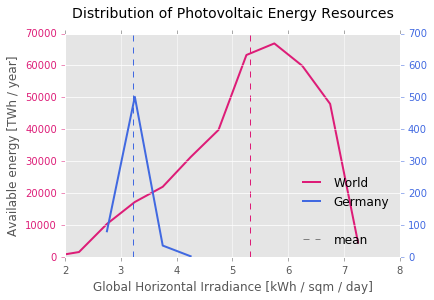

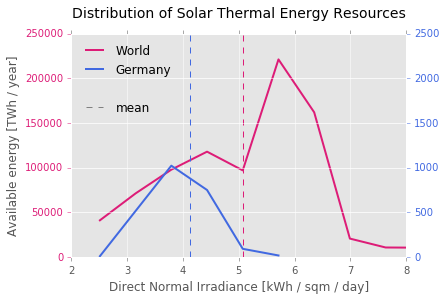

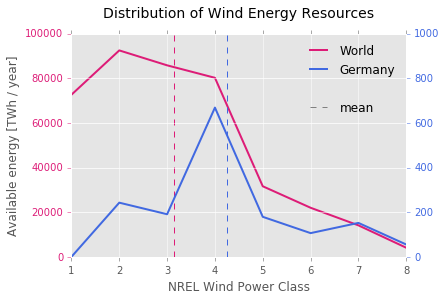

In [17]:
groei={}
groei2={}
sd={"pv":[],"wind":[],"csp":[]}
cvtr={"pv":0.5,"wind":1,"csp":0.64}
cvtr2={"pv":0.25,"wind":0,"csp":1.87}
for c in res:
    for r in res[c]:
        if r not in groei: groei[r]={}
        if r not in groei2: groei2[r]={}
        for cl in res[c][r]['res']:
            if cl not in groei[r]: groei[r][cl]=0
            groei[r][cl]+=res[c][r]['res'][cl]
            
            w=cl*cvtr[r]+cvtr2[r]
            sd[r].append({"country":c,"class":cl,"value":res[c][r]['res'][cl],"w":w})
            if w not in groei2[r]: groei2[r][w]=0
            groei2[r][w]+=res[c][r]['res'][cl]
            
aroei={}
titles=['Photovoltaic','Solar Thermal','Wind']
t2=['\n10% overall efficiency\ncovering 1.5% of productive land in each country',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
t2=['','','']
t3=['Global Horizontal Irradiance [kWh / sqm / day]','Direct Normal Irradiance [kWh / sqm / day]','NREL Wind Power Class']
t4=[[2,8],[2,8],[1,8]]
t5=[[0,70000],[0,250000],[0,100000]]
t6=[[0,700],[0,2500],[0,1000]]
locs=[4,2,1]
cs=['Germany','Germany','Germany']
for j,r in enumerate(groei2):
    x=[]
    y=[]
    for i in range(len(sorted(groei2[r].keys()))):
        x.append(float(sorted(groei2[r].keys())[i]))
        y.append(float(groei2[r][sorted(groei2[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    plt.figure()
    plt.plot(x,y,color='#dd1c77',lw=2)
    plt.title('Distribution of '+titles[j]+' Energy Resources'+t2[j],fontsize=14,y=1.05)
    plt.ylabel('Available energy [TWh / year]')
    plt.xlabel(t3[j])
    plt.ylim(t5[j])
    plt.tick_params(axis='y', colors='#dd1c77')
    z=np.average(x,weights=y)
    plt.axvline(z,color='#dd1c77',lw=1,ls='--')
    
    c=cs[j]
    x=[]
    y=[]
    for i in range(len(sorted(res[c][r]['res'].keys()))):
            x.append(float(sorted(res[c][r]['res'].keys())[i])*cvtr[r]+cvtr2[r])
            y.append(float(res[c][r]['res'][sorted(res[c][r]['res'].keys())[i]]))
    ax=plt.twinx()
    plt.plot([-10],[-10],color='#dd1c77',lw=2,label='World')
    ax.plot(x,y,color='royalBlue',lw=2,label=c)
    plt.plot([-10],[-10],color='grey',lw=1,ls='',label=' ')
    plt.plot([-10],[-10],color='grey',lw=1,ls='--',label='mean')
    ax.tick_params(axis='y', colors='royalBlue')
    z=np.average(x,weights=y)
    plt.axvline(z,color='royalBlue',lw=1,ls='--')
    plt.ylim(t6[j])
    plt.xlim(t4[j])
    plt.legend(loc=locs[j],framealpha=0)
    
#wind class http://rredc.nrel.gov/wind/pubs/atlas/appendix_A.html
#NREL Renewable Resource Data Center

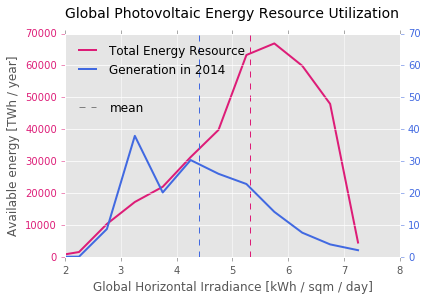

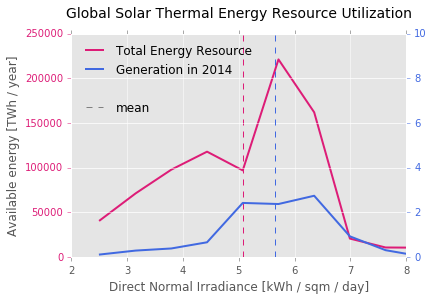

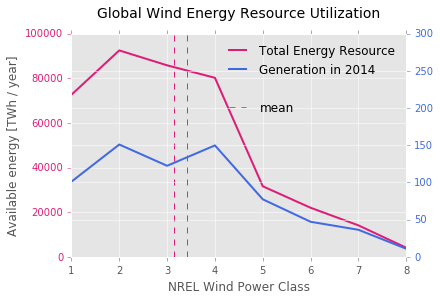

In [18]:
groei={}
groei2={}
groei3={}
sd={"pv":[],"wind":[],"csp":[]}
cvtr={"pv":0.5,"wind":1,"csp":0.64}
cvtr2={"pv":0.25,"wind":0,"csp":1.87}
rr={"pv":"solar","wind":"wind","csp":"csp"}
for c in res:
    for r in res[c]:
        if r not in groei: groei[r]={}
        if r not in groei2: groei2[r]={}
        if r not in groei3: groei3[r]={}
        for cl in res[c][r]['res']:
            if cl not in groei[r]: groei[r][cl]=0
            groei[r][cl]+=res[c][r]['res'][cl]
            
            w=cl*cvtr[r]+cvtr2[r]
            sd[r].append({"country":c,"class":cl,"value":res[c][r]['res'][cl],"w":w})
            if w not in groei2[r]: groei2[r][w]=0
            groei2[r][w]+=res[c][r]['res'][cl]
            
            #even distribution across resource classes fpr existing production
            s=res[c][r]['res'][cl]*1.0/sum(res[c][r]['res'].values())
            if c in data:
                if rr[r] in data[c][2014]['energy']:
                    if w not in groei3[r]: groei3[r][w]=0
                    groei3[r][w]=np.nansum([groei3[r][w],s*data[c][2014]['energy'][rr[r]]['cons']['navg3']])
            
aroei={}
titles=['Photovoltaic','Solar Thermal','Wind']
t2=['\n10% overall efficiency\ncovering 1.5% of productive land in each country',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
t2=['','','']
t3=['Global Horizontal Irradiance [kWh / sqm / day]','Direct Normal Irradiance [kWh / sqm / day]','NREL Wind Power Class']
t4=[[2,8],[2,8],[1,8]]
t5=[[0,70000],[0,250000],[0,100000]]
t6=[[0,70],[0,10],[0,300]]
locs=[2,2,1]
for j,r in enumerate(groei2):
    x=[]
    y=[]
    for i in range(len(sorted(groei2[r].keys()))):
        x.append(float(sorted(groei2[r].keys())[i]))
        y.append(float(groei2[r][sorted(groei2[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    plt.figure()
    plt.plot(x,y,color='#dd1c77',lw=2)
    plt.title('Global '+titles[j]+' Energy Resource'+t2[j]+' Utilization',fontsize=14,y=1.05)
    plt.ylabel('Available energy [TWh / year]')
    plt.xlabel(t3[j])
    plt.ylim(t5[j])
    plt.tick_params(axis='y', colors='#dd1c77')
    z=np.average(x,weights=y)
    plt.axvline(z,color='#dd1c77',lw=1,ls='--')
    
    x=[]
    y=[]
    for i in range(len(sorted(groei3[r].keys()))):
        x.append(float(sorted(groei3[r].keys())[i]))
        y.append(float(groei3[r][sorted(groei3[r].keys())[i]]))
    ax=plt.twinx()
    plt.plot([-10],[-10],color='#dd1c77',lw=2,label='Total Energy Resource')
    ax.plot(x,y,color='royalBlue',lw=2,label='Generation in 2014')
    plt.plot([-10],[-10],color='grey',lw=1,ls='',label=' ')
    plt.plot([-10],[-10],color='grey',lw=1,ls='--',label='mean')
    ax.tick_params(axis='y', colors='royalBlue')
    z=np.average(x,weights=y)
    plt.axvline(z,color='royalBlue',lw=1,ls='--')
    plt.ylim(t6[j])
    plt.xlim(t4[j])
    plt.legend(loc=locs[j],framealpha=0)
    
#wind class http://rredc.nrel.gov/wind/pubs/atlas/appendix_A.html
#NREL Renewable Resource Data Center

10.1391648405
8.30949918208
5.01079508516
5.90817300478
3.15162572286
3.42467330316


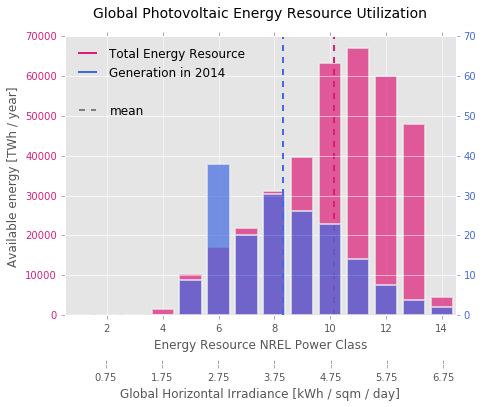

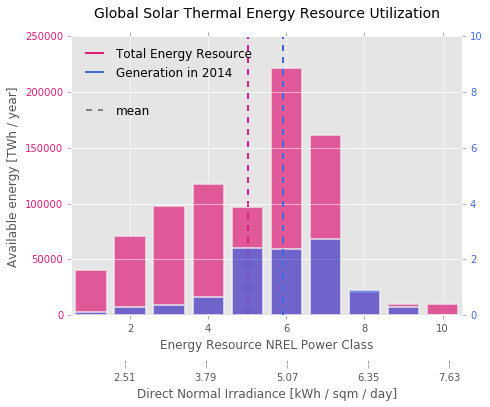

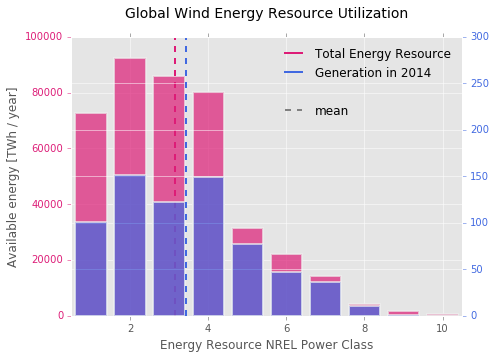

In [20]:
groei={}
groei2={}
groei3={}
sd={"pv":[],"wind":[],"csp":[]}
cvtr={"pv":0.5,"wind":1,"csp":0.64}
cvtr2={"pv":0.25,"wind":0,"csp":1.87}
rr={"pv":"solar","wind":"wind","csp":"csp"}
for c in res:
    for r in res[c]:
        if r not in groei: groei[r]={}
        if r not in groei2: groei2[r]={}
        if r not in groei3: groei3[r]={}
        for cl in res[c][r]['res']:
            if cl not in groei[r]: groei[r][cl]=0
            groei[r][cl]+=res[c][r]['res'][cl]
            
            w=cl#*cvtr[r]+cvtr2[r]
            sd[r].append({"country":c,"class":cl,"value":res[c][r]['res'][cl],"w":w})
            if w not in groei2[r]: groei2[r][w]=0
            groei2[r][w]+=res[c][r]['res'][cl]
            
            #even distribution across resource classes fpr existing production
            s=res[c][r]['res'][cl]*1.0/sum(res[c][r]['res'].values())
            if c in data:
                if rr[r] in data[c][2014]['energy']:
                    if w not in groei3[r]: groei3[r][w]=0
                    groei3[r][w]=np.nansum([groei3[r][w],s*data[c][2014]['energy'][rr[r]]['cons']['navg3']])
            
aroei={}
titles=['Photovoltaic','Solar Thermal','Wind']
t2=['\n10% overall efficiency\ncovering 1.5% of productive land in each country',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
t2=['','','']
t3=['Global Horizontal Irradiance [kWh / sqm / day]','Direct Normal Irradiance [kWh / sqm / day]','NREL Wind Power Class']
t4=[[0.5,14.5],[0.5,10.5],[0.5,10.5]]
t5=[[0,70000],[0,250000],[0,100000]]
t6=[[0,70],[0,10],[0,300]]
locs=[2,2,1]
cvv=[0.15,0.15]
for j,r in enumerate(groei2):
    x=[]
    y=[]
    for i in range(len(sorted(groei2[r].keys()))):
        x.append(float(sorted(groei2[r].keys())[i]))
        y.append(float(groei2[r][sorted(groei2[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    fig=plt.figure(figsize=(7,5))
    #fig=plt.figure()
    plt.bar(x,y,color='#dd1c77',lw=2,alpha=0.7, align='center')
    plt.title('Global '+titles[j]+' Energy Resource'+t2[j]+' Utilization',fontsize=14,y=1.05)
    plt.ylabel('Available energy [TWh / year]')
    plt.xlabel('Energy Resource NREL Power Class')
    plt.ylim(t5[j])
    plt.tick_params(axis='y', colors='#dd1c77')
    z=np.average(x,weights=y)
    plt.axvline(z,color='#dd1c77',lw=2,ls='--')
    print z
    
    x=[]
    y=[]
    for i in range(len(sorted(groei3[r].keys()))):
        x.append(float(sorted(groei3[r].keys())[i]))
        y.append(float(groei3[r][sorted(groei3[r].keys())[i]]))
    ax=plt.twinx()
    plt.plot([-10],[-10],color='#dd1c77',lw=2,label='Total Energy Resource')
    plt.plot([-10],[-10],color='royalBlue',lw=2,label='Generation in 2014')
    ax.bar(x,y,color='royalBlue',lw=2,alpha=0.7, align='center')
    plt.plot([-10],[-10],color='grey',lw=2,ls='',label=' ')
    plt.plot([-10],[-10],color='grey',lw=2,ls='--',label='mean')
    ax.tick_params(axis='y', colors='royalBlue')
    z=np.average(x,weights=y)
    plt.axvline(z,color='royalBlue',lw=2,ls='--')
    print z
    plt.ylim(t6[j])
    plt.xlim(t4[j])
    plt.legend(loc=locs[j],framealpha=0)
    if r not in {"wind"}:
        ax2 = fig.add_axes((cvv[j],-0.01,0.725,0.0))
        ax2.yaxis.set_visible(False)
        ax2.set_xlabel(t3[j])
        new_tick_locations = []
        new_ticks = []
        
        for cl in range(1,int(t4[j][1]+0.5),2):
            new_ticks.append(cl*cvtr[r]+cvtr2[r])
            new_tick_locations.append(cl)

        ax2.set_xticks(new_tick_locations)
        ax2.set_xticklabels(new_ticks)

#wind class http://rredc.nrel.gov/wind/pubs/atlas/appendix_A.html
#NREL Renewable Resource Data Center
    plt.savefig(str(r)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

In [41]:
print (10.1391648405-4)*10/11
print 5.01079508516
print 3.15162572286
ww=3.15
pp=5.58
cc=5.01

5.58105894591
5.01079508516
3.15162572286


In [465]:
# Since the power classes have different spans, one must normalize with regard to their span. The wind and DNI solar resources span over classes 1-10, while the GHI spans over 4-14.

[2.5100000000000002, 3.79, 5.07, 6.3500000000000005, 7.63]

In [127]:
print 1.1/(((8.31-3)/(10.14-3))*10/11.0)
print 1.1/(5.91/5.01)
print 1.1/(3.42/3.15)

1.62700564972
0.932487309645
1.01315789474


In [50]:
qw=ww/ww
qp=pp/ww
qc=cc/ww
print qw,qp,qc

1.0 1.77142857143 1.59047619048


In [81]:
import numpy as np

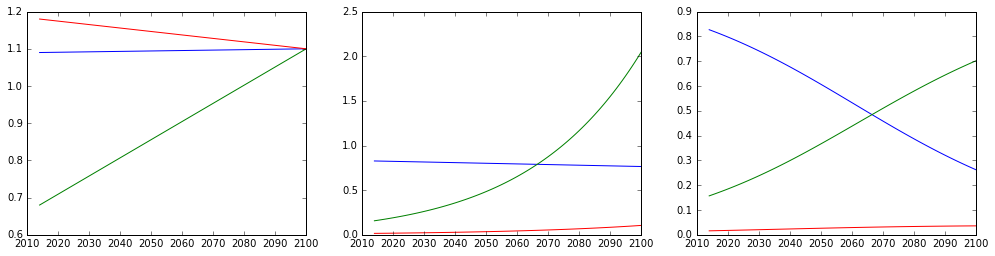

In [128]:
#shares
w=[0.827]
p=[0.157]
c=[0.016]
#thetas
wt=[1.09]
wp=[0.68]
wc=[1.18]
#js
jt=[1]
jp=[1.77]
jc=[1.59]
tgt=1.1
s=0.05
z=0.01
x=[2014]
for i in range(2015,2101):
    k=i-2014
    x.append(i)
    wt.append(wt[0]+(tgt-wt[0])*(i-2014)/(2101-2015))
    wp.append(wp[0]+(tgt-wp[0])*(i-2014)/(2101-2015))
    wc.append(wc[0]+(tgt-wc[0])*(i-2014)/(2101-2015))
    w.append(w[k-1]*(1/wt[k-1])**z*jt[0]**s)
    p.append(p[k-1]*(1/wp[k-1])**z*jp[0]**s)
    c.append(c[k-1]*(1/wc[k-1])**z*jc[0]**s)
    jt.append(jt[0])
    jp.append(jp[0])
    jc.append(jc[0])
    
fig,ax=plt.subplots(1,3,figsize=(17,4))
ax[0].plot(x,wt)
ax[0].plot(x,wp)
ax[0].plot(x,wc)
ax[1].plot(x,w)
ax[1].plot(x,p)
ax[1].plot(x,c)
#ax[2].plot(x,jt)
#ax[2].plot(x,jp)
#ax[2].plot(x,jc)
ax[2].plot(x,[w[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])
ax[2].plot(x,[p[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])
ax[2].plot(x,[c[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])

In [137]:
for k in range(len(x)):
    if x[k] in {2020,2040,2060,2080,2100}:
        a=w[k]/(w[k]+p[k]+c[k])
        b=p[k]/(w[k]+p[k]+c[k])
        d=c[k]/(w[k]+p[k]+c[k])
        print x[k],a/a,b/a,d/a

2020 1.0 0.231540148051 0.022132203643
2040 1.0 0.441183362816 0.0347330536349
2060 1.0 0.820777888558 0.054707103504
2080 1.0 1.49483995573 0.0864867119365
2100 1.0 2.67084922553 0.137240783535


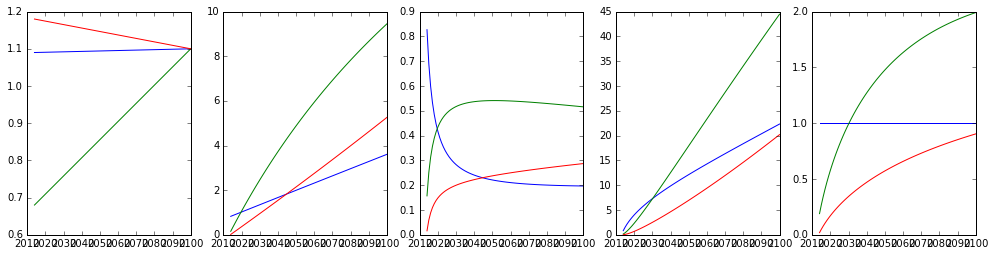

In [197]:
#shares
w=[0.827]
p=[0.157]
c=[0.016]
#Shares
W=[0.827]
P=[0.157]
C=[0.016]
#thetas
wt=[1.09]
wp=[0.68]
wc=[1.18]
#js
jt=[1]
jp=[1.77]
jc=[1.59]
tgt=1.1
s=0.5
z=0.5
f=3
x=[2014]
for i in range(2015,2101):
    k=i-2014
    x.append(i)
    wt.append(wt[0]+(tgt-wt[0])*(i-2014)/(2101-2015))
    wp.append(wp[0]+(tgt-wp[0])*(i-2014)/(2101-2015))
    wc.append(wc[0]+(tgt-wc[0])*(i-2014)/(2101-2015))
    w.append(w[k-1]+((1.0/3)*(1/wt[k-1])**z*jt[0]**s)**f)
    p.append(p[k-1]+((1.0/3)*(1/wp[k-1])**z*jp[0]**s)**f)
    c.append(c[k-1]+((1.0/3)*(1/wc[k-1])**z*jc[0]**s)**f)
    jt.append(jt[0])
    jp.append(jp[0])
    jc.append(jc[0])
    W.append(W[k-1]+w[k]/(w[k]+p[k]+c[k]))
    P.append(P[k-1]+p[k]/(w[k]+p[k]+c[k]))
    C.append(C[k-1]+c[k]/(w[k]+p[k]+c[k]))
    
fig,ax=plt.subplots(1,5,figsize=(17,4))
ax[0].plot(x,wt)
ax[0].plot(x,wp)
ax[0].plot(x,wc)
ax[1].plot(x,w)
ax[1].plot(x,p)
ax[1].plot(x,c)
ax[3].plot(x,W)
ax[3].plot(x,P)
ax[3].plot(x,C)
ax[2].plot(x,[w[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])
ax[2].plot(x,[p[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])
ax[2].plot(x,[c[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])
ax[4].plot(x,[W[k]/W[k] for k in range(len(w))])
ax[4].plot(x,[P[k]/W[k] for k in range(len(w))])
ax[4].plot(x,[C[k]/W[k] for k in range(len(w))])

In [255]:
#save
file('E:/Skydrive/GitHub/netset/res.json','w').write(json.dumps(sd)) 

In [82]:
isoc2=json.loads(file(pop_path+'../universal/isocountries2.json','r').read())

In [92]:
crs=set()
for k in sd:
    for c in sd[k]:
        crs.add( c["country"])

In [116]:
clrs={}
isoico={}
for i in isoc:
    if isoc[i] in crs:
        try:
            clrs[isoc[i]]=isocolors[isoc2[str(int(float(i)))].lower()]
        except: clrs[isoc[i]]="#ededed"
        try:
            isoico[isoc[i]]=isoc2[str(int(float(i)))]
        except: isoico[isoc[i]]="zz"

In [117]:
#save
file('E:/Skydrive/GitHub/netset/clrs.json','w').write(json.dumps(clrs)) 
file('E:/Skydrive/GitHub/netset/isoico.json','w').write(json.dumps(isoico)) 

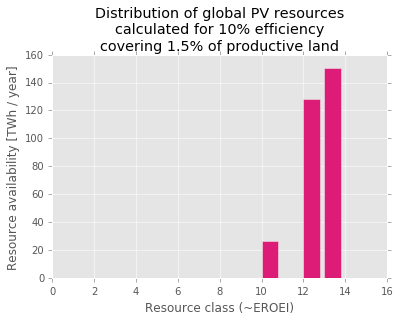

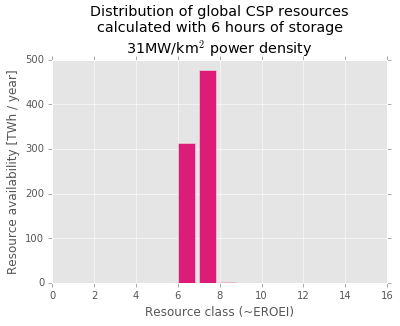

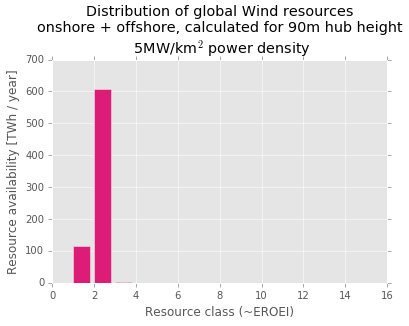

In [133]:
groei={}
for c in ['Jordan']:
    for r in res[c]:
        if r not in groei: groei[r]={}
        for cl in res[c][r]['res']:
            if cl not in groei[r]: groei[r][cl]=0
            groei[r][cl]+=res[c][r]['res'][cl]
aroei={}
titles=['PV','CSP','Wind']
t2=['\ncalculated for 10% efficiency\ncovering 1.5% of productive land',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
for j,r in enumerate(groei):
    x=[]
    y=[]
    for i in range(len(sorted(groei[r].keys()))):
        x.append(float(sorted(groei[r].keys())[i]))
        y.append(float(groei[r][sorted(groei[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    plt.figure()
    plt.bar(x,y,color='#dd1c77')
    plt.title('Distribution of global '+titles[j]+' resources'+t2[j])
    plt.ylabel('Resource availability [TWh / year]')
    plt.xlabel(u'Resource class (~EROEI)')
    plt.xlim(0,16)
    

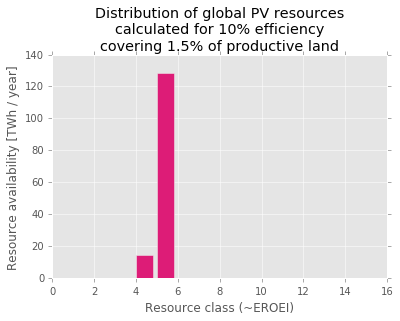

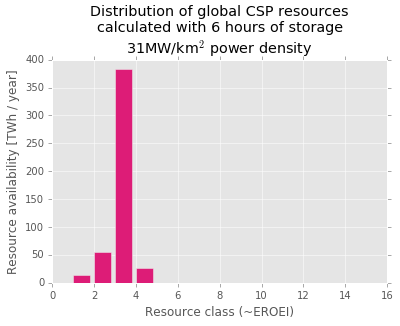

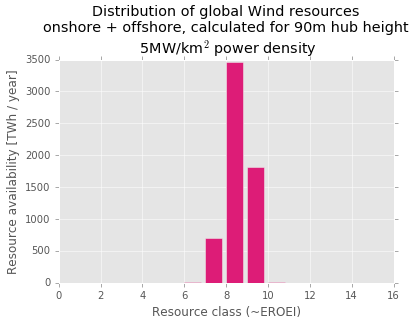

In [134]:
groei={}
for c in ['Iceland']:
    for r in res[c]:
        if r not in groei: groei[r]={}
        for cl in res[c][r]['res']:
            if cl not in groei[r]: groei[r][cl]=0
            groei[r][cl]+=res[c][r]['res'][cl]
aroei={}
titles=['PV','CSP','Wind']
t2=['\ncalculated for 10% efficiency\ncovering 1.5% of productive land',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
for j,r in enumerate(groei):
    x=[]
    y=[]
    for i in range(len(sorted(groei[r].keys()))):
        x.append(float(sorted(groei[r].keys())[i]))
        y.append(float(groei[r][sorted(groei[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    plt.figure()
    plt.bar(x,y,color='#dd1c77')
    plt.title('Distribution of global '+titles[j]+' resources'+t2[j])
    plt.ylabel('Resource availability [TWh / year]')
    plt.xlabel(u'Resource class (~EROEI)')
    plt.xlim(0,16)
    

In [869]:
aroei #average eroei normalizer. calculate the global average resource class. 
#since scales are linear, simple proportional scale-up is accurate

{u'csp': 5.0107948758783412,
 u'pv': 10.139163979278393,
 u'wind': 3.9059697717303017}

storage costs

In [11]:
#https://www.researchgate.net/publication/299824220_First_Insights_on_the_Role_of_solar_PV_in_a_100_Renewable_Energy_Environment_based_on_hourly_Modeling_for_all_Regions_globally
cost=pd.read_excel(pop_path+'/maps/storage.xlsx')

In [37]:
#existing electricity trade grid (and other fuels)
grid={}
allgrid={}
gridz={}
allgridsize={}
zgrid={}
zzsize={}
for fuel in {"oil","coal","gas","electricity"}:
    if fuel not in grid:grid[fuel]={}
    if fuel not in zgrid:zgrid[fuel]={}
    if fuel not in zzsize:zzsize[fuel]={}
    gridpartners={}
    gridsize={}
    for c in tradealpha:
        if c not in gridpartners:gridpartners[c]=[]
        if c not in allgrid:allgrid[c]=[]
        if c not in gridsize:gridsize[c]=0
        if c not in allgridsize:allgridsize[c]=0
        for y in tradealpha[c]:
            if y not in zgrid[fuel]:zgrid[fuel][y]={}
            if y not in zzsize[fuel]:zzsize[fuel][y]={}
            if fuel in tradealpha[c][y]:  
                for f in tradealpha[c][y][fuel]:
                    for i in tradealpha[c][y][fuel][f]:
                        if i not in {"World","Northern America","Africa",'Latin America and the Caribbean','Europe'}:
                            if int(float(i)) in iso2c:
                                if not np.isnan(tradealpha[c][y][fuel][f][i]):
                                    if tradealpha[c][y][fuel][f][i]!=0:
                                        p=cnc(iso2c[int(float(i))])
                                        
                                        gridsize[c]+=tradealpha[c][y][fuel][f][i]
                                        if p not in gridpartners[c]:
                                            gridpartners[c].append(p)
                                        
                                        allgridsize[c]+=tradealpha[c][y][fuel][f][i]
                                        if p not in allgrid[c]:
                                            allgrid[c].append(p)
                                            
                                        if c not in zzsize[fuel][y]:zzsize[fuel][y][c]=0
                                        zzsize[fuel][y][c]+=tradealpha[c][y][fuel][f][i]
                                        if c not in zgrid[fuel][y]:zgrid[fuel][y][c]={}
                                        if p not in zgrid[fuel][y][c]:
                                            zgrid[fuel][y][c][p]=tradealpha[c][y][fuel][f][i]
                                            
    grid[fuel]=gridpartners
    gridz[fuel]=gridsize

C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:32: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:36: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [39]:
#existing electricity trade grid (and other fuels) last 5 years
grid5={}
gridz5={}
allgrid5={}
allgridsize5={}
for fuel in {"oil","coal","gas","electricity"}:
    if fuel not in grid:grid[fuel]={}
    gridpartners={}
    gridsize={}
    
    for c in tradealpha:
        if c not in gridpartners:gridpartners[c]=[]
        if c not in allgrid5:allgrid5[c]=[]
        if c not in gridsize:gridsize[c]=0
        if c not in allgridsize5:allgridsize5[c]=0
        for y in tradealpha[c]:
            if y>2010:
                if fuel in tradealpha[c][y]:  
                    for f in tradealpha[c][y][fuel]:
                        for i in tradealpha[c][y][fuel][f]:
                            if i not in {"World","Northern America","Africa",'Latin America and the Caribbean','Europe'}:
                                if int(float(i)) in iso2c:
                                    if not np.isnan(tradealpha[c][y][fuel][f][i]):
                                        if tradealpha[c][y][fuel][f][i]!=0:
                                            p=cnc(iso2c[int(float(i))])
                                        
                                            if p not in gridpartners[c]:
                                                gridpartners[c].append(p)

                                            allgridsize[c]+=tradealpha[c][y][fuel][f][i]
                                            if p not in allgrid[c]:
                                                allgrid[c].append(p)
                                                
                                                
    grid5[fuel]=gridpartners
    gridz5[fuel]=gridsize

C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:27: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:31: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


world country centroids for network visualizations

In [4]:
import requests, StringIO, zipfile, pandas as pd

In [6]:
r = requests.get('http://gothos.info/resource_files/country_centroids.zip')            #define URL path of zip file to read
z = zipfile.ZipFile(StringIO.StringIO(r.content)) 
coord=pd.read_csv(z.open('country_centroids_all.csv'),sep='\t').drop(['DMS_LAT','DMS_LONG','MGRS','JOG','DSG','FULL_NAME','ISO3136','AFFIL','FIPS10','MOD_DATE'],axis=1)
coord.columns=['LAT','LONG','Country']
coord=coord.set_index('Country',drop=True)
coord.head(2)

LAT  LONG
Country                
Afghanistan  33.0  66.0
Albania      41.0  20.0

In [7]:
#create normalized distance matrix of countries
names=[]
for i in coord.index:
    names.append(cnc(i))
coord['NAME']=names
coord=coord.set_index('NAME',drop=True)

NameError: name 'cnc' is not defined

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r
def distance(i,j):
    if i in coord.index and j in coord.index:
        return haversine(coord.loc[i]['LONG'],coord.loc[i]['LAT'],
                    coord.loc[j]['LONG'],coord.loc[j]['LAT'])
    else: return 5000

In [ ]:
#long, run once
dists=[]
for i in range(len(goodcountries)):
    for j in range(i):
        dists.append(distance(goodcountries[i],goodcountries[j])) 

In [ ]:
distancenorm=np.mean(dists)
def normdistance(i,j):
    if i in coord.index and j in coord.index:
        return haversine(coord.loc[i]['LONG'],coord.loc[i]['LAT'],
                    coord.loc[j]['LONG'],coord.loc[j]['LAT'])/distancenorm
    else: return 5000.0/distancenorm

Save trade grids of fuels

In [1085]:
#save grid configuration for visualization
for fuel in {"oil","coal","gas","electricity"}:
    gridpartners=grid[fuel]
    network={"nodes":[],"edges":[],"positions":[]}
    goodnodes=[]
    for i in coord.index:
        if cnc(i) in gridpartners:    
            goodnodes.append(cnc(i))
    for i in coord.index:
        if cnc(i) in gridpartners:
            if cnc(i) in gridz[fuel]:size=gridz[fuel][cnc(i)]
            else:size=1
            network["nodes"].append({"name":cnc(i),"size":size})
            network["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
            for j in gridpartners[cnc(i)]:
                if j in goodnodes:
                    network["edges"].append({"source":cnc(i),"target":j})
    #save
    file('grid/'+fuel+'_grid.json','w').write(json.dumps(network)) 

    gridpartners=grid5[fuel]
    network={"nodes":[],"edges":[],"positions":[]}
    goodnodes=[]
    for i in coord.index:
        if cnc(i) in gridpartners:    
            goodnodes.append(cnc(i))
    for i in coord.index:
        if cnc(i) in gridpartners:
            if cnc(i) in gridz5[fuel]:size=gridz5[fuel][cnc(i)]
            else:size=1
            network["nodes"].append({"name":cnc(i),"size":size})
            network["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
            for j in gridpartners[cnc(i)]:
                if j in goodnodes:
                    network["edges"].append({"source":cnc(i),"target":j})
    #save
    file('grid/'+fuel+'5_grid.json','w').write(json.dumps(network)) 
    
    for y in zgrid[fuel]:    
        gridpartners=zgrid[fuel][y]
        network={"nodes":[],"edges":[],"positions":[]}
        goodnodes=[]
        for i in coord.index:
            if cnc(i) in gridpartners:    
                goodnodes.append(cnc(i))
        for i in coord.index:
            if cnc(i) in gridpartners:
                if cnc(i) in zzsize[fuel][y]:size=zzsize[fuel][y][cnc(i)]
                else:size=1
                network["nodes"].append({"name":cnc(i),"size":size})
                network["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
                for j in gridpartners[cnc(i)]:
                    if j in goodnodes:
                        network["edges"].append({"source":cnc(i),"target":j,"value":gridpartners[cnc(i)][j]})
        #save
        file('grid/'+str(y)+'_'+fuel+'_grid.json','w').write(json.dumps(network))

All grid 

In [1083]:
gridpartners=copy.deepcopy(allgrid)
network={"nodes":[],"edges":[],"positions":[]}
goodnodes=[]
for i in coord.index:
    if cnc(i) in gridpartners:    
        goodnodes.append(cnc(i))
for i in coord.index:
    if cnc(i) in gridpartners:
        if cnc(i) in allgridsize:size=allgridsize[cnc(i)]
        else:size=1
        network["nodes"].append({"name":cnc(i),"size":size})
        network["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
        for j in gridpartners[cnc(i)]:
            if j in goodnodes:
                network["edges"].append({"source":cnc(i),"target":j})
#save
file('grid/all_grid.json','w').write(json.dumps(network)) 

gridpartners=copy.deepcopy(allgrid5)
network={"nodes":[],"edges":[],"positions":[]}
goodnodes=[]
for i in coord.index:
    if cnc(i) in gridpartners:    
        goodnodes.append(cnc(i))
for i in coord.index:
    if cnc(i) in gridpartners:
        if cnc(i) in allgridsize5:size=allgridsize5[cnc(i)]
        else:size=1
        network["nodes"].append({"name":cnc(i),"size":size})
        network["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
        for j in gridpartners[cnc(i)]:
            if j in goodnodes:
                network["edges"].append({"source":cnc(i),"target":j})
#save
file('grid/all5_grid.json','w').write(json.dumps(network)) 

## Cost

In [43]:
from munkres import Munkres, print_matrix

## ALLOCATION

Create  Hungarian cost matrix. this will be a normalized, per unit EROEI * willingness to do trade. this is the cumulative, directed trade history. 

In [42]:
goodcountries=list(set(data.keys()).intersection(set(tradealpha.keys())))
limit=20 #dev
#goodcountries=goodcountries[:limit]
rgc={} #reverse goodcountries coder
for i in range(len(goodcountries)):
    rgc[goodcountries[i]]=i
matrix=[[0 for i in goodcountries] for j in goodcountries]

Calculate trade influence matrix. Trade influence is proportional to the total histrocial value of energy trade. If there is no energy trade, some trade is still better than no trade. We will two pairs of import-export flows for each pair, once in each entry's data. For deciding the impor cost influence, we will use 2/3 historical imports and 1/3 historcial exports, caluclated separately for sender and receiver flows, then averged. E.g. a good import partner of country A, let's call it country B, exports a large percentage of its exports to country A and country A receives a large share of its exports from B. The reverse flows are also factored in with a weight of 1/3. The partner-parnter weights are factored in with weights 2/3 (meaning that it is a directed flow but any country who depends on imports or exports signifcantly on another, will push hard politically to keep this trade flowing). We have no weighting to differentiate between energy products, all treated the same. We consider the direct flows more reliable information, hence we give them a weight of 2/3, while the reverse flows get 1/3.

## Impex updating

In [312]:
#direct flow matrices
importmatrix=[[0 for i in goodcountries] for j in goodcountries]
exportmatrix=[[0 for i in goodcountries] for j in goodcountries]
#reverse flow matrices
rimportmatrix=[[0 for i in goodcountries] for j in goodcountries]
rexportmatrix=[[0 for i in goodcountries] for j in goodcountries]

cid={}
for i in range(len(goodcountries)):
    cid[goodcountries[i]]=i

#fill import-export matrix for year x with flow f of value v
def impex(reporter,partner,flow,value):
    global importmatrix
    global exportmatrix
    global rimportmatrix
    global rexportmatrix
    i=cid[reporter]
    j=cid[partner]
    if flow in {"Export","Re-Export"}:
        exportmatrix[i][j]+=value
        rimportmatrix[j][i]+=value
    if flow in {"Import","Re-Import"}:
        importmatrix[i][j]+=value
        rexportmatrix[j][i]+=value
    return

#fill up existing values
def reloadimpex(): #runright after after resetting tradealpha
    for i in range(len(goodcountries)):
        reporter=goodcountries[i]
        for year in tradealpha[reporter]:
            for fuel in tradealpha[reporter][year]:
                for flow in tradealpha[reporter][year][fuel]:
                    for p in tradealpha[reporter][year][fuel][flow]:
                        pp=int(float(str(p)))
                        if pp in iso2c:
                            if cnc(iso2c[pp]) in goodcountries: 
                                #self trade allowed
                                partner=cnc(iso2c[pp])
                                value=tradealpha[reporter][year][fuel][flow][p]
                                impex(reporter,partner,flow,value)

In [ ]:
#create influence matrix (from normilzed trade matrices)

#norm direct flow matrices
nimportmatrix=[[0 for i in goodcountries] for j in goodcountries]
nexportmatrix=[[0 for i in goodcountries] for j in goodcountries]
#norm reverse flow matrices
nrimportmatrix=[[0 for i in goodcountries] for j in goodcountries]
nrexportmatrix=[[0 for i in goodcountries] for j in goodcountries]

def normalizeimpex():
    global nimportmatrix
    global nexportmatrix
    global nrimportmatrix
    global nrexportmatrix
    #initialize normalized matrices
    for i in range(len(goodcountries)):
        for j in range(len(goodcountries)):
            if np.nanmean(importmatrix[i])>0:nimportmatrix[i][j]=importmatrix[i][j]/np.nanmean(importmatrix[i])
            if np.nanmean(exportmatrix[i])>0:nexportmatrix[i][j]=exportmatrix[i][j]/np.nanmean(exportmatrix[i])
            if np.nanmean(rimportmatrix[i])>0:nrimportmatrix[i][j]=rimportmatrix[i][j]/np.nanmean(rimportmatrix[i])
            if np.nanmean(rexportmatrix[i])>0:nrexportmatrix[i][j]=rexportmatrix[i][j]/np.nanmean(rexportmatrix[i])

In [336]:
def impex(reporter,partner,flow,value):
    global importmatrix
    global exportmatrix
    global rimportmatrix
    global rexportmatrix
    i=cid[reporter]
    j=cid[partner]
    if flow in {"Export","Re-Export"}:
        exportmatrix[i][j]+=value
        rimportmatrix[j][i]+=value
    if flow in {"Import","Re-Import"}:
        importmatrix[i][j]+=value
        rexportmatrix[j][i]+=value
    return

def updatenormimpex(reporter,partner,flow,value,weight=0.1):
    global mimportmatrix
    global mexportmatrix
    global mrimportmatrix
    global mrexportmatrix
    i=cid[reporter]
    j=cid[partner]
    if flow in {"Export","Re-Export"}:
        nexportmatrix[i][j]=((nexportmatrix[i][j]*(1-weight))+(value*weight))/2.0
        nrimportmatrix[j][i]=((nrimportmatrix[j][i]*(1-weight))+(value*weight))/2.0
    if flow in {"Import","Re-Import"}:
        nimportmatrix[i][j]+=((nrimportmatrix[i][j]*(1-weight))+(value*weight))/2.0
        nrexportmatrix[j][i]+=((nrexportmatrix[j][i]*(1-weight))+(value*weight))/2.0
    return

selfinfluence=10.0

def influence(reporter,partner):
    i=cid[reporter]
    j=cid[partner]
    if i==j: return selfinfluence
    else: return 12.0/36*nimportmatrix[i][j]\
        +6.0/36*nexportmatrix[j][i]\
        +4.0/36*nrimportmatrix[i][j]\
        +2.0/36*nrexportmatrix[j][i]\
        +6.0/36*nexportmatrix[i][j]\
        +3.0/36*nimportmatrix[j][i]\
        +2.0/36*nrexportmatrix[i][j]\
        +1.0/36*nrimportmatrix[j][i]

In [340]:
#save
file(pop_path+'trade/nimpex.json','w').write(json.dumps(
        {"nexport":nexportmatrix,\
        "nimport":nimportmatrix,\
        "nrexport":nrexportmatrix,\
        "nrimport":nrimportmatrix}))

In [341]:
#load
predata=json.loads(file(pop_path+'trade/nimpex.json','r').read())
nexportmatrix=predata["nexport"]
nimportmatrix=predata["nimport"]
nrexportmatrix=predata["nrexport"]
nrimportmatrix=predata["nrimport"]
predata={}

Create energy cost by filling the matrix with the cost of row importing 1TWh from column. neglecting transport energy costs for now, this will be the extraction energy cost. Let us consider only solar for now. Try optimization with all three source, choose one with best objective value. 1TWh tier changes based on granurality.

In [367]:
#weighted resource class calculator
def re(dic,total):
    if dic!={}:
        i=max(dic.keys())
        mi=min(dic.keys())
        run=True
        keys=[]
        weights=[]
        counter=0
        while run:
            counter+=1 #safety break
            if counter>1000: run=False
            if i in dic:
                if total<dic[i]:
                    keys.append(i)
                    weights.append(total)
                    run=False
                else:
                    total-=dic[i]
                    keys.append(i)
                    weights.append(dic[i])
                    i-=1
            if i<mi: run=False
        if sum(weights)==0: return 0
        else: return np.average(keys,weights=weights)
    else: return 0

Allocation algorithm:

1. Step year
 1.  Create list of countries with negative balances
 1.  Pick a country at random from the list who have negative balances
    1. Tier the country's needs into k(=5) tiers
    1. Query cost matrix for all countries for the amount on the tier k for all energy sources
    1. Choose partner and energy source based on an indicator composed of:
        1. Lowest cost
        1. Country influence - partners are ranked from 0 to 1. Self has a weight of 2.
        1. Does not exceed diversification limits within the same year (providing max z%(=20) of the year's demand)
    1. Choose form of trade:
        1. Calculate costs for trade for:
            1. On existing grid or grid expansion
            1. PTL
        1. Calculate costs of storage based on:
            1. Global storage need in gird share and its distributions by type (from Breyer)
    1. Implement trade:
        1. Update receiver balance
        1. Reduce provider reserves
        1. Add provider investment costs: building the capacity
            1. Distribute equally on provider energy mix
        1. Add receiver investment costs: storage, transport, grid expansion, grid rent
            1. Distribute equally on receiver energy mix
    - Record total cost of the trade
 1. Pick another ocuntry at random and repeat until all countries are finished
 1. Calculate total cost of year
 1. Try to minimize total cost through simulated annealing repeated within year:
     1. Start with random processing order for countries
     1. Complete the year with that order
     1. Swap two countries in the order at ranom
     1. Repeat the year and see if the total costs decreased
         1. If yes, keep the swap, then swap another one
         1. If no, revert the swap and swap another one
1. Calculate total cost of transition for year, then step year
1. After all years finished, record total cost of transition

In [301]:
#average resource quality calculator for the globe
def update_aroei():
    global aroei
    aroei={}
    groei={}
    for c in res:
        for r in res[c]:
            if r not in groei: groei[r]={}
            for cl in res[c][r]['res']:
                if cl not in groei[r]: groei[r][cl]=0
                groei[r][cl]+=res[c][r]['res'][cl]
    for r in groei:
        x=[]
        y=[]
        for i in range(len(sorted(groei[r].keys()))):
            x.append(float(sorted(groei[r].keys())[i]))
            y.append(float(groei[r][sorted(groei[r].keys())[i]]))
        aroei[r]=np.average(x,weights=y)

In [302]:
#1Bdi - grid
def gridtestimator(country,partner):
    
    def electricitytrade(country,partner):
        scaler=1
        gridpartners=grid5['electricity']
        #existing trade partners
        if ((partner in gridpartners[country]) or (country in gridpartners[partner])): 
            scaler+=cost.loc[region.loc[country]]['egrid'].values[0]/2.0
        #neighbors, but need to build
        elif pop2iso[country] in c2neighbors:
            if (pop2iso[partner] in c2neighbors[pop2iso[country]]):
                scaler+=cost.loc[region.loc[country]]['grid'].values[0]/2.0*normdistance(country,partner)
        #not neighbors or partners but in the same region, need to build
        elif (region.loc[country][0]==region.loc[partner][0]):
            scaler+=cost.loc[region.loc[country]]['grid'].values[0]*3.0/2.0*normdistance(country,partner)
        #need to build supergrid, superlative costs
        else: scaler+=cost.loc[region.loc[country]]['grid'].values[0]*10.0/2.0*normdistance(country,partner)
        return scaler
    
    def ptltrade(country,partner):
        #ptg costs scale with distance
        scaler=1+cost.loc[11]['ptg']*normdistance(country,partner) 
        return scaler
    
    if ptltrade(country,partner)<electricitytrade(country,partner):
        return {"scaler":ptltrade(country,partner),"tradeway":"ptl"}
    else: return {"scaler":electricitytrade(country,partner),"tradeway":"grid"}

In [13]:
#1Bdii - storage &curtailment
def storagestimator(country):
    return cost.loc[region.loc[country]]['min'].values[0]
    #curtoversizer
def curtestimator(country):
    return cost.loc[region.loc[country]]['curt'].values[0]

In [16]:
storagestimator('Hungary')

0.06

In [352]:
#global eroei, due to state of technology
#http://www.sciencedirect.com/science/article/pii/S0301421513003856
eroei={
'oil':13,
'coal':27,
'gas':14,
'nuclear':10,
'biofuels':1.5,
'hydro':84,
'geo_other':22,
'pv':9,
'csp':5,
'wind':9 #was 24
}
#esoei
#http://pubs.rsc.org/en/content/articlepdf/2013/ee/c3ee41973h
#various, but especially CSP from https://en.wikipedia.org/wiki/EROEI
#http://link.springer.com/chapter/10.1007/978-3-319-02940-5_5#Sec18
#charlie hall says number are 5-7 for csp, but without additional costs of the supporting infrastructure

# ALLINONE

In [ ]:
#import resources

###################################
###################################
#load resources
predata=json.loads(file(pop_path+'maps/res.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}
print 'loaded resources',
###################################
###################################
#load balance
predata=json.loads(file(pop_path+'balance.json','r').read())
balance={}
for year in predata:
    balance[int(year)]=predata[year]
predata={}
print 'balance',
###################################
###################################
#load tradealpha d
predata=json.loads(file(pop_path+'/trade/traded.json','r').read())
tradealpha={}
for c in predata:
    tradealpha[c]={}
    for year in predata[c]:
        tradealpha[c][int(year)]=predata[c][year]
predata={}
print 'tradedata',
###################################
###################################
#reload impex and normalize
predata=json.loads(file(pop_path+'trade/nimpex.json','r').read())
nexportmatrix=predata["nexport"]
nimportmatrix=predata["nimport"]
nrexportmatrix=predata["nrexport"]
nrimportmatrix=predata["nrimport"]
predata={}
print 'impex',
###################################
###################################
#load latest savedata
''' #we dont change the data for now, everything is handled through trade
predata=json.loads(file(pop_path+'savedata5.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}
print 'data'
'''
###################################
###################################
###################################
###################################
###################################
###################################
        
for year in range(2015,2100):
    print year,
    #SET PARAMETERS
    #------------------------------------------------
    #0-reset reserves
    '''
    predata=json.loads(file(pop_path+'maps/res.json','r').read())
    res={}
    for c in predata:
        res[c]={}
        for f in predata[c]:
            res[c][f]={}
            for r in predata[c][f]:
                res[c][f][r]={}
                for y in predata[c][f][r]:
                    res[c][f][r][int(y)]=predata[c][f][r][y]
    predata={}
    '''
    #1A
    needers=sorted([c for c in balance[year] if balance[year][c]<0])
    #1B
    #import random
    random.seed(1)
    #shuffle order of parsing countries
    random.shuffle(needers)
    #------------------------------------------------
    #1Ba
    #country for parsing the needers list
    for counter in range(len(needers)):
        country=needers[counter]
        #print country,
        need=-balance[year][country] #as a convention switch to positive, defined as 'need'
        mintier=1 #in TWh
        midtier=10 #mid tier TWh
        if need>midtier: tiernumber=5
        elif need>mintier: tiernumber=3
        else: tiernumber=1

        for tier in range(tiernumber):
            tierneed=need*1.0/tiernumber
            #------------------------------------------------
            #1Bb
            costvector={}
            update_aroei() #update sate of the resources globally to be able to rank between technologies
            for partner in goodcountries:
                if partner in res:
                    for fuel in {'csp','pv','wind'}:
                        if res[partner][fuel]['res']!={}:
                            #rq (resource query) returns the average resource class at which this tierneed can be provided
                            rq=re(res[partner][fuel]['res'],tierneed)
                            #the costvector takes the resource class and converts it to eroei by comparing it 
                            #the average resource class at a known point with a know eroei (at start in 2015)
                            #we are looking figh highvalues, as a marginal quality of resource
                            costvector[fuel+'_'+partner]=(rq/aroei[fuel]*eroei[fuel]) #normalized resource quality over eroei

            #1Bbi - norlmalize costvector to be able to compare with trade influence
            normcostvector=copy.deepcopy(costvector)
            for i in normcostvector:
                costvector[i]/=np.nanmean(costvector.values())
            #1Bbii - create costfactor, weights are tweakable
            costfactor={}
            for key in costvector:
                partner=key[key.find('_')+1:]
                costfactor[key]=((costvector[key]**2)*(influence(country,partner)**2))**(1/4.0)
                #The geometric mean is more appropriate than the arithmetic mean for describing proportional growth, 
                #both exponential growth (constant proportional growth) and varying growth; i
                #n business the geometric mean of growth rates is known as the compound annual growth rate (CAGR). 
                #The geometric mean of growth over periods yields the equivalent constant growth rate that would 
                #yield the same final amount.
                    
            #1Bc - choose partner
            best=max(costfactor, key=costfactor.get)
            tradepartner=best[best.find('_')+1:]
            tradefuel=best[:best.find('_')]
            #------------------------------------------------
            #1Be - IMPLEMENT TRADE
            #1Bei - update receiver balance
            balance[year][country]-=tierneed
            #1Beii - Reduce provider reserves within year
            levels=res[tradepartner][tradefuel]['res'].keys()
            level=max(levels)
            tomeet=tierneed*1.0
            while level>min(levels): 
                if level not in res[tradepartner][tradefuel]['res']: level-=1
                elif res[tradepartner][tradefuel]['res'][level]<tomeet:
                    tomeet-=res[tradepartner][tradefuel]['res'][level]
                    res[tradepartner][tradefuel]['res'].pop(level)
                    level-=1
                else:
                    res[tradepartner][tradefuel]['res'][level]-=tomeet
                    level=0
            #------------------------------------------------
            #1Be-implement country trade
            key=gridtestimator(country,partner)['tradeway']+'_'+tradefuel
            #add import flow
            if key not in tradealpha[country][year]:tradealpha[country][year][key]={}
            if 'Import' not in tradealpha[country][year][key]:tradealpha[country][year][key]["Import"]={}
            if str(pop2iso[tradepartner]) not in tradealpha[country][year][key]["Import"]:
                tradealpha[country][year][key]["Import"][str(pop2iso[tradepartner])]=0
            tradealpha[country][year][key]["Import"][str(pop2iso[tradepartner])]+=tierneed
            #add export flow
            if key not in tradealpha[tradepartner][year]:tradealpha[tradepartner][year][key]={}
            if 'Export' not in tradealpha[tradepartner][year][key]:tradealpha[tradepartner][year][key]["Export"]={}
            if str(pop2iso[country]) not in tradealpha[tradepartner][year][key]["Export"]:
                tradealpha[tradepartner][year][key]["Export"][str(pop2iso[country])]=0
            tradealpha[tradepartner][year][key]["Export"][str(pop2iso[country])]+=tierneed

            #record trade to influence - counld be weighted, deaful is 10%
            updatenormimpex(country,tradepartner,'Import',tierneed) 
            updatenormimpex(tradepartner,country,'Export',tierneed) 

loaded resources balance tradedata impex 2015 2016 2017 2018 2019 2020 2021 2022

In [346]:
save3()

In [ ]:
influence("Canada","United States of America")